# TASK: Predict France Presidential Election

~ Abstract: This project aims to predict the outcome of the upcoming French presidential election based on historical data of previous elections. The datasets used in this project includes various features such as candidate names, percentage of votes received by each candidate, and the winning candidate. The project involves data cleaning, exploratory data analysis, feature engineering, and model training and evaluation. The prediction model used in this project is Regression Model, Random forest classifier, which is a powerful algorithm for classification. The accuracy of the model is evaluated using metrics such as precision, recall, and F1-score. The results of this project can provide insights into the voting patterns of the French electorate and help to anticipate the possible outcome of the upcoming election.

# .........................................................................................................................

# Importing all necessary libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data Visualization
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

# Crime rate data

In [2]:
crime_data = pd.read_csv('Crime rate(1995-2022).csv', encoding='ISO-8859-1')
crime_data.head()

Region        1995        1996        1997   
0                     FRA: France  231,100.00  346,725.00  323,704.00  \
1              FR1: Île-de-France   79,550.00   78,531.00   71,682.00   
2      FRB: Centre - Val de Loire    8,590.00    8,334.00    8,094.00   
3    FRC: Bourgogne-Franche-Comté    6,900.00    6,805.00    6,170.00   
4                   FRD: Normandy   15,340.00   14,525.00   13,411.00   

         1998        1999        2000        2001        2002        2003   
0  318,130.00  298,550.00  310,586.00  322,657.00  292,191.00  238,100.00  \
1   68,347.00   65,088.00   65,165.00   66,980.00   60,499.00   49,693.00   
2    7,962.00    7,453.00    8,983.00    9,766.00    9,216.00    7,890.00   
3    5,848.00    5,713.00    6,361.00    7,019.00    7,221.00    6,106.00   
4   12,132.00   11,016.00   10,378.00   10,928.00   10,422.00    8,618.00   

   ...        2013        2014        2015        2016        2017   
0  ...  115,540.00  112,038.00  115,182.00  166,429.00  156,032.00  \
1  ...   31,506.00   31,692.00   33,002.00   46,363.00   43,500.00   
2  ...    4,001.00    3,590.00    3,675.00    5,169.00    4,584.00   
3  ...    3,310.00    3,404.00    3,215.00    4,523.00    4,291.00   
4  ...    4,144.00    4,140.00    4,004.00    5,419.00    5,328.00   

         2018        2019        2020        2021        2022  
0  143,800.00  141,246.00  122,772.00  122,684.00  191,131.70  
1   40,557.00   39,836.00   34,681.00   34,727.00   44,539.30  
2    3,956.00    3,239.00    2,855.00    2,987.00    5,615.10  
3    3,963.00    3,454.00    3,238.00    3,132.00    4,628.90  
4    4,971.00    4,433.00    4,072.00    4,016.00    6,982.40  

[5 rows x 29 columns]

In [3]:
crime_data.columns

Index(['Region', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', '2022'],
      dtype='object')

# Data Preprocessing

# Checking Outliers

In [4]:
crime_data.describe()

Region 1995 1996 1997 1998 1999        2000        2001   
count            19   19   19   19   19   19          19          19  \
unique           19   15   15   15   15   15          19          19   
top     FRA: France    0    0    0    0    0  310,586.00  322,657.00   
freq              1    5    5    5    5    5           1           1   

              2002        2003  ...        2013        2014        2015   
count           19          19  ...          19          19          19  \
unique          19          19  ...          19          19          19   
top     292,191.00  238,100.00  ...  115,540.00  112,038.00  115,182.00   
freq             1           1  ...           1           1           1   

              2016        2017        2018        2019        2020   
count           19          19          19          19          19  \
unique          19          19          19          19          19   
top     166,429.00  156,032.00  143,800.00  141,246.00  122,772.00   
freq             1           1           1           1           1   

              2021        2022  
count           19          19  
unique          19          19  
top     122,684.00  191,131.70  
freq             1           1  

[4 rows x 29 columns]

# Checking Null values

In [5]:
crime_data.isnull().sum()

Region    0
1995      0
1996      0
1997      0
1998      0
1999      0
2000      0
2001      0
2002      0
2003      0
2004      0
2005      0
2006      0
2007      0
2008      0
2009      0
2010      0
2011      0
2012      0
2013      0
2014      0
2015      0
2016      0
2017      0
2018      0
2019      0
2020      0
2021      0
2022      0
dtype: int64

In [6]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Region  19 non-null     object
 1   1995    19 non-null     object
 2   1996    19 non-null     object
 3   1997    19 non-null     object
 4   1998    19 non-null     object
 5   1999    19 non-null     object
 6   2000    19 non-null     object
 7   2001    19 non-null     object
 8   2002    19 non-null     object
 9   2003    19 non-null     object
 10  2004    19 non-null     object
 11  2005    19 non-null     object
 12  2006    19 non-null     object
 13  2007    19 non-null     object
 14  2008    19 non-null     object
 15  2009    19 non-null     object
 16  2010    19 non-null     object
 17  2011    19 non-null     object
 18  2012    19 non-null     object
 19  2013    19 non-null     object
 20  2014    19 non-null     object
 21  2015    19 non-null     object
 22  2016    19 non-null     obje

It is showing that there is no null value in our dataset

# Exploratory Data Analysis

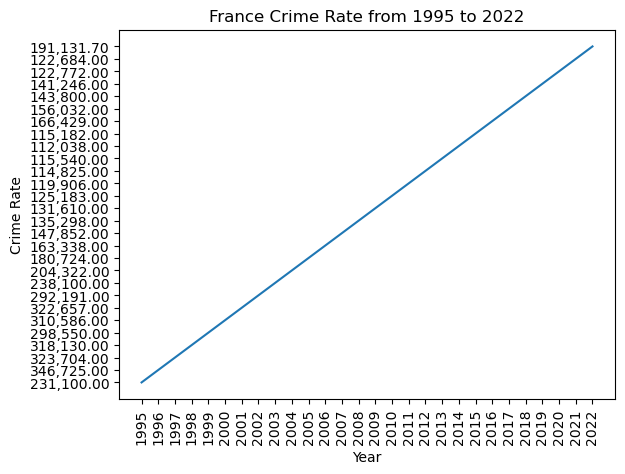

In [7]:
# Create a line chart
plt.plot(crime_data.columns[1:], crime_data.loc[0][1:])
plt.xlabel("Year")
plt.ylabel("Crime Rate")
plt.xticks(rotation=90)
plt.title("France Crime Rate from 1995 to 2022")
plt.show()

In [4]:
for col in crime_data.columns[1:]:
    crime_data[col] = crime_data[col].str.replace(',', '').astype(float)

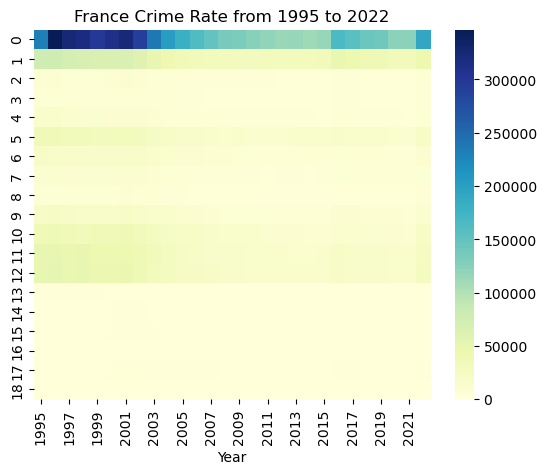

In [9]:
# Create a heat map
import seaborn as sns
sns.heatmap(crime_data.iloc[:,1:], cmap="YlGnBu")
plt.xlabel("Year")
plt.title("France Crime Rate from 1995 to 2022")
plt.show()

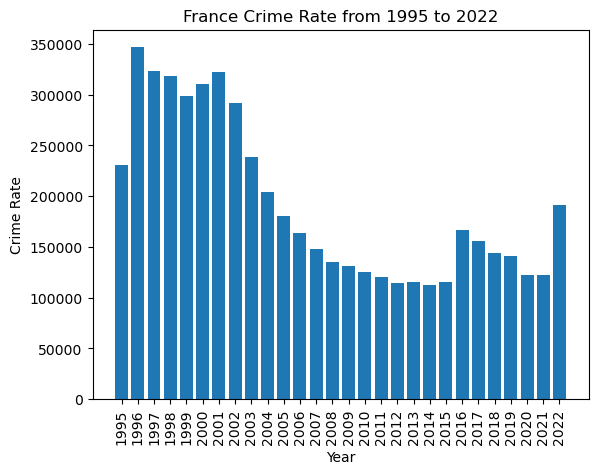

In [10]:
# Create a bar chart
plt.bar(crime_data.columns[1:], crime_data.loc[0][1:])
plt.xlabel("Year")
plt.ylabel("Crime Rate")
plt.title("France Crime Rate from 1995 to 2022")
plt.xticks(rotation=90)
plt.show()

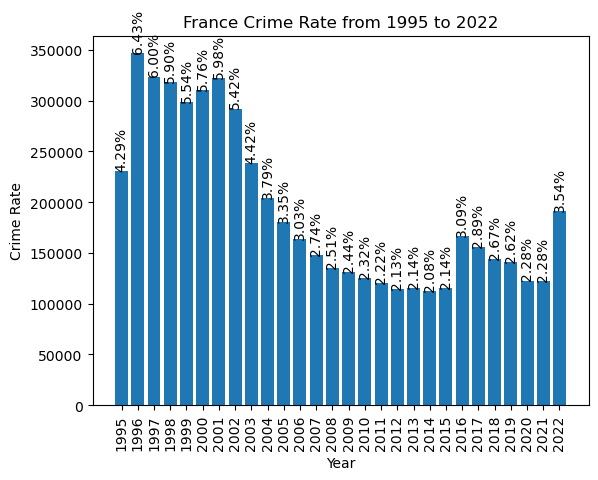

In [11]:
# Create a bar chart
plt.bar(crime_data.columns[1:], crime_data.loc[0][1:])
plt.xlabel("Year")
plt.ylabel("Crime Rate")
plt.title("France Crime Rate from 1995 to 2022")
plt.xticks(rotation=90)

# Calculate crime rate percentage for each year
total_crime_rate = crime_data.loc[0][1:].sum()
fontsize=10
for i, rate in enumerate(crime_data.loc[0][1:]):
    percentage = (rate / total_crime_rate) * 100
    plt.text(i, rate, f"{percentage:.2f}%", ha='center', va='bottom', rotation=90, fontsize=fontsize)

plt.show()

In [12]:
# Calculate the average growth rate for each year
yearly_avg = crime_data.iloc[:,1:].mean()

# Find the year with the highest average growth rate
max_year = yearly_avg.idxmax()

print("Year with the highest average crime rate:", max_year)

Year with the highest average crime rate: 1996


# Checking Data Distribution using histogram

C:\Users\Hamna\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


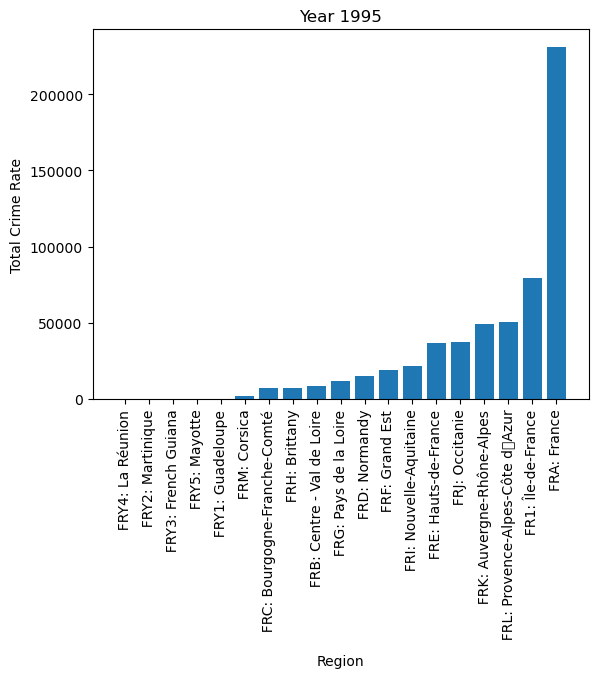

C:\Users\Hamna\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


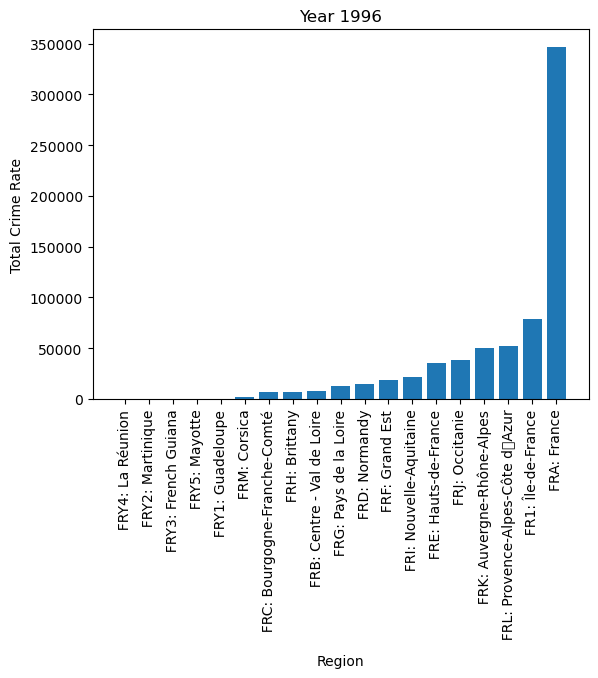

C:\Users\Hamna\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


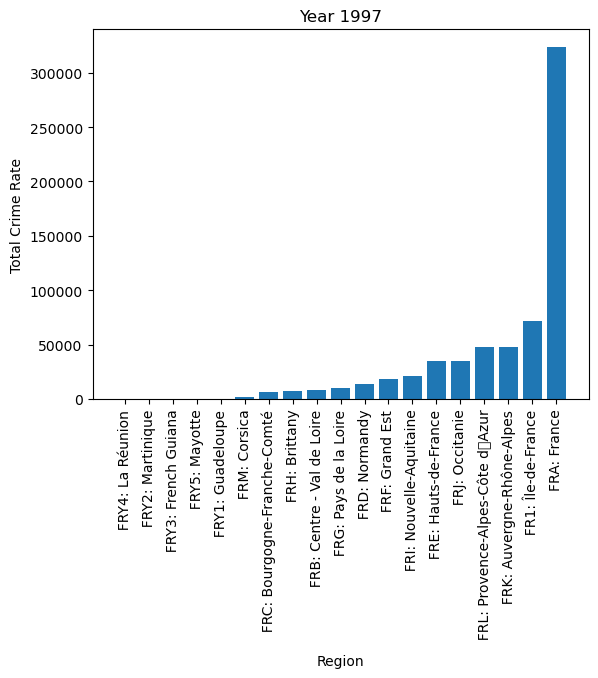

C:\Users\Hamna\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


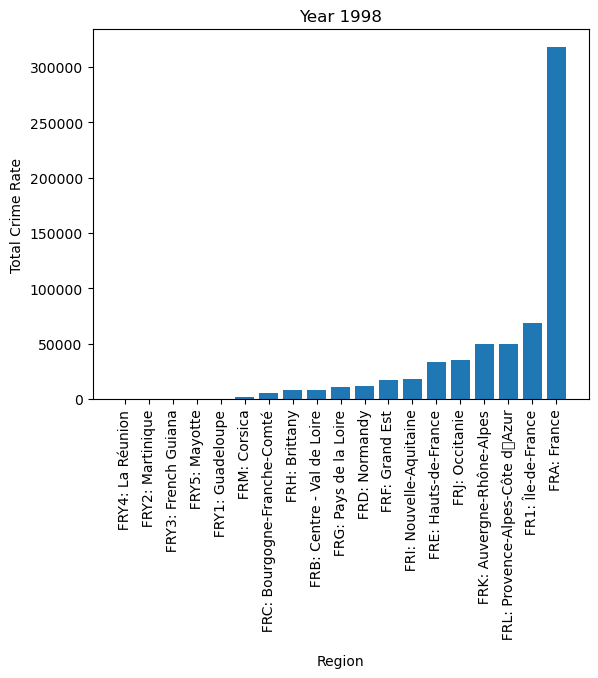

C:\Users\Hamna\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


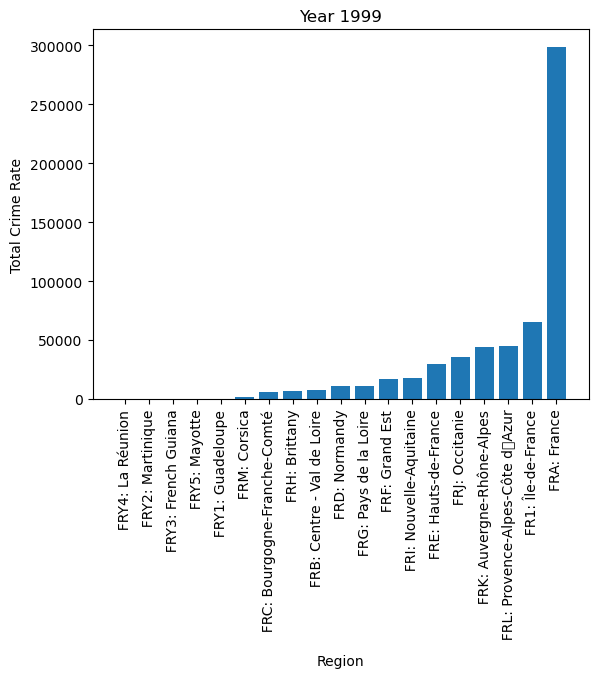

C:\Users\Hamna\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


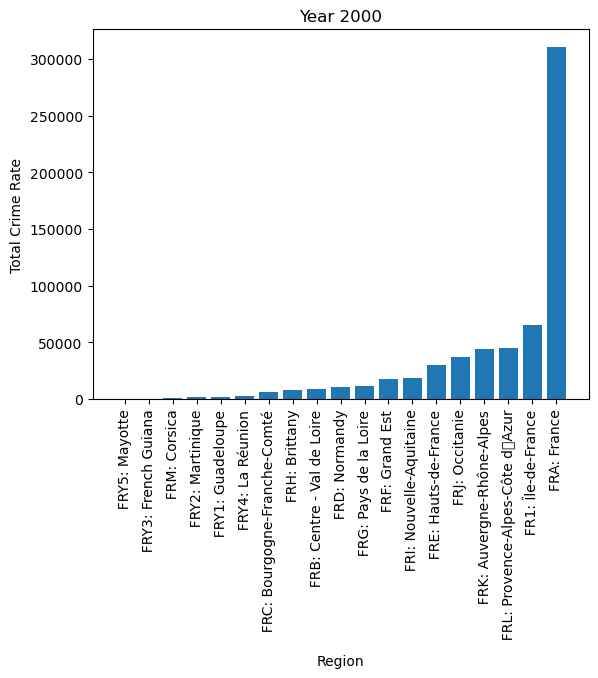

C:\Users\Hamna\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


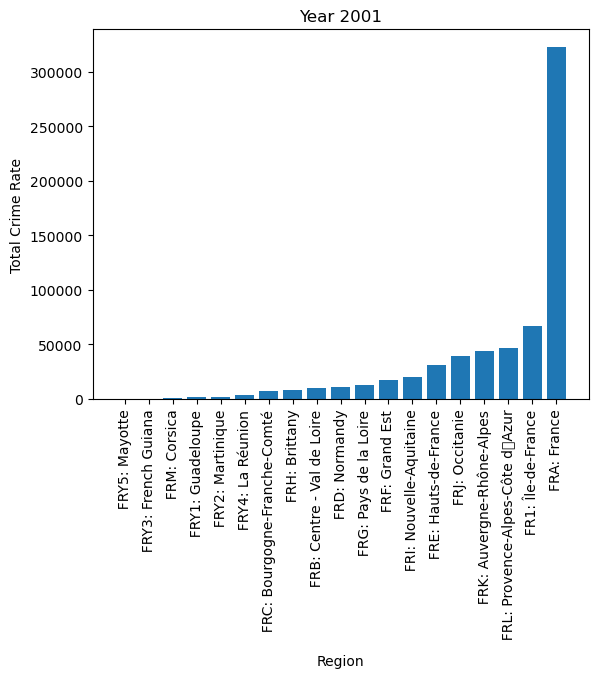

C:\Users\Hamna\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


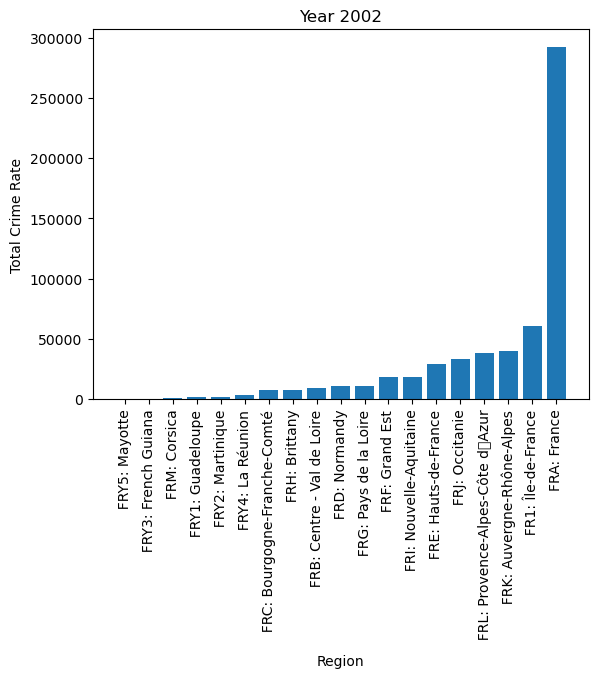

C:\Users\Hamna\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


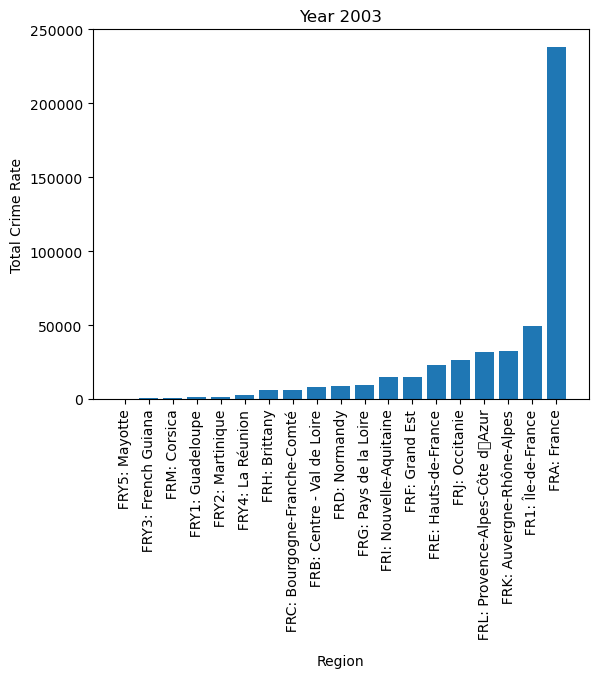

C:\Users\Hamna\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


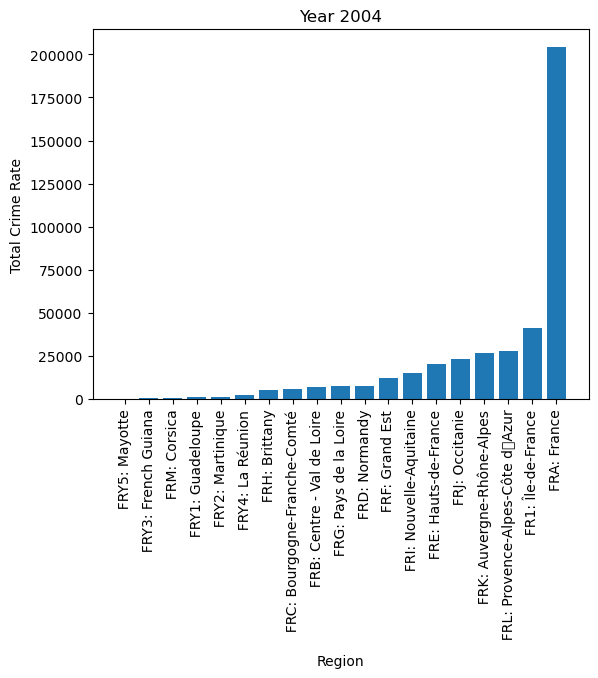

C:\Users\Hamna\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


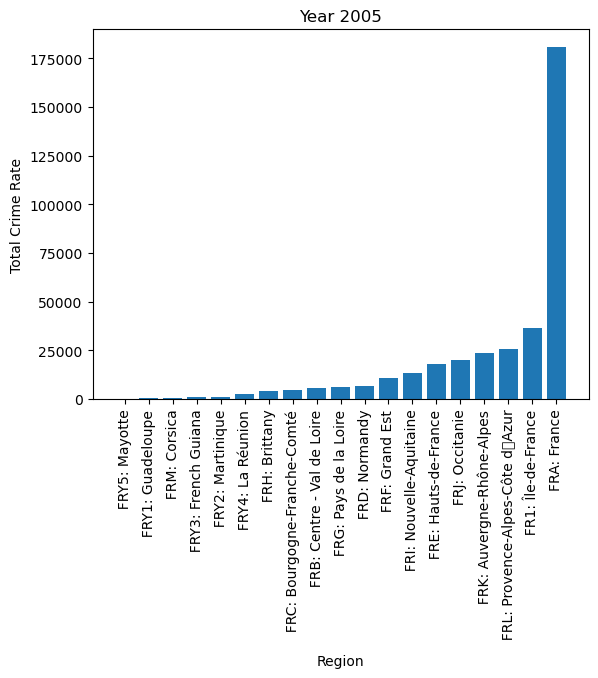

C:\Users\Hamna\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


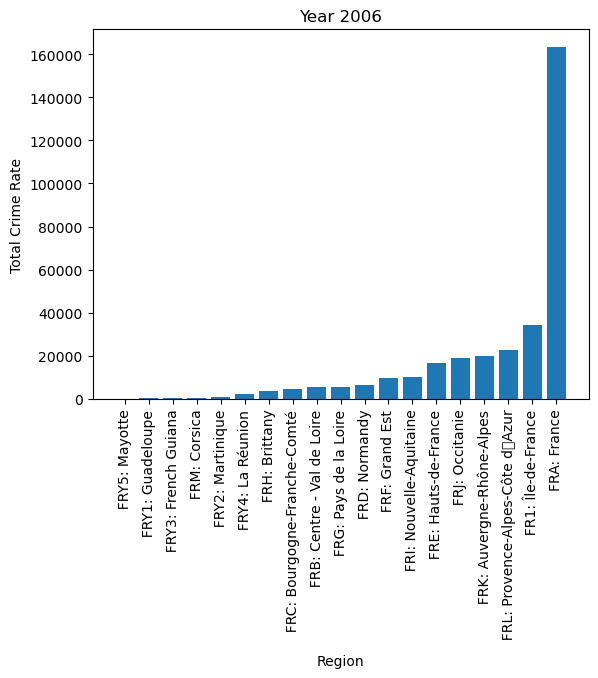

C:\Users\Hamna\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


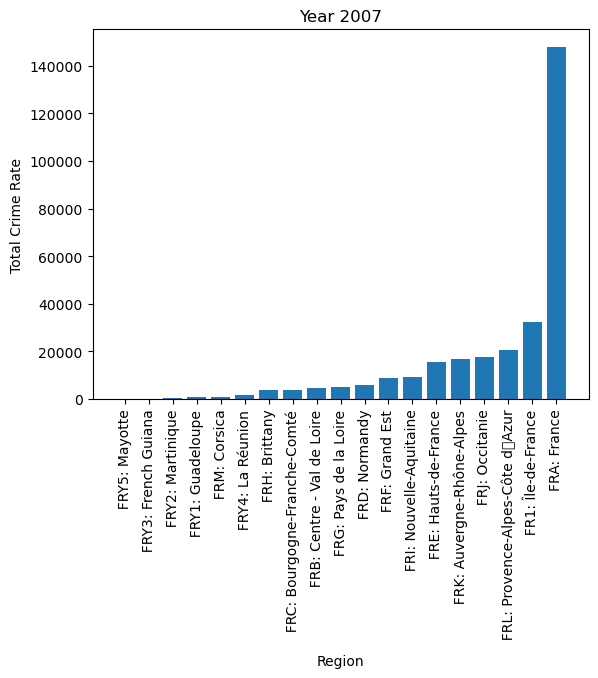

C:\Users\Hamna\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


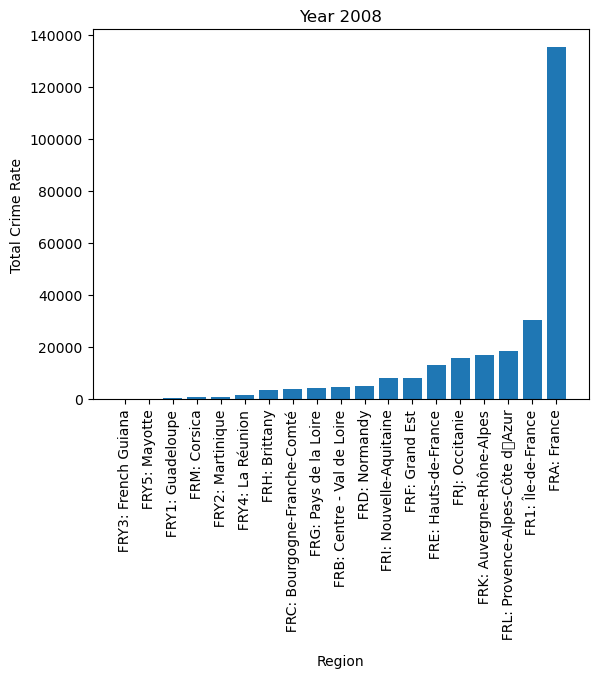

C:\Users\Hamna\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


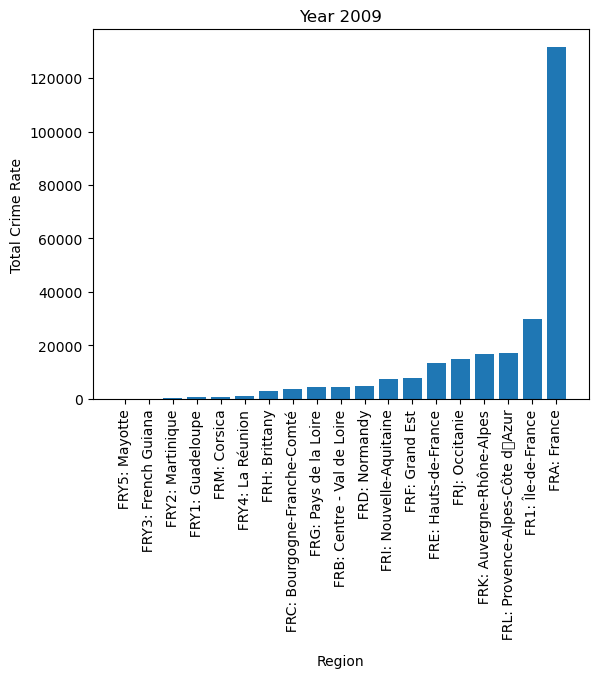

C:\Users\Hamna\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


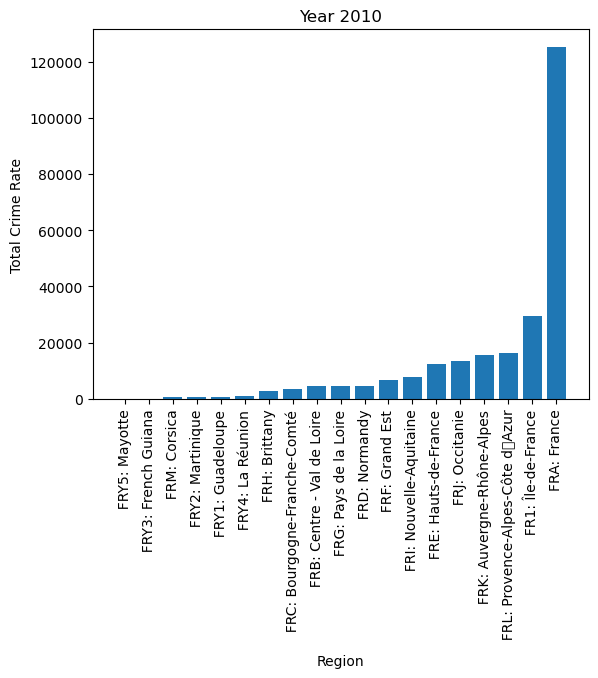

C:\Users\Hamna\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


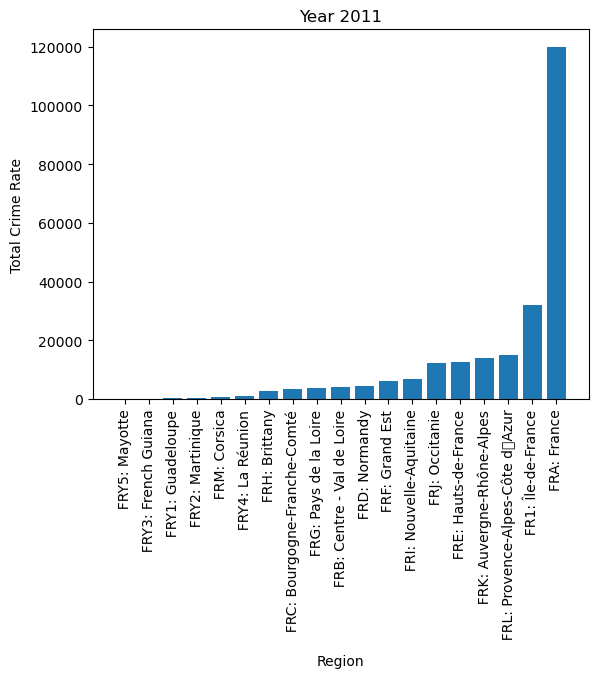

C:\Users\Hamna\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


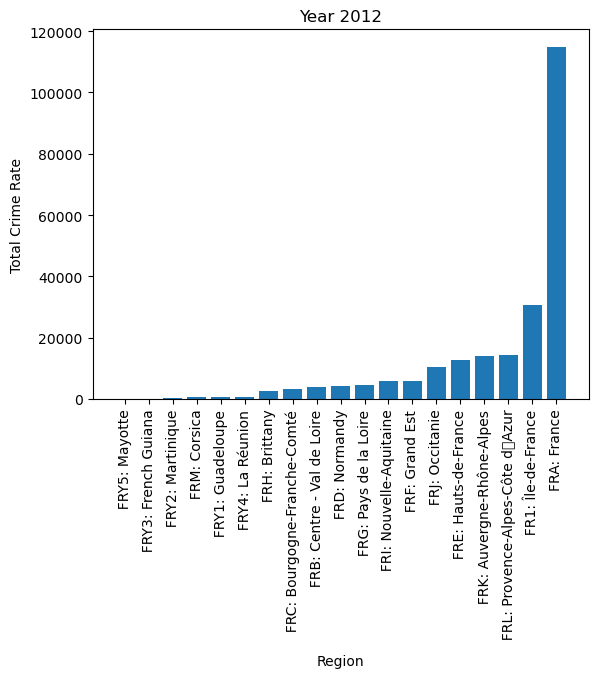

C:\Users\Hamna\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


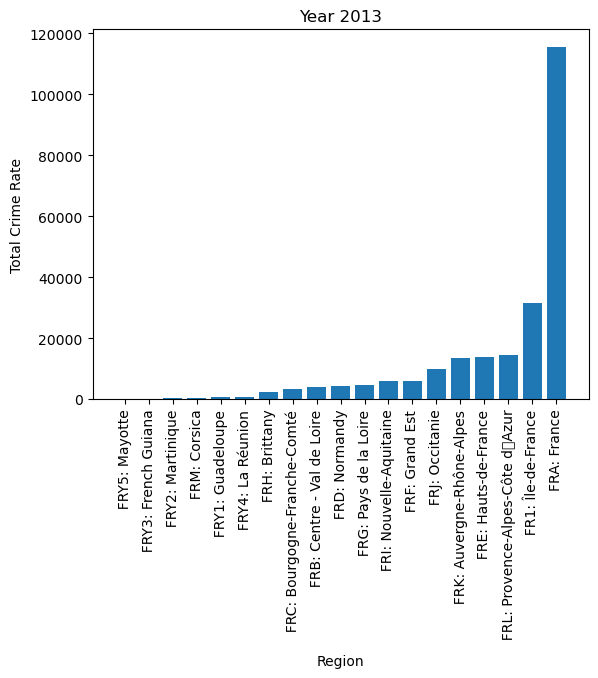

C:\Users\Hamna\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


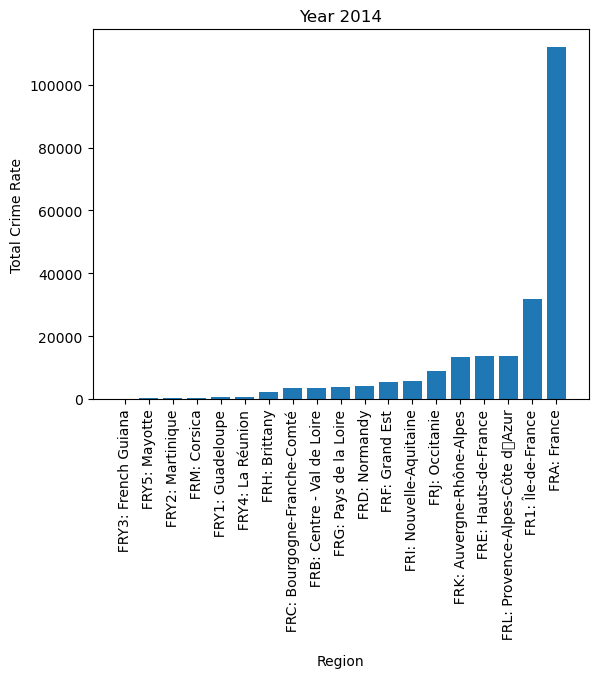

C:\Users\Hamna\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


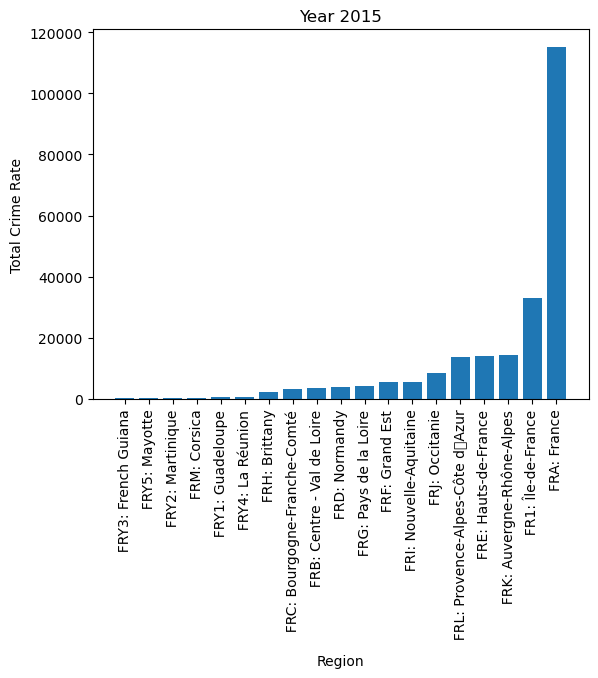

C:\Users\Hamna\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


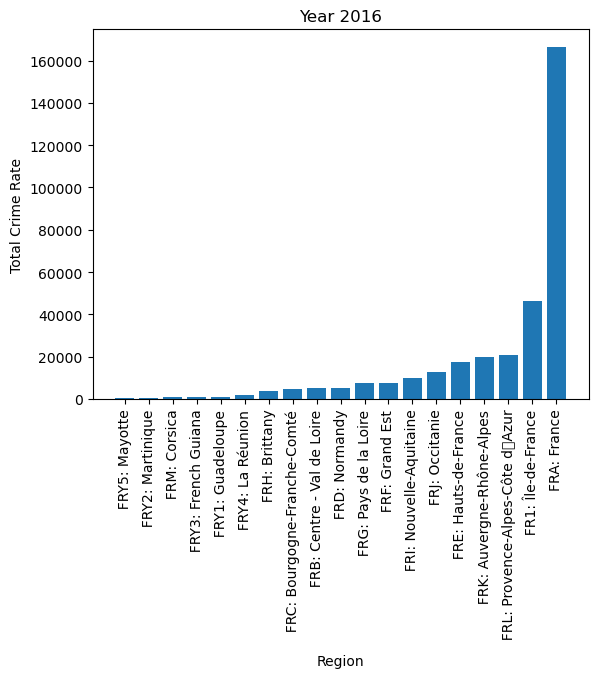

C:\Users\Hamna\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


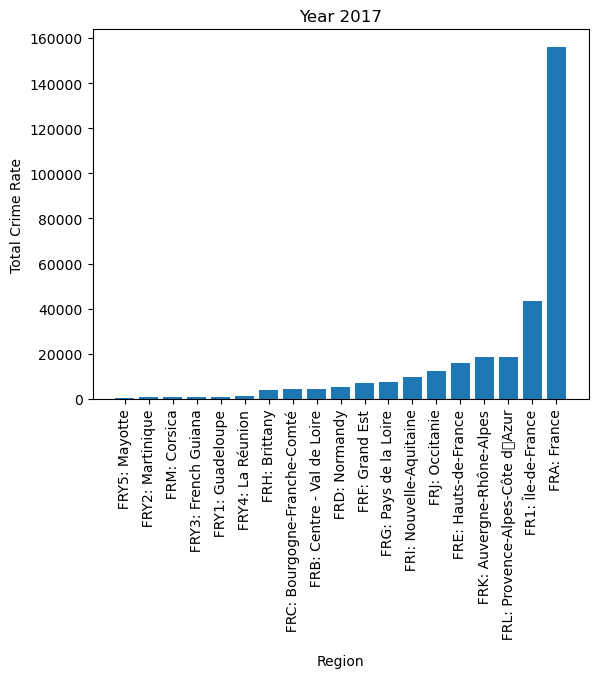

C:\Users\Hamna\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


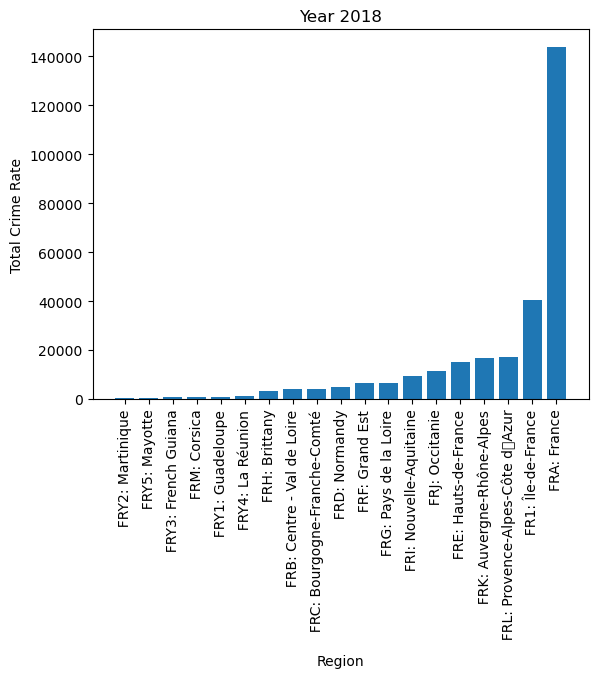

C:\Users\Hamna\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


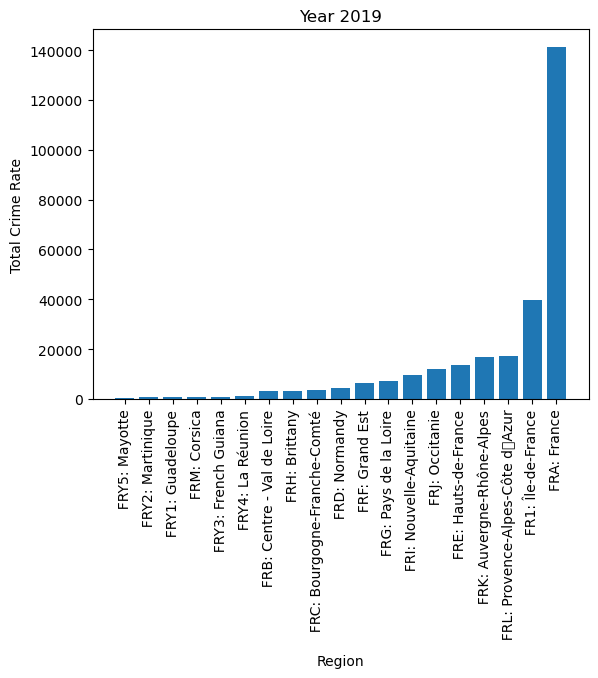

C:\Users\Hamna\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


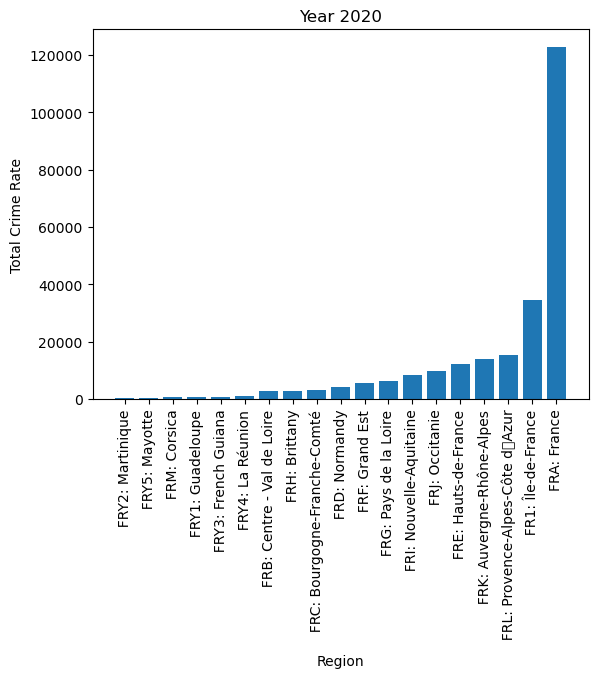

C:\Users\Hamna\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


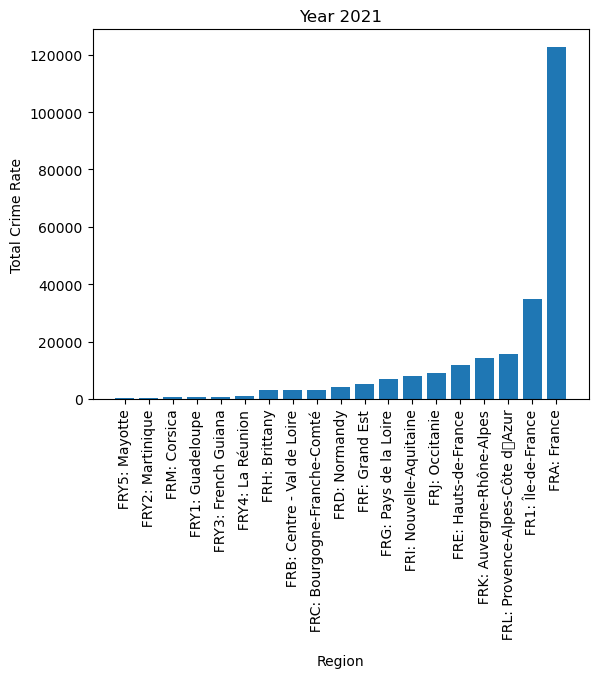

C:\Users\Hamna\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


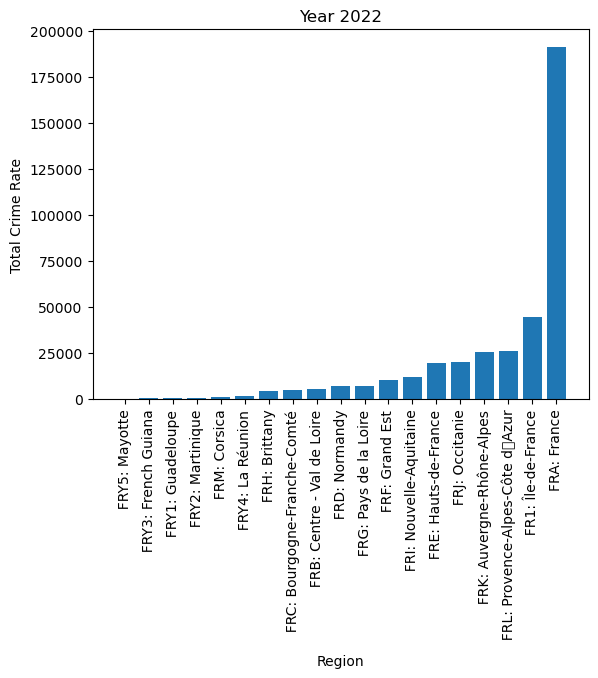

In [13]:
# Create a list of the years to plot
years = ['1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

# Create a loop to plot the total crime rate by region for each year
for year in years:
    # Create a new DataFrame with the total crime rate for each region
    crime_rate_by_region = crime_data.groupby('Region').sum()

    # Sort the DataFrame by the total crime rate in descending order
    crime_rate_by_region = crime_rate_by_region.sort_values(year)

    # Create a bar plot of the total crime rate by region for the current year
    plt.bar(crime_rate_by_region.index, crime_rate_by_region[year])
    plt.xticks(rotation=90)
    plt.xlabel('Region')
    plt.ylabel('Total Crime Rate')
    plt.title('Year {}'.format(year))
    plt.show()

# Top 5 regions have highest Crime Rate

In [14]:
# Group the data by region and calculate the average growth rate for each region
region_crime = crime_data.groupby('Region').mean()

# Sort the data by growth rate in descending order
region_crime = region_crime.sort_values(by='2022', ascending=False)

# Print the top 5 regions with the highest growth rate
region_crime.head()

1995      1996      1997      1998   
Region                                                                      
FRA: France                        231100.0  346725.0  323704.0  318130.0  \
  FR1: Île-de-France                79550.0   78531.0   71682.0   68347.0   
  FRL: Provence-Alpes-Côte dAzur   50668.0   52005.0   47498.0   50130.0   
  FRK: Auvergne-Rhône-Alpes         48909.0   50093.0   47649.0   49608.0   
  FRJ: Occitanie                    37340.0   38107.0   35355.0   35148.0   

                                       1999      2000      2001      2002   
Region                                                                      
FRA: France                        298550.0  310586.0  322657.0  292191.0  \
  FR1: Île-de-France                65088.0   65165.0   66980.0   60499.0   
  FRL: Provence-Alpes-Côte dAzur   45078.0   44985.0   46447.0   38476.0   
  FRK: Auvergne-Rhône-Alpes         44156.0   43988.0   44228.0   39956.0   
  FRJ: Occitanie                    35975.0   36897.0   39289.0   33481.0   

                                       2003      2004  ...      2013   
Region                                                 ...             
FRA: France                        238100.0  204322.0  ...  115540.0  \
  FR1: Île-de-France                49693.0   41043.0  ...   31506.0   
  FRL: Provence-Alpes-Côte dAzur   31569.0   27633.0  ...   14358.0   
  FRK: Auvergne-Rhône-Alpes         32651.0   26786.0  ...   13471.0   
  FRJ: Occitanie                    26695.0   23081.0  ...    9896.0   

                                       2014      2015      2016      2017   
Region                                                                      
FRA: France                        112038.0  115182.0  166429.0  156032.0  \
  FR1: Île-de-France                31692.0   33002.0   46363.0   43500.0   
  FRL: Provence-Alpes-Côte dAzur   13787.0   13718.0   21001.0   18607.0   
  FRK: Auvergne-Rhône-Alpes         13341.0   14460.0   19700.0   18426.0   
  FRJ: Occitanie                     8981.0    8655.0   12571.0   12423.0   

                                       2018      2019      2020      2021   
Region                                                                      
FRA: France                        143800.0  141246.0  122772.0  122684.0  \
  FR1: Île-de-France                40557.0   39836.0   34681.0   34727.0   
  FRL: Provence-Alpes-Côte dAzur   17169.0   17386.0   15246.0   15637.0   
  FRK: Auvergne-Rhône-Alpes         16766.0   16666.0   13927.0   14442.0   
  FRJ: Occitanie                    11417.0   12057.0    9775.0    9033.0   

                                       2022  
Region                                       
FRA: France                        191131.7  
  FR1: Île-de-France                44539.3  
  FRL: Provence-Alpes-Côte dAzur   26207.5  
  FRK: Auvergne-Rhône-Alpes         25305.7  
  FRJ: Occitanie                    20092.8  

[5 rows x 28 columns]

In [15]:
# Group the data by region and calculate the average growth rate for each region
region_crime = crime_data.groupby('Region').mean()

# Sort the data by growth rate in descending order
region_crime = region_crime.sort_values(by='2022', ascending=False)

# Calculate the percentage of regions with crime rate above a certain threshold
threshold = 500  # Set your desired threshold here
num_regions = len(region_crime)
num_regions_above_threshold = len(region_crime[region_crime['2022'] > threshold])
percentage_regions_above_threshold = (num_regions_above_threshold / num_regions) * 100

# Print the percentage of regions with crime rate above the threshold
print(f"Percentage of regions with crime rate above {threshold}: {percentage_regions_above_threshold:.2f}%")

Percentage of regions with crime rate above 500: 89.47%


In [5]:
# Store the plot data to a DataFrame
df = pd.DataFrame({'Year': crime_data.columns[1:], 'Crime_Rate': crime_data.loc[0][1:], 'Percentage': [f"{(rate/total_crime_rate)*100:.2f}%" for rate in crime_data.loc[0][1:]]})

# Store the DataFrame to a CSV file
df.to_csv('crime_rate_yearly_percentage.csv', index=False)

NameError: name 'total_crime_rate' is not defined

In [6]:
crime_rate_data = pd.read_csv('crime_rate_yearly_percentage.csv')
crime_rate_data

Year  Crime_Rate Percentage
0   1995    231100.0      4.29%
1   1996    346725.0      6.43%
2   1997    323704.0      6.00%
3   1998    318130.0      5.90%
4   1999    298550.0      5.54%
5   2000    310586.0      5.76%
6   2001    322657.0      5.98%
7   2002    292191.0      5.42%
8   2003    238100.0      4.42%
9   2004    204322.0      3.79%
10  2005    180724.0      3.35%
11  2006    163338.0      3.03%
12  2007    147852.0      2.74%
13  2008    135298.0      2.51%
14  2009    131610.0      2.44%
15  2010    125183.0      2.32%
16  2011    119906.0      2.22%
17  2012    114825.0      2.13%
18  2013    115540.0      2.14%
19  2014    112038.0      2.08%
20  2015    115182.0      2.14%
21  2016    166429.0      3.09%
22  2017    156032.0      2.89%
23  2018    143800.0      2.67%
24  2019    141246.0      2.62%
25  2020    122772.0      2.28%
26  2021    122684.0      2.28%
27  2022    191131.7      3.54%

# unemployment rate

In [7]:
unemployment_rate = pd.read_csv('unemployment rate.csv', encoding='ISO-8859-1')
unemployment_rate

Code                     Libell  T1_1995  T2_1995  T3_1995  T4_1995   
0      0       FRANCE (HORS MAYOTTE)      NaN      NaN      NaN      NaN  \
1      0       FRANCE METROPOLITAINE      9.8      9.6      9.5      9.6   
2     11               ILE-DE-FRANCE      8.9      8.8      8.7      8.8   
3     24         CENTRE-VAL DE LOIRE      8.7      8.4      8.2      8.3   
4     27     BOURGOGNE-FRANCHE-COMTE      8.6      8.3      8.2      8.3   
5     28                   NORMANDIE     10.2      9.9      9.8     10.1   
6     32             HAUTS-DE-FRANCE     12.2     11.9     11.8     12.0   
7     44                   GRAND-EST      8.2      8.0      7.9      8.0   
8     52            PAYS DE LA LOIRE      9.4      9.1      8.9      9.0   
9     53                    BRETAGNE      8.5      8.4      8.2      8.2   
10    75          NOUVELLE-AQUITAINE      9.6      9.4      9.3      9.4   
11    76                   OCCITANIE     11.2     11.0     10.9     11.1   
12    84        AUVERGNE-RHONE-ALPES      9.5      9.2      9.0      9.2   
13    93  PROVENCE-ALPES-COTE D'AZUR     13.0     12.7     12.5     12.7   
14    94                       CORSE     11.4     11.2     11.2     11.6   
15     1                  GUADELOUPE      NaN      NaN      NaN      NaN   
16     2                  MARTINIQUE      NaN      NaN      NaN      NaN   
17     3                      GUYANE      NaN      NaN      NaN      NaN   
18     4                  LA REUNION      NaN      NaN      NaN      NaN   

    T1_1996  T2_1996  T3_1996  T4_1996  ...  Unnamed: 194  Unnamed: 195   
0       NaN      NaN      NaN      NaN  ...           NaN           NaN  \
1       9.9     10.1     10.2     10.2  ...           NaN           NaN   
2       9.0      9.2      9.2      9.2  ...           NaN           NaN   
3       8.7      8.9      9.0      9.2  ...           NaN           NaN   
4       8.5      8.7      8.8      8.9  ...           NaN           NaN   
5      10.6     10.9     11.0     11.0  ...           NaN           NaN   
6      12.3     12.6     12.8     12.9  ...           NaN           NaN   
7       8.2      8.4      8.6      8.6  ...           NaN           NaN   
8       9.3      9.5      9.5      9.5  ...           NaN           NaN   
9       8.6      8.8      8.7      8.7  ...           NaN           NaN   
10      9.7      9.9      9.9      9.9  ...           NaN           NaN   
11     11.5     11.7     11.8     11.8  ...           NaN           NaN   
12      9.4      9.7      9.7      9.7  ...           NaN           NaN   
13     13.0     13.3     13.4     13.4  ...           NaN           NaN   
14     12.1     12.8     13.1     13.0  ...           NaN           NaN   
15      NaN      NaN      NaN      NaN  ...           NaN           NaN   
16      NaN      NaN      NaN      NaN  ...           NaN           NaN   
17      NaN      NaN      NaN      NaN  ...           NaN           NaN   
18      NaN      NaN      NaN      NaN  ...           NaN           NaN   

    Unnamed: 196  Unnamed: 197  Unnamed: 198  Unnamed: 199  Unnamed: 200   
0            NaN           NaN           NaN           NaN           NaN  \
1            NaN           NaN           NaN           NaN           NaN   
2            NaN           NaN           NaN           NaN           NaN   
3            NaN           NaN           NaN           NaN           NaN   
4            NaN           NaN           NaN           NaN           NaN   
5            NaN           NaN           NaN           NaN           NaN   
6            NaN           NaN           NaN           NaN           NaN   
7            NaN           NaN           NaN           NaN           NaN   
8            NaN           NaN           NaN           NaN           NaN   
9            NaN           NaN           NaN           NaN           NaN   
10           NaN           NaN           NaN           NaN           NaN   
11           NaN           NaN           NaN           NaN           N

In [8]:
unemployment_rate.describe()

Code    T1_1995    T2_1995    T3_1995    T4_1995    T1_1996   
count  19.000000  14.000000  14.000000  14.000000  14.000000  14.000000  \
mean   37.000000   9.942857   9.707143   9.578571   9.735714  10.057143   
std    33.865748   1.477896   1.456267   1.469264   1.537034   1.577590   
min     0.000000   8.200000   8.000000   7.900000   8.000000   8.200000   
25%     3.500000   8.750000   8.500000   8.325000   8.425000   8.775000   
50%    28.000000   9.550000   9.300000   9.150000   9.300000   9.550000   
75%    64.000000  10.950000  10.725000  10.625000  10.850000  11.275000   
max    94.000000  13.000000  12.700000  12.500000  12.700000  13.000000   

         T2_1996    T3_1996    T4_1996    T1_1997  ...  Unnamed: 194   
count  14.000000  14.000000  14.000000  14.000000  ...           0.0  \
mean   10.321429  10.407143  10.428571  10.492857  ...           NaN   
std     1.655842   1.710809   1.690894   1.698173  ...           NaN   
min     8.400000   8.600000   8.600000   8.700000  ...           NaN   
25%     8.975000   9.050000   9.200000   9.225000  ...           NaN   
50%     9.800000   9.800000   9.800000   9.800000  ...           NaN   
75%    11.500000  11.600000  11.600000  11.700000  ...           NaN   
max    13.300000  13.400000  13.400000  13.600000  ...           NaN   

       Unnamed: 195  Unnamed: 196  Unnamed: 197  Unnamed: 198  Unnamed: 199   
count           0.0           0.0           0.0           0.0           0.0  \
mean            NaN           NaN           NaN           NaN           NaN   
std             NaN           NaN           NaN           NaN           NaN   
min             NaN           NaN           NaN           NaN           NaN   
25%             NaN           NaN           NaN           NaN           NaN   
50%             NaN           NaN           NaN           NaN           NaN   
75%             NaN           NaN           NaN           NaN           NaN   
max             NaN           NaN           NaN           NaN           NaN   

       Unnamed: 200  Unnamed: 201  Unnamed: 202  Unnamed: 203  
count           0.0           0.0           0.0           0.0  
mean            NaN           NaN           NaN           NaN  
std             NaN           NaN           NaN           NaN  
min             NaN           NaN           NaN           NaN  
25%             NaN           NaN           NaN           NaN  
50%             NaN           NaN           NaN           NaN  
75%             NaN           NaN           NaN           NaN  
max             NaN           NaN           NaN           NaN  

[8 rows x 203 columns]

In [20]:
unemployment_rate.columns

Index(['Code', 'Libell', 'T1_1995', 'T2_1995', 'T3_1995', 'T4_1995',
       'T1_1996', 'T2_1996', 'T3_1996', 'T4_1996',
       ...
       'Unnamed: 194', 'Unnamed: 195', 'Unnamed: 196', 'Unnamed: 197',
       'Unnamed: 198', 'Unnamed: 199', 'Unnamed: 200', 'Unnamed: 201',
       'Unnamed: 202', 'Unnamed: 203'],
      dtype='object', length=204)

In [21]:
import pandas as pd
pd.options.display.max_columns = None

In [22]:
unemployment_rate.head(203)

Code                     Libell  T1_1995  T2_1995  T3_1995  T4_1995   
0      0       FRANCE (HORS MAYOTTE)      NaN      NaN      NaN      NaN  \
1      0       FRANCE METROPOLITAINE      9.8      9.6      9.5      9.6   
2     11               ILE-DE-FRANCE      8.9      8.8      8.7      8.8   
3     24         CENTRE-VAL DE LOIRE      8.7      8.4      8.2      8.3   
4     27     BOURGOGNE-FRANCHE-COMTE      8.6      8.3      8.2      8.3   
5     28                   NORMANDIE     10.2      9.9      9.8     10.1   
6     32             HAUTS-DE-FRANCE     12.2     11.9     11.8     12.0   
7     44                   GRAND-EST      8.2      8.0      7.9      8.0   
8     52            PAYS DE LA LOIRE      9.4      9.1      8.9      9.0   
9     53                    BRETAGNE      8.5      8.4      8.2      8.2   
10    75          NOUVELLE-AQUITAINE      9.6      9.4      9.3      9.4   
11    76                   OCCITANIE     11.2     11.0     10.9     11.1   
12    84        AUVERGNE-RHONE-ALPES      9.5      9.2      9.0      9.2   
13    93  PROVENCE-ALPES-COTE D'AZUR     13.0     12.7     12.5     12.7   
14    94                       CORSE     11.4     11.2     11.2     11.6   
15     1                  GUADELOUPE      NaN      NaN      NaN      NaN   
16     2                  MARTINIQUE      NaN      NaN      NaN      NaN   
17     3                      GUYANE      NaN      NaN      NaN      NaN   
18     4                  LA REUNION      NaN      NaN      NaN      NaN   

    T1_1996  T2_1996  T3_1996  T4_1996  T1_1997  T2_1997  T3_1997  T4_1997   
0       NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN  \
1       9.9     10.1     10.2     10.2     10.3     10.3     10.3     10.1   
2       9.0      9.2      9.2      9.2      9.3      9.3      9.4      9.2   
3       8.7      8.9      9.0      9.2      9.2      9.1      9.0      8.8   
4       8.5      8.7      8.8      8.9      9.0      9.0      8.9      8.8   
5      10.6     10.9     11.0     11.0     11.1     11.0     11.0     10.8   
6      12.3     12.6     12.8     12.9     13.0     13.0     13.0     12.9   
7       8.2      8.4      8.6      8.6      8.7      8.7      8.7      8.5   
8       9.3      9.5      9.5      9.5      9.5      9.5      9.4      9.2   
9       8.6      8.8      8.7      8.7      8.8      8.8      8.7      8.6   
10      9.7      9.9      9.9      9.9      9.9      9.9      9.9      9.9   
11     11.5     11.7     11.8     11.8     11.9     12.0     12.1     12.0   
12      9.4      9.7      9.7      9.7      9.7      9.5      9.4      9.2   
13     13.0     13.3     13.4     13.4     13.6     13.7     13.8     13.6   
14     12.1     12.8     13.1     13.0     12.9     13.2     13.5     13.1   
15      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
16      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
17      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
18      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

    T1_1998  T2_1998  T3_1998  T4_1998  T1_1999  T2_1999  T3_1999  T4_1999   
0       NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN  \
1       9.9      9.8      9.7      9.8      9.8      9.8      9.5      9.1   
2       9.1      9.0      8.9      8.9      8.9      8.8      8.5      8.2   
3       8.6      8.4      8.4      8.4      8.4      8.3      8.0      7.5   
4       8.5      8.3      8.3      8.3      8.4      8.3      8.0      7.5   
5      10.5     10.3     10.3     10.3     10.3     10.3     10.0      9.5   
6      12.6     12.4     12.4     12.4     12.5     12.5     12.2     11.7   
7       8.3      8.1      8.0      8.1      8.1      8.0      7.8      7.4   
8       8.9      8.8      8.7      8.7      8.7      8.5      8.1      7.7   
9       8.5      8.4      8.3      8.3      8.5      8.3      7.8      7.5   
10      9.7      9.6      9.5      9.6      9.6      9.5      9.

In [23]:
unemployment_rate.isnull().sum()

Code             0
Libell          0
T1_1995          5
T2_1995          5
T3_1995          5
                ..
Unnamed: 199    19
Unnamed: 200    19
Unnamed: 201    19
Unnamed: 202    19
Unnamed: 203    19
Length: 204, dtype: int64

In [24]:
unemployment_rate.dtypes

Code              int64
Libell          object
T1_1995         float64
T2_1995         float64
T3_1995         float64
                 ...   
Unnamed: 199    float64
Unnamed: 200    float64
Unnamed: 201    float64
Unnamed: 202    float64
Unnamed: 203    float64
Length: 204, dtype: object

In [9]:
# rename the column 
unemployment_rate  = unemployment_rate.rename(columns={'Libell': 'Libellae'})
unemployment_rate

Code                    Libellae  T1_1995  T2_1995  T3_1995  T4_1995   
0      0       FRANCE (HORS MAYOTTE)      NaN      NaN      NaN      NaN  \
1      0       FRANCE METROPOLITAINE      9.8      9.6      9.5      9.6   
2     11               ILE-DE-FRANCE      8.9      8.8      8.7      8.8   
3     24         CENTRE-VAL DE LOIRE      8.7      8.4      8.2      8.3   
4     27     BOURGOGNE-FRANCHE-COMTE      8.6      8.3      8.2      8.3   
5     28                   NORMANDIE     10.2      9.9      9.8     10.1   
6     32             HAUTS-DE-FRANCE     12.2     11.9     11.8     12.0   
7     44                   GRAND-EST      8.2      8.0      7.9      8.0   
8     52            PAYS DE LA LOIRE      9.4      9.1      8.9      9.0   
9     53                    BRETAGNE      8.5      8.4      8.2      8.2   
10    75          NOUVELLE-AQUITAINE      9.6      9.4      9.3      9.4   
11    76                   OCCITANIE     11.2     11.0     10.9     11.1   
12    84        AUVERGNE-RHONE-ALPES      9.5      9.2      9.0      9.2   
13    93  PROVENCE-ALPES-COTE D'AZUR     13.0     12.7     12.5     12.7   
14    94                       CORSE     11.4     11.2     11.2     11.6   
15     1                  GUADELOUPE      NaN      NaN      NaN      NaN   
16     2                  MARTINIQUE      NaN      NaN      NaN      NaN   
17     3                      GUYANE      NaN      NaN      NaN      NaN   
18     4                  LA REUNION      NaN      NaN      NaN      NaN   

    T1_1996  T2_1996  T3_1996  T4_1996  ...  Unnamed: 194  Unnamed: 195   
0       NaN      NaN      NaN      NaN  ...           NaN           NaN  \
1       9.9     10.1     10.2     10.2  ...           NaN           NaN   
2       9.0      9.2      9.2      9.2  ...           NaN           NaN   
3       8.7      8.9      9.0      9.2  ...           NaN           NaN   
4       8.5      8.7      8.8      8.9  ...           NaN           NaN   
5      10.6     10.9     11.0     11.0  ...           NaN           NaN   
6      12.3     12.6     12.8     12.9  ...           NaN           NaN   
7       8.2      8.4      8.6      8.6  ...           NaN           NaN   
8       9.3      9.5      9.5      9.5  ...           NaN           NaN   
9       8.6      8.8      8.7      8.7  ...           NaN           NaN   
10      9.7      9.9      9.9      9.9  ...           NaN           NaN   
11     11.5     11.7     11.8     11.8  ...           NaN           NaN   
12      9.4      9.7      9.7      9.7  ...           NaN           NaN   
13     13.0     13.3     13.4     13.4  ...           NaN           NaN   
14     12.1     12.8     13.1     13.0  ...           NaN           NaN   
15      NaN      NaN      NaN      NaN  ...           NaN           NaN   
16      NaN      NaN      NaN      NaN  ...           NaN           NaN   
17      NaN      NaN      NaN      NaN  ...           NaN           NaN   
18      NaN      NaN      NaN      NaN  ...           NaN           NaN   

    Unnamed: 196  Unnamed: 197  Unnamed: 198  Unnamed: 199  Unnamed: 200   
0            NaN           NaN           NaN           NaN           NaN  \
1            NaN           NaN           NaN           NaN           NaN   
2            NaN           NaN           NaN           NaN           NaN   
3            NaN           NaN           NaN           NaN           NaN   
4            NaN           NaN           NaN           NaN           NaN   
5            NaN           NaN           NaN           NaN           NaN   
6            NaN           NaN           NaN           NaN           NaN   
7            NaN           NaN           NaN           NaN           NaN   
8            NaN           NaN           NaN           NaN           NaN   
9            NaN           NaN           NaN           NaN           NaN   
10           NaN           NaN           NaN           NaN           NaN   
11           NaN           NaN           NaN           NaN           N

In [10]:
# select just the desired columns
unemployment_data = unemployment_rate[['Code', 'Libellae', 'T1_1995', 'T2_1995', 'T3_1995', 'T4_1995', 'T1_1996', 'T2_1996', 'T3_1996', 'T4_1996', 'T1_1997', 'T2_1997', 'T3_1997', 'T4_1997', 'T1_1998', 'T2_1998', 'T3_1998', 'T4_1998', 'T1_1999', 'T2_1999', 'T3_1999', 'T4_1999', 'T1_2000', 'T2_2000', 'T3_2000', 'T4_2000', 'T1_2001', 'T2_2001', 'T3_2001', 'T4_2001', 'T1_2002', 'T2_2002', 'T3_2002', 'T4_2002', 'T1_2003', 'T2_2003', 'T3_2003', 'T4_2003', 'T1_2004', 'T2_2004', 'T3_2004', 'T4_2004', 'T1_2005', 'T2_2005', 'T3_2005', 'T4_2005', 'T1_2006', 'T2_2006', 'T3_2006', 'T4_2006', 'T1_2007', 'T2_2007', 'T3_2007', 'T4_2007', 'T1_2008', 'T2_2008', 'T3_2008', 'T4_2008', 'T1_2009', 'T2_2009', 'T3_2009', 'T4_2009', 'T1_2010', 'T2_2010', 'T3_2010', 'T4_2010', 'T1_2011', 'T2_2011', 'T3_2011', 'T4_2011', 'T1_2012', 'T2_2012', 'T3_2012', 'T4_2012', 'T1_2013', 'T2_2013', 'T3_2013', 'T4_2013', 'T1_2014', 'T2_2014', 'T3_2014', 'T4_2014', 'T1_2015', 'T2_2015', 'T3_2015', 'T4_2015', 'T1_2016', 'T2_2016', 'T3_2016', 'T4_2016', 'T1_2017', 'T2_2017', 'T3_2017', 'T4_2017', 'T1_2018', 'T2_2018', 'T3_2018', 'T4_2018', 'T1_2019', 'T2_2019', 'T3_2019', 'T4_2019', 'T1_2020', 'T2_2020', 'T3_2020', 'T4_2020', 'T1_2021', 'T2_2021', 'T3_2021', 'T4_2021', 'T1_2022', 'T2_2022', 'T3_2022']]

In [11]:
unemployment_data = unemployment_data.fillna(0)
unemployment_data

Code                    Libellae  T1_1995  T2_1995  T3_1995  T4_1995   
0      0       FRANCE (HORS MAYOTTE)      0.0      0.0      0.0      0.0  \
1      0       FRANCE METROPOLITAINE      9.8      9.6      9.5      9.6   
2     11               ILE-DE-FRANCE      8.9      8.8      8.7      8.8   
3     24         CENTRE-VAL DE LOIRE      8.7      8.4      8.2      8.3   
4     27     BOURGOGNE-FRANCHE-COMTE      8.6      8.3      8.2      8.3   
5     28                   NORMANDIE     10.2      9.9      9.8     10.1   
6     32             HAUTS-DE-FRANCE     12.2     11.9     11.8     12.0   
7     44                   GRAND-EST      8.2      8.0      7.9      8.0   
8     52            PAYS DE LA LOIRE      9.4      9.1      8.9      9.0   
9     53                    BRETAGNE      8.5      8.4      8.2      8.2   
10    75          NOUVELLE-AQUITAINE      9.6      9.4      9.3      9.4   
11    76                   OCCITANIE     11.2     11.0     10.9     11.1   
12    84        AUVERGNE-RHONE-ALPES      9.5      9.2      9.0      9.2   
13    93  PROVENCE-ALPES-COTE D'AZUR     13.0     12.7     12.5     12.7   
14    94                       CORSE     11.4     11.2     11.2     11.6   
15     1                  GUADELOUPE      0.0      0.0      0.0      0.0   
16     2                  MARTINIQUE      0.0      0.0      0.0      0.0   
17     3                      GUYANE      0.0      0.0      0.0      0.0   
18     4                  LA REUNION      0.0      0.0      0.0      0.0   

    T1_1996  T2_1996  T3_1996  T4_1996  ...  T2_2020  T3_2020  T4_2020   
0       0.0      0.0      0.0      0.0  ...      7.1      9.0      8.1  \
1       9.9     10.1     10.2     10.2  ...      7.0      8.8      7.8   
2       9.0      9.2      9.2      9.2  ...      6.3      8.3      7.7   
3       8.7      8.9      9.0      9.2  ...      6.9      8.2      7.2   
4       8.5      8.7      8.8      8.9  ...      6.4      7.9      6.7   
5      10.6     10.9     11.0     11.0  ...      7.3      8.9      7.7   
6      12.3     12.6     12.8     12.9  ...      8.6     10.8      9.4   
7       8.2      8.4      8.6      8.6  ...      7.0      8.7      7.8   
8       9.3      9.5      9.5      9.5  ...      6.6      7.9      6.8   
9       8.6      8.8      8.7      8.7  ...      6.3      7.6      6.6   
10      9.7      9.9      9.9      9.9  ...      6.8      8.3      7.3   
11     11.5     11.7     11.8     11.8  ...      8.4     10.5      9.5   
12      9.4      9.7      9.7      9.7  ...      6.4      7.9      7.1   
13     13.0     13.3     13.4     13.4  ...      8.2     10.2      9.1   
14     12.1     12.8     13.1     13.0  ...      7.5      9.2      7.0   
15      0.0      0.0      0.0      0.0  ...     11.4     19.6     19.8   
16      0.0      0.0      0.0      0.0  ...      8.2     15.6     14.3   
17      0.0      0.0      0.0      0.0  ...      8.7     18.7     20.7   
18      0.0      0.0      0.0      0.0  ...     13.5     19.7     17.1   

    T1_2021  T2_2021  T3_2021  T4_2021  T1_2022  T2_2022  T3_2022  
0       8.2      7.9      8.0      7.4      7.3      7.4      7.3  
1       8.0      7.7      7.8      7.2      7.1      7.2      7.1  
2       7.7      7.5      7.6      7.2      7.0      7.0      6.9  
3       7.3      7.2      7.2      6.7      6.7      6.9      6.9  
4       6.9      6.8      6.8      6.2      6.2      6.4      6.4  
5       7.8      7.6      7.7      7.0      6.8      7.1      7.0  
6       9.6      9.3      9.7      8.9      8.7      9.0      8.9  
7       7.9      7.7      7.8      7.3      7.1      7.2      7.1  
8       6.9      6.6      6.6      6.0      5.9      6.0      6.1  
9       6.7      6.5      6.5      5.9      5.8      5.9      6.0  
10      7.4      7.2      7.2      6.6      6.5      6.5      6.6  
11      9.6      9.3      9.4      8.8      8.8      8.8      8.7  
12      7.3      7.0      6.9      6.4      6.3      6.4      6.3  
13      9.3      9.0      8.9      8.3      8.3   

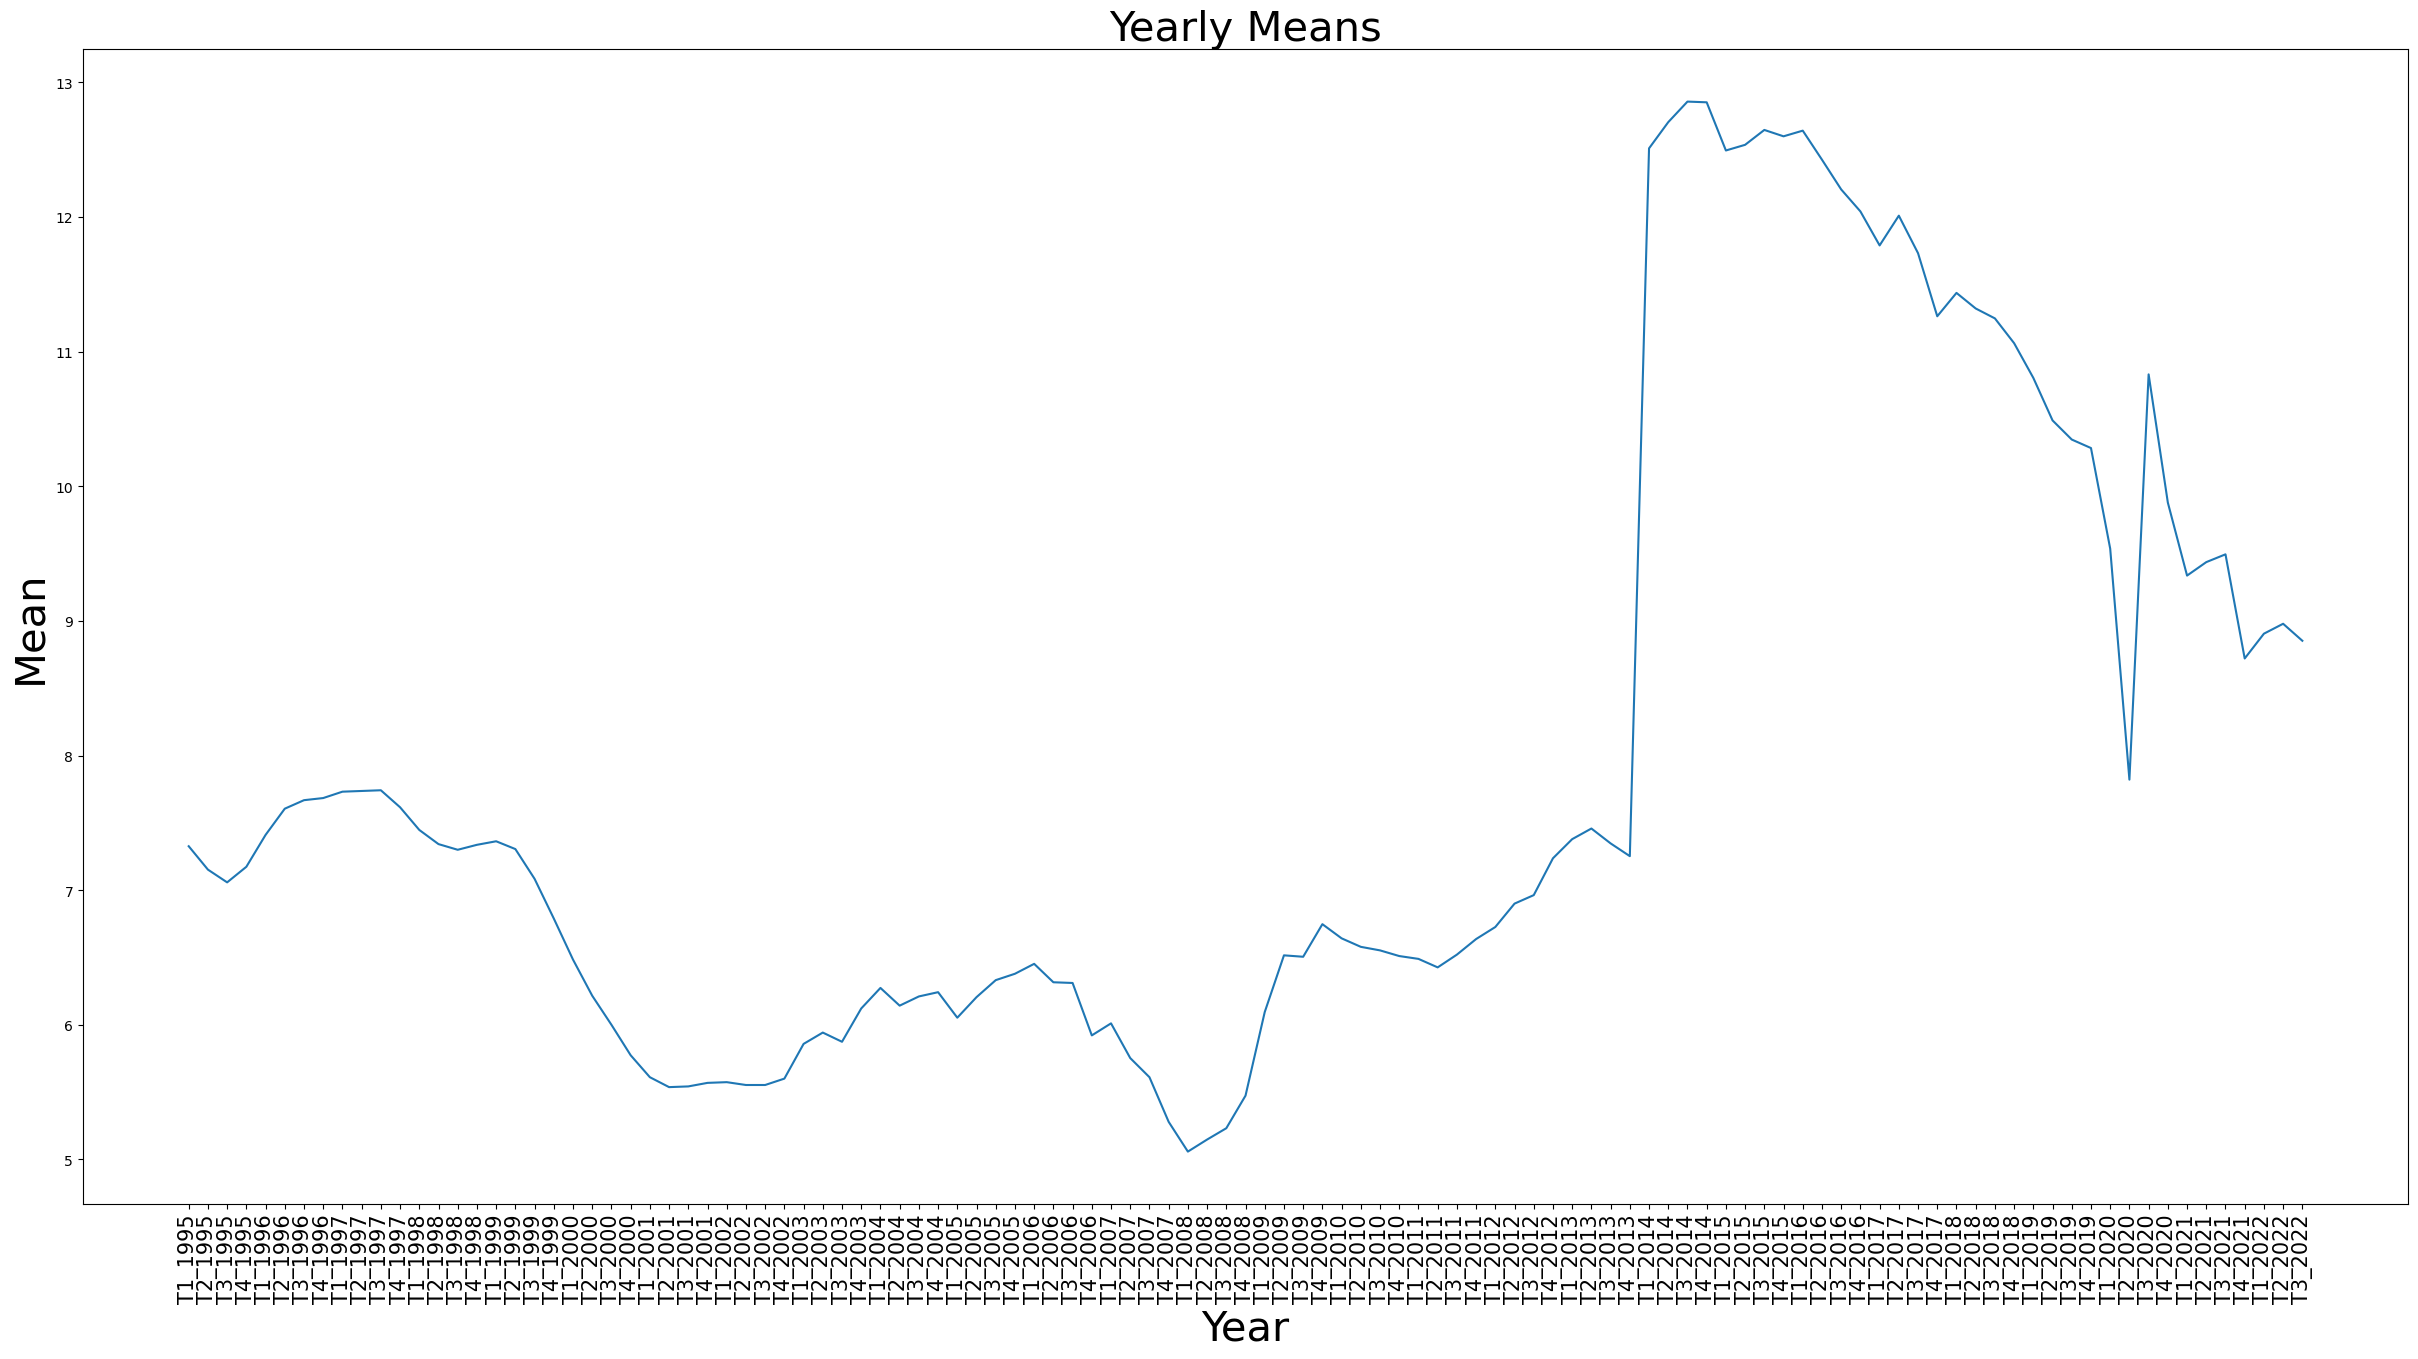

In [28]:
# Calculate the mean of each year
yearly_means = unemployment_data.loc[:, 'T1_1995':'T3_2022'].mean()

# Create a figure with a larger size
plt.figure(figsize=(30, 15))

# Plot a line chart of the yearly means
plt.plot(yearly_means.index, yearly_means.values)

# Set the plot title, labels, and tick rotation
plt.title("Yearly Means", fontsize=30)
plt.xlabel("Year", fontsize=30)
plt.ylabel("Mean", fontsize=30)
plt.xticks(rotation=90)

# Increase the font size of the x-axis labels
plt.tick_params(axis='x', labelsize=15)

# Show the plot
plt.show()

In [29]:
unemployment_data.isnull().sum()

Code        0
Libellae    0
T1_1995     0
T2_1995     0
T3_1995     0
           ..
T3_2021     0
T4_2021     0
T1_2022     0
T2_2022     0
T3_2022     0
Length: 113, dtype: int64

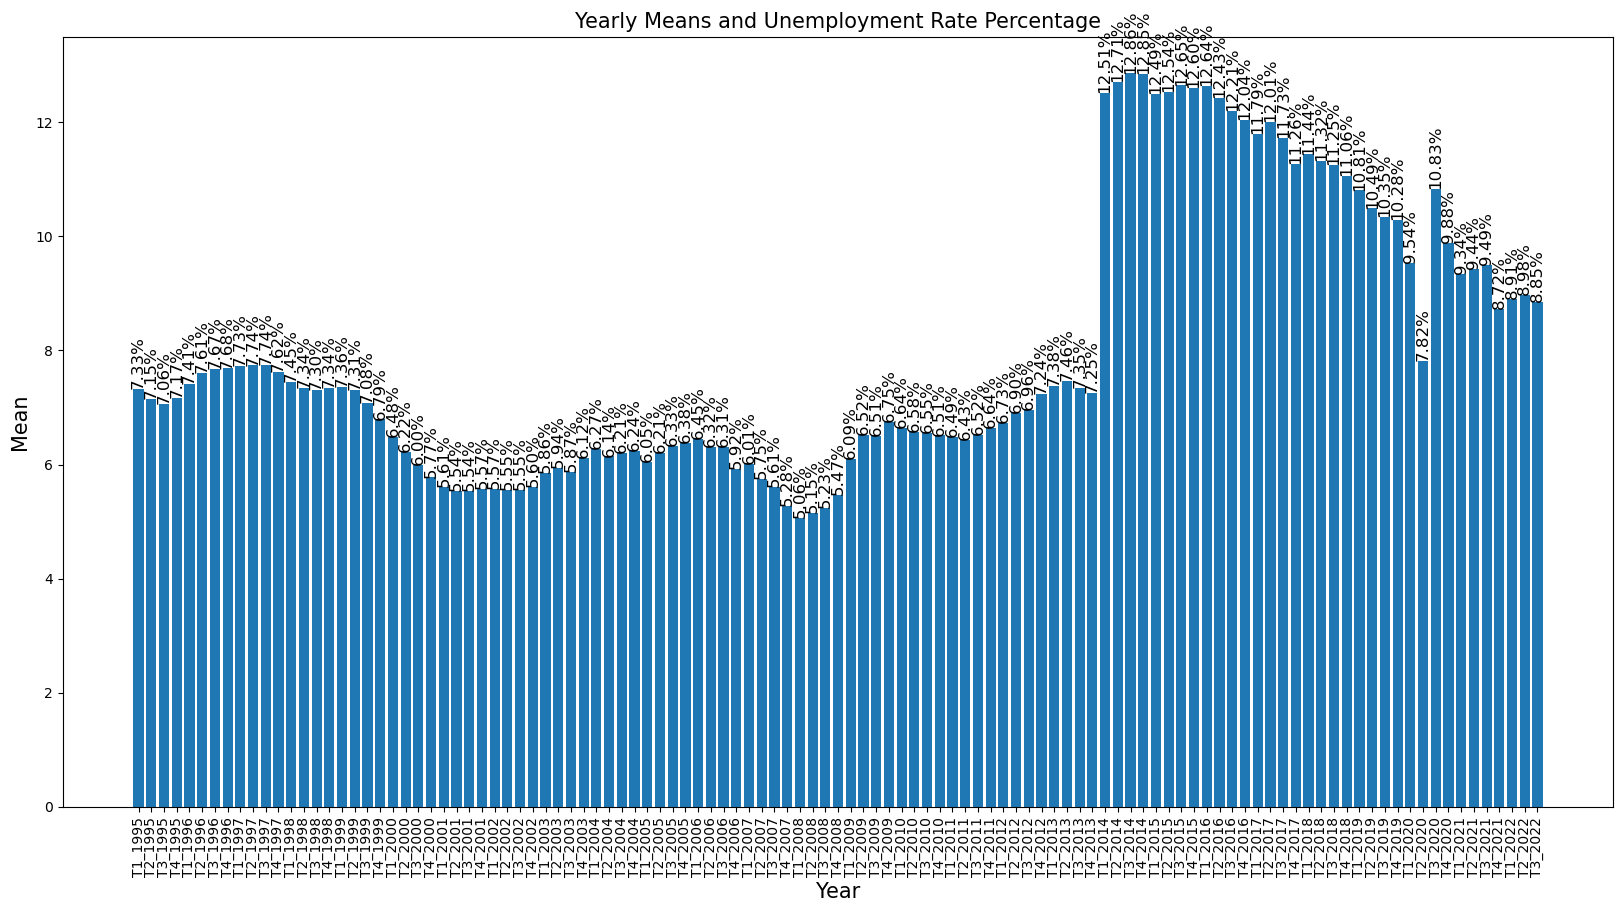

In [13]:
# Calculate the mean of each year
yearly_means = unemployment_data.loc[:, 'T1_1995':'T3_2022'].mean()

# Calculate the percentage of unemployment rate for each year
yearly_percentage = yearly_means / 100

# Create a figure with a larger size
plt.figure(figsize=(20, 10))

# Plot a bar chart of the yearly means
plt.bar(yearly_means.index, yearly_means.values)

# Add percentage labels on top of the bars
for i, v in enumerate(yearly_means.values):
    plt.text(i, v, f"{yearly_percentage[i]:.2%}", ha='center', va='bottom', fontsize=12, rotation=90)

# Set the plot title, labels, and tick rotation
plt.title("Yearly Means and Unemployment Rate Percentage", fontsize=15)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Mean", fontsize=15)
plt.xticks(rotation=90)

# Show the plot
plt.show()


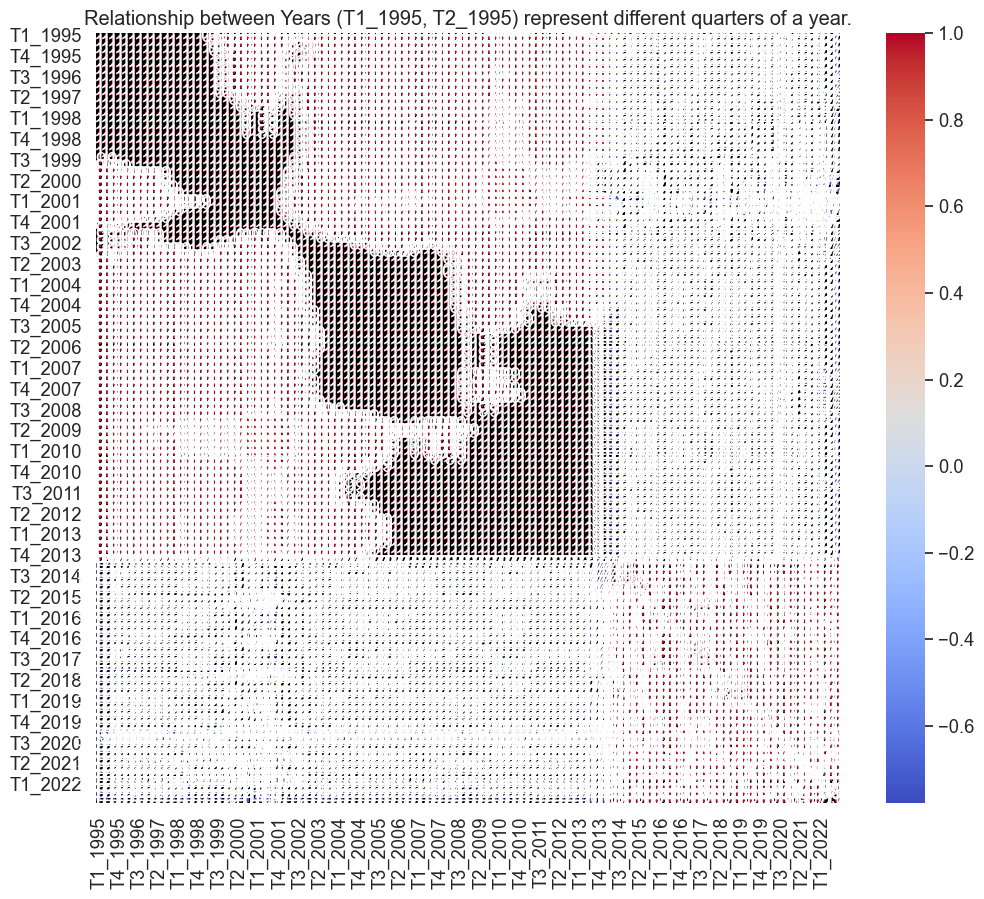

In [14]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# select the desired columns
unemployment_data_heatmap = unemployment_data[['T1_1995', 'T2_1995', 'T3_1995', 'T4_1995', 'T1_1996', 'T2_1996', 'T3_1996', 'T4_1996', 'T1_1997', 'T2_1997', 'T3_1997', 'T4_1997', 'T1_1998', 'T2_1998', 'T3_1998', 'T4_1998', 'T1_1999', 'T2_1999', 'T3_1999', 'T4_1999', 'T1_2000', 'T2_2000', 'T3_2000', 'T4_2000', 'T1_2001', 'T2_2001', 'T3_2001', 'T4_2001', 'T1_2002', 'T2_2002', 'T3_2002', 'T4_2002', 'T1_2003', 'T2_2003', 'T3_2003', 'T4_2003', 'T1_2004', 'T2_2004', 'T3_2004', 'T4_2004', 'T1_2005', 'T2_2005', 'T3_2005', 'T4_2005', 'T1_2006', 'T2_2006', 'T3_2006', 'T4_2006', 'T1_2007', 'T2_2007', 'T3_2007', 'T4_2007', 'T1_2008', 'T2_2008', 'T3_2008', 'T4_2008', 'T1_2009', 'T2_2009', 'T3_2009', 'T4_2009', 'T1_2010', 'T2_2010', 'T3_2010', 'T4_2010', 'T1_2011', 'T2_2011', 'T3_2011', 'T4_2011', 'T1_2012', 'T2_2012', 'T3_2012', 'T4_2012', 'T1_2013', 'T2_2013', 'T3_2013', 'T4_2013', 'T1_2014', 'T2_2014', 'T3_2014', 'T4_2014', 'T1_2015', 'T2_2015', 'T3_2015', 'T4_2015', 'T1_2016', 'T2_2016', 'T3_2016', 'T4_2016', 'T1_2017', 'T2_2017', 'T3_2017', 'T4_2017', 'T1_2018', 'T2_2018', 'T3_2018', 'T4_2018', 'T1_2019', 'T2_2019', 'T3_2019', 'T4_2019', 'T1_2020', 'T2_2020', 'T3_2020', 'T4_2020', 'T1_2021', 'T2_2021', 'T3_2021', 'T4_2021', 'T1_2022', 'T2_2022', 'T3_2022']]
# compute correlation matrix
corr = unemployment_data_heatmap.corr()

# plot the heatmap
sns.set(font_scale=1.2)
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=1, linecolor='black')
plt.title('Relationship between Years (T1_1995, T2_1995) represent different quarters of a year.')
plt.show()

In [16]:
# Store the plot data to a DataFrame
df = pd.DataFrame({'Year': yearly_means.index, 'Mean': yearly_means.values, 'Percentage': yearly_percentage.values})

# Store the DataFrame to a CSV file
df.to_csv('unemployment_rate_yearly_means.csv', index=False)

In [17]:
unemployment_data = pd.read_csv('unemployment_rate_yearly_means.csv')
unemployment_data

Year      Mean  Percentage
0    T1_1995  7.326316    0.073263
1    T2_1995  7.152632    0.071526
2    T3_1995  7.057895    0.070579
3    T4_1995  7.173684    0.071737
4    T1_1996  7.410526    0.074105
..       ...       ...         ...
106  T3_2021  9.494737    0.094947
107  T4_2021  8.721053    0.087211
108  T1_2022  8.905263    0.089053
109  T2_2022  8.978947    0.089789
110  T3_2022  8.852632    0.088526

[111 rows x 3 columns]

# Regional Gross Domestic Product

In [18]:
gdp = pd.read_csv('Regional_gross_domestic_products from 1995 to 2021.csv', encoding='ISO-8859-1')
gdp

Region       1995       1996       1997   
0                       Auvergne-Rhne-Alpes    135,625    140,396    146,597  \
1                    Bourgogne-Franche-Comt     48,483     49,648     51,003   
2                                   Bretagne     48,461     49,830     52,236   
3                        Centre-Val de Loire     45,385     46,263     47,138   
4                                      Corse      3,796      3,832      4,075   
5                                  Grand Est    100,978    103,118    105,180   
6                            Hauts-de-France     96,515     99,255    100,798   
7                              ?le-de-France    351,723    362,129    374,854   
8                                  Normandie     58,236     59,191     60,468   
9                         Nouvelle-Aquitaine     90,687     93,382     97,298   
10                                 Occitanie     79,577     81,771     85,329   
11                          Pays de la Loire     55,955     57,985     59,332   
12                Provence-Alpes-Cte d'Azur     83,818     85,656     87,637   
13  France mtropolitaine hors ?le-de-France    847,515    870,326    897,090   
14                     France mtropolitaine  1,199,238  1,232,455  1,271,945   
15                                Guadeloupe       n.d.       n.d.       n.d.   
16                                Martinique       n.d.       n.d.       n.d.   
17                                    Guyane       n.d.       n.d.       n.d.   
18                                  Runion        n.d.       n.d.       n.d.   
19                                   Mayotte       n.d.       n.d.       n.d.   
20                                       Dom     17,791     18,561     19,525   
21              France mtropolitaine et DOM  1,217,029  1,251,017  1,291,470   
22                                       NaN        NaN        NaN        NaN   
23                                       NaN        NaN        NaN        NaN   
24                                       NaN        NaN        NaN        NaN   
25                                       NaN        NaN        NaN        NaN   
26                                       NaN        NaN        NaN        NaN   
27                                       NaN        NaN        NaN        NaN   
28                                       NaN        NaN        NaN        NaN   
29                                       NaN        NaN        NaN        NaN   
30                                       NaN        NaN        NaN        NaN   
31                                       NaN        NaN        NaN        NaN   
32                                       NaN        NaN        NaN        NaN   
33                                       NaN        NaN        NaN        NaN   
34                                       NaN        NaN        NaN        NaN   
35                                       NaN        NaN        NaN        NaN   
36                                       NaN        NaN        NaN        NaN   

         1998       1999       2000       2001       2002       2003  ...   
0     153,864    157,638    166,458    172,703    176,495    181,129  ...  \
1      53,449     54,622     57,942     59,732     61,124     62,163  ...   
2      54,945     56,657     60,879     63,381     65,294     67,613  ...   
3      49,416     50,712     53,061     55,158     56,519     57,894  ...   
4       4,308      4,549      4,734      5,033      5,184      5,426  ...   
5     110,776    112,445    118,295    121,205    123,877    126,176  ...   
6     106,290    108,189    112,806    116,266    120,029    123,618  ...   
7     388,615    413,267    434,976    450,378    467,079    476,542  ...   
8      62,814     64,704     68,440     70,062     71,985     74,272  ...   
9     102,090    102,834    109,671    115,624    120,521    123,675  ...   
10     89,002     92,527     96,988    103,385    107,331    111,658  ...   
11     62,772     65,241     70,195

In [19]:
gdp.columns

Index(['Region', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', '2022', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31'],
      dtype='object')

In [20]:
gdp_rate = gdp[['Region', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', '2022']]

In [21]:
gdp_rate = gdp_rate.fillna(0)
gdp_rate

Region       1995       1996       1997   
0                       Auvergne-Rhne-Alpes    135,625    140,396    146,597  \
1                    Bourgogne-Franche-Comt     48,483     49,648     51,003   
2                                   Bretagne     48,461     49,830     52,236   
3                        Centre-Val de Loire     45,385     46,263     47,138   
4                                      Corse      3,796      3,832      4,075   
5                                  Grand Est    100,978    103,118    105,180   
6                            Hauts-de-France     96,515     99,255    100,798   
7                              ?le-de-France    351,723    362,129    374,854   
8                                  Normandie     58,236     59,191     60,468   
9                         Nouvelle-Aquitaine     90,687     93,382     97,298   
10                                 Occitanie     79,577     81,771     85,329   
11                          Pays de la Loire     55,955     57,985     59,332   
12                Provence-Alpes-Cte d'Azur     83,818     85,656     87,637   
13  France mtropolitaine hors ?le-de-France    847,515    870,326    897,090   
14                     France mtropolitaine  1,199,238  1,232,455  1,271,945   
15                                Guadeloupe       n.d.       n.d.       n.d.   
16                                Martinique       n.d.       n.d.       n.d.   
17                                    Guyane       n.d.       n.d.       n.d.   
18                                  Runion        n.d.       n.d.       n.d.   
19                                   Mayotte       n.d.       n.d.       n.d.   
20                                       Dom     17,791     18,561     19,525   
21              France mtropolitaine et DOM  1,217,029  1,251,017  1,291,470   
22                                         0          0          0          0   
23                                         0          0          0          0   
24                                         0          0          0          0   
25                                         0          0          0          0   
26                                         0          0          0          0   
27                                         0          0          0          0   
28                                         0          0          0          0   
29                                         0          0          0          0   
30                                         0          0          0          0   
31                                         0          0          0          0   
32                                         0          0          0          0   
33                                         0          0          0          0   
34                                         0          0          0          0   
35                                         0          0          0          0   
36                                         0          0          0          0   

         1998       1999       2000       2001       2002       2003  ...   
0     153,864    157,638    166,458    172,703    176,495    181,129  ...  \
1      53,449     54,622     57,942     59,732     61,124     62,163  ...   
2      54,945     56,657     60,879     63,381     65,294     67,613  ...   
3      49,416     50,712     53,061     55,158     56,519     57,894  ...   
4       4,308      4,549      4,734      5,033      5,184      5,426  ...   
5     110,776    112,445    118,295    121,205    123,877    126,176  ...   
6     106,290    108,189    112,806    116,266    120,029    123,618  ...   
7     388,615    413,267    434,976    450,378    467,079    476,542  ...   
8      62,814     64,704     68,440     70,062     71,985     74,272  ...   
9     102,090    102,834    109,671    115,624    120,521    123,675  ...   
10     89,002     92,527     96,988    103,385    107,331    111,658  ...   
11     62,772     65,241     70,195

In [22]:
gdp_rate = gdp_rate.drop(index=range(22, 37))

In [23]:
gdp_rate

Region       1995       1996       1997   
0                       Auvergne-Rhne-Alpes    135,625    140,396    146,597  \
1                    Bourgogne-Franche-Comt     48,483     49,648     51,003   
2                                   Bretagne     48,461     49,830     52,236   
3                        Centre-Val de Loire     45,385     46,263     47,138   
4                                      Corse      3,796      3,832      4,075   
5                                  Grand Est    100,978    103,118    105,180   
6                            Hauts-de-France     96,515     99,255    100,798   
7                              ?le-de-France    351,723    362,129    374,854   
8                                  Normandie     58,236     59,191     60,468   
9                         Nouvelle-Aquitaine     90,687     93,382     97,298   
10                                 Occitanie     79,577     81,771     85,329   
11                          Pays de la Loire     55,955     57,985     59,332   
12                Provence-Alpes-Cte d'Azur     83,818     85,656     87,637   
13  France mtropolitaine hors ?le-de-France    847,515    870,326    897,090   
14                     France mtropolitaine  1,199,238  1,232,455  1,271,945   
15                                Guadeloupe       n.d.       n.d.       n.d.   
16                                Martinique       n.d.       n.d.       n.d.   
17                                    Guyane       n.d.       n.d.       n.d.   
18                                  Runion        n.d.       n.d.       n.d.   
19                                   Mayotte       n.d.       n.d.       n.d.   
20                                       Dom     17,791     18,561     19,525   
21              France mtropolitaine et DOM  1,217,029  1,251,017  1,291,470   

         1998       1999       2000       2001       2002       2003  ...   
0     153,864    157,638    166,458    172,703    176,495    181,129  ...  \
1      53,449     54,622     57,942     59,732     61,124     62,163  ...   
2      54,945     56,657     60,879     63,381     65,294     67,613  ...   
3      49,416     50,712     53,061     55,158     56,519     57,894  ...   
4       4,308      4,549      4,734      5,033      5,184      5,426  ...   
5     110,776    112,445    118,295    121,205    123,877    126,176  ...   
6     106,290    108,189    112,806    116,266    120,029    123,618  ...   
7     388,615    413,267    434,976    450,378    467,079    476,542  ...   
8      62,814     64,704     68,440     70,062     71,985     74,272  ...   
9     102,090    102,834    109,671    115,624    120,521    123,675  ...   
10     89,002     92,527     96,988    103,385    107,331    111,658  ...   
11     62,772     65,241     70,195     73,892     76,464     79,048  ...   
12     91,650     94,502    100,460    105,808    108,941    113,033  ...   
13    941,377    964,621  1,019,928  1,062,249  1,093,765  1,125,705  ...   
14  1,329,992  1,377,888  1,454,904  1,512,627  1,560,844  1,602,247  ...   
15       n.d.       n.d.      5,108      5,464      5,693      6,111  ...   
16       n.d.       n.d.      5,338      5,700      5,915      6,245  ...   
17       n.d.       n.d.      1,953      2,270      2,437      2,403  ...   
18       n.d.       n.d.      9,552     10,285     10,993     11,634  ...   
19       n.d.       n.d.        557        602        637        722  ...   
20     20,613     21,855     22,509     24,321     25,675     27,115  ...   
21  1,350,605  1,399,743  1,477,413  1,536,948  1,586,519  1,629,363  ...   

         2013       2014       2015       2016       2017       2018   
0     239,911    243,947    249,918    255,860    264,325    274,209  \
1      72,173     73,480     74,357     74,459     76,855     78,176   
2      86,911     88,974     91,304     93,369     96,798     98,576   
3      69,089     69,472     70,730     71,052     72,752     74,142   
4       8,217      8,343      8,617      8

In [24]:
# replace 'n.d' values with NaN
gdp_rate.replace('n.d.', 'nan', inplace=True)

In [25]:
gdp_rate

Region       1995       1996       1997   
0                       Auvergne-Rhne-Alpes    135,625    140,396    146,597  \
1                    Bourgogne-Franche-Comt     48,483     49,648     51,003   
2                                   Bretagne     48,461     49,830     52,236   
3                        Centre-Val de Loire     45,385     46,263     47,138   
4                                      Corse      3,796      3,832      4,075   
5                                  Grand Est    100,978    103,118    105,180   
6                            Hauts-de-France     96,515     99,255    100,798   
7                              ?le-de-France    351,723    362,129    374,854   
8                                  Normandie     58,236     59,191     60,468   
9                         Nouvelle-Aquitaine     90,687     93,382     97,298   
10                                 Occitanie     79,577     81,771     85,329   
11                          Pays de la Loire     55,955     57,985     59,332   
12                Provence-Alpes-Cte d'Azur     83,818     85,656     87,637   
13  France mtropolitaine hors ?le-de-France    847,515    870,326    897,090   
14                     France mtropolitaine  1,199,238  1,232,455  1,271,945   
15                                Guadeloupe        nan        nan        nan   
16                                Martinique        nan        nan        nan   
17                                    Guyane        nan        nan        nan   
18                                  Runion         nan        nan        nan   
19                                   Mayotte        nan        nan        nan   
20                                       Dom     17,791     18,561     19,525   
21              France mtropolitaine et DOM  1,217,029  1,251,017  1,291,470   

         1998       1999       2000       2001       2002       2003  ...   
0     153,864    157,638    166,458    172,703    176,495    181,129  ...  \
1      53,449     54,622     57,942     59,732     61,124     62,163  ...   
2      54,945     56,657     60,879     63,381     65,294     67,613  ...   
3      49,416     50,712     53,061     55,158     56,519     57,894  ...   
4       4,308      4,549      4,734      5,033      5,184      5,426  ...   
5     110,776    112,445    118,295    121,205    123,877    126,176  ...   
6     106,290    108,189    112,806    116,266    120,029    123,618  ...   
7     388,615    413,267    434,976    450,378    467,079    476,542  ...   
8      62,814     64,704     68,440     70,062     71,985     74,272  ...   
9     102,090    102,834    109,671    115,624    120,521    123,675  ...   
10     89,002     92,527     96,988    103,385    107,331    111,658  ...   
11     62,772     65,241     70,195     73,892     76,464     79,048  ...   
12     91,650     94,502    100,460    105,808    108,941    113,033  ...   
13    941,377    964,621  1,019,928  1,062,249  1,093,765  1,125,705  ...   
14  1,329,992  1,377,888  1,454,904  1,512,627  1,560,844  1,602,247  ...   
15        nan        nan      5,108      5,464      5,693      6,111  ...   
16        nan        nan      5,338      5,700      5,915      6,245  ...   
17        nan        nan      1,953      2,270      2,437      2,403  ...   
18        nan        nan      9,552     10,285     10,993     11,634  ...   
19        nan        nan        557        602        637        722  ...   
20     20,613     21,855     22,509     24,321     25,675     27,115  ...   
21  1,350,605  1,399,743  1,477,413  1,536,948  1,586,519  1,629,363  ...   

         2013       2014       2015       2016       2017       2018   
0     239,911    243,947    249,918    255,860    264,325    274,209  \
1      72,173     73,480     74,357     74,459     76,855     78,176   
2      86,911     88,974     91,304     93,369     96,798     98,576   
3      69,089     69,472     70,730     71,052     72,752     74,142   
4       8,217      8,343      8,617      8

In [26]:
# replace 'n.d' values with NaN
gdp_rate.replace('nan', 0 , inplace=True)

In [27]:
gdp_rate

Region       1995       1996       1997   
0                       Auvergne-Rhne-Alpes    135,625    140,396    146,597  \
1                    Bourgogne-Franche-Comt     48,483     49,648     51,003   
2                                   Bretagne     48,461     49,830     52,236   
3                        Centre-Val de Loire     45,385     46,263     47,138   
4                                      Corse      3,796      3,832      4,075   
5                                  Grand Est    100,978    103,118    105,180   
6                            Hauts-de-France     96,515     99,255    100,798   
7                              ?le-de-France    351,723    362,129    374,854   
8                                  Normandie     58,236     59,191     60,468   
9                         Nouvelle-Aquitaine     90,687     93,382     97,298   
10                                 Occitanie     79,577     81,771     85,329   
11                          Pays de la Loire     55,955     57,985     59,332   
12                Provence-Alpes-Cte d'Azur     83,818     85,656     87,637   
13  France mtropolitaine hors ?le-de-France    847,515    870,326    897,090   
14                     France mtropolitaine  1,199,238  1,232,455  1,271,945   
15                                Guadeloupe          0          0          0   
16                                Martinique          0          0          0   
17                                    Guyane          0          0          0   
18                                  Runion           0          0          0   
19                                   Mayotte          0          0          0   
20                                       Dom     17,791     18,561     19,525   
21              France mtropolitaine et DOM  1,217,029  1,251,017  1,291,470   

         1998       1999       2000       2001       2002       2003  ...   
0     153,864    157,638    166,458    172,703    176,495    181,129  ...  \
1      53,449     54,622     57,942     59,732     61,124     62,163  ...   
2      54,945     56,657     60,879     63,381     65,294     67,613  ...   
3      49,416     50,712     53,061     55,158     56,519     57,894  ...   
4       4,308      4,549      4,734      5,033      5,184      5,426  ...   
5     110,776    112,445    118,295    121,205    123,877    126,176  ...   
6     106,290    108,189    112,806    116,266    120,029    123,618  ...   
7     388,615    413,267    434,976    450,378    467,079    476,542  ...   
8      62,814     64,704     68,440     70,062     71,985     74,272  ...   
9     102,090    102,834    109,671    115,624    120,521    123,675  ...   
10     89,002     92,527     96,988    103,385    107,331    111,658  ...   
11     62,772     65,241     70,195     73,892     76,464     79,048  ...   
12     91,650     94,502    100,460    105,808    108,941    113,033  ...   
13    941,377    964,621  1,019,928  1,062,249  1,093,765  1,125,705  ...   
14  1,329,992  1,377,888  1,454,904  1,512,627  1,560,844  1,602,247  ...   
15          0          0      5,108      5,464      5,693      6,111  ...   
16          0          0      5,338      5,700      5,915      6,245  ...   
17          0          0      1,953      2,270      2,437      2,403  ...   
18          0          0      9,552     10,285     10,993     11,634  ...   
19          0          0        557        602        637        722  ...   
20     20,613     21,855     22,509     24,321     25,675     27,115  ...   
21  1,350,605  1,399,743  1,477,413  1,536,948  1,586,519  1,629,363  ...   

         2013       2014       2015       2016       2017       2018   
0     239,911    243,947    249,918    255,860    264,325    274,209  \
1      72,173     73,480     74,357     74,459     76,855     78,176   
2      86,911     88,974     91,304     93,369     96,798     98,576   
3      69,089     69,472     70,730     71,052     72,752     74,142   
4       8,217      8,343      8,617      8

In [28]:
gdp_rate.dtypes

Region    object
1995      object
1996      object
1997      object
1998      object
1999      object
2000      object
2001      object
2002      object
2003      object
2004      object
2005      object
2006      object
2007      object
2008      object
2009      object
2010      object
2011      object
2012      object
2013      object
2014      object
2015      object
2016      object
2017      object
2018      object
2019      object
2020      object
2021      object
2022      object
dtype: object

In [29]:
gdp_rate.describe()

Region  1995  1996  1997  1998  1999     2000     2001   
count                     22    22    22    22    22    22       22       22  \
unique                    22    18    18    18    18    18       22       22   
top     Auvergne-Rhne-Alpes     0     0     0     0     0  166,458  172,703   
freq                       1     5     5     5     5     5        1        1   

           2002     2003  ...     2013     2014     2015     2016     2017   
count        22       22  ...       22       22       22       22       22  \
unique       22       22  ...       22       22       22       22       22   
top     176,495  181,129  ...  239,911  243,947  249,918  255,860  264,325   
freq          1        1  ...        1        1        1        1        1   

           2018     2019     2020     2021     2022  
count        22       22       22       22       22  
unique       22       22       22       22       22  
top     274,209  282,294  270,450  290,844  213,459  
freq          1        1        1        1        1  

[4 rows x 29 columns]

In [30]:
gdp_rate.isnull().sum()

Region    0
1995      0
1996      0
1997      0
1998      0
1999      0
2000      0
2001      0
2002      0
2003      0
2004      0
2005      0
2006      0
2007      0
2008      0
2009      0
2010      0
2011      0
2012      0
2013      0
2014      0
2015      0
2016      0
2017      0
2018      0
2019      0
2020      0
2021      0
2022      0
dtype: int64

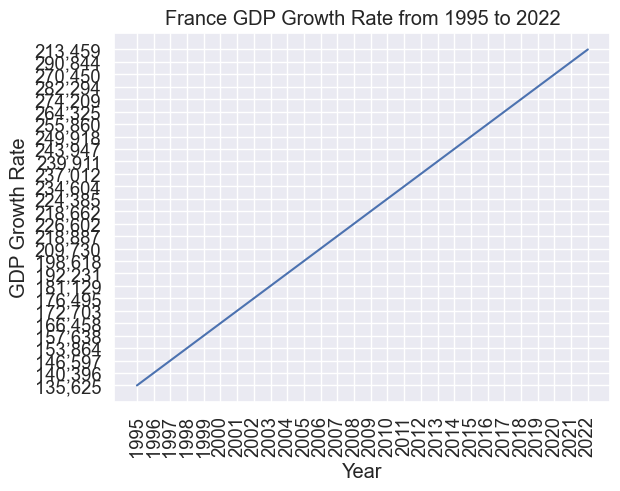

In [31]:
# Create a line chart
plt.plot(gdp_rate.columns[1:], gdp_rate.loc[0][1:])
plt.xlabel("Year")
plt.ylabel("GDP Growth Rate")
plt.xticks(rotation=90)
plt.title("France GDP Growth Rate from 1995 to 2022")
plt.show()

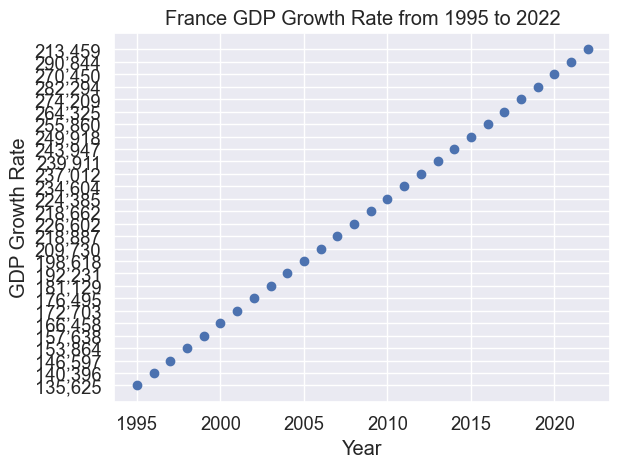

In [48]:
# Create a scatter plot
x = gdp_rate.columns[1:].astype(int)
y = gdp_rate.loc[0][1:]
plt.scatter(x, y)
plt.xlabel("Year")
plt.ylabel("GDP Growth Rate")
plt.title("France GDP Growth Rate from 1995 to 2022")
plt.show()

In [32]:
for col in gdp_rate.columns[1:]:
    gdp_rate[col] = gdp_rate[col].str.replace(',', '').astype(float)

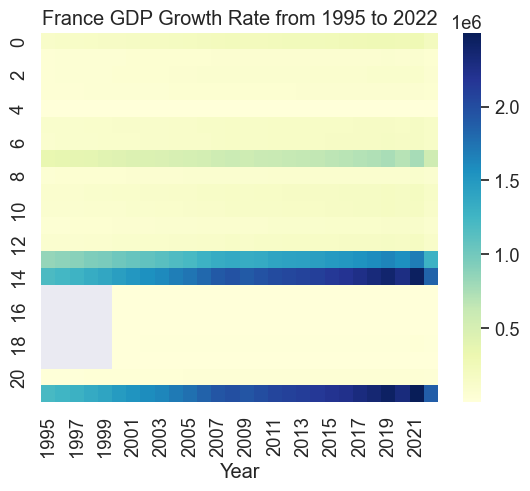

In [50]:
# Create a heat map
import seaborn as sns
sns.heatmap(gdp_rate.iloc[:,1:], cmap="YlGnBu")
plt.xlabel("Year")
plt.title("France GDP Growth Rate from 1995 to 2022")
plt.show()

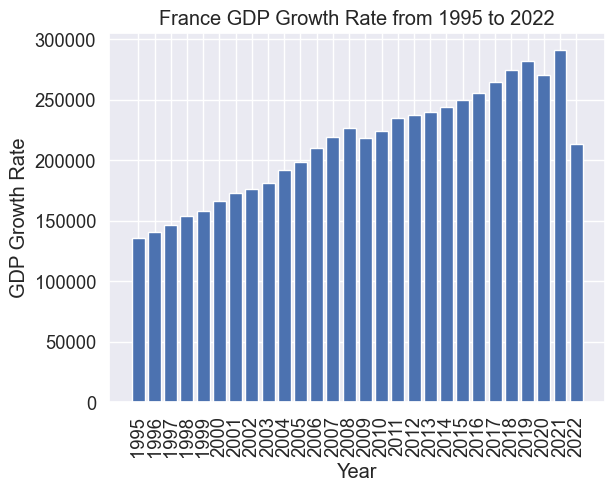

In [51]:
# Create a bar chart
plt.bar(gdp_rate.columns[1:], gdp_rate.loc[0][1:])
plt.xlabel("Year")
plt.ylabel("GDP Growth Rate")
plt.title("France GDP Growth Rate from 1995 to 2022")
plt.xticks(rotation=90)
plt.show()

In [33]:
# Create a DataFrame from the bar chart data
year = gdp_rate.columns[1:]
gdp_growth_rate = gdp_rate.loc[0][1:]
df = pd.DataFrame({'Year': year, 'GDP Growth Rate': gdp_growth_rate})

# Store the DataFrame to a CSV file
df.to_csv('france_gdp_growth_rate.csv', index=False)

In [34]:
gdp_data = pd.read_csv('france_gdp_growth_rate.csv')
gdp_data

Year  GDP Growth Rate
0   1995         135625.0
1   1996         140396.0
2   1997         146597.0
3   1998         153864.0
4   1999         157638.0
5   2000         166458.0
6   2001         172703.0
7   2002         176495.0
8   2003         181129.0
9   2004         192231.0
10  2005         198618.0
11  2006         209730.0
12  2007         218887.0
13  2008         226602.0
14  2009         218662.0
15  2010         224385.0
16  2011         234604.0
17  2012         237012.0
18  2013         239911.0
19  2014         243947.0
20  2015         249918.0
21  2016         255860.0
22  2017         264325.0
23  2018         274209.0
24  2019         282294.0
25  2020         270450.0
26  2021         290844.0
27  2022         213459.0

# Which year has highest growth rate?

In [35]:
# Calculate the average growth rate for each year
yearly_avg = gdp_rate.iloc[:,1:].mean()

# Find the year with the highest average growth rate
max_year = yearly_avg.idxmax()

print("Year with the highest average GDP growth rate:", max_year)

Year with the highest average GDP growth rate: 2021


# Top 5 Regions with highest Growth rate

In [36]:
# Group the data by region and calculate the average growth rate for each region
region_gdp = gdp_rate.groupby('Region').mean()

# Sort the data by growth rate in descending order
region_gdp = region_gdp.sort_values(by='2022', ascending=False)

# Print the top 5 regions with the highest growth rate
region_gdp.head()

1995       1996       1997   
Region                                                                      
France mtropolitaine et DOM              1217029.0  1251017.0  1291470.0  \
France mtropolitaine                     1199238.0  1232455.0  1271945.0   
France mtropolitaine hors ?le-de-France   847515.0   870326.0   897090.0   
?le-de-France                              351723.0   362129.0   374854.0   
Auvergne-Rhne-Alpes                       135625.0   140396.0   146597.0   

                                               1998       1999       2000   
Region                                                                      
France mtropolitaine et DOM              1350605.0  1399743.0  1477413.0  \
France mtropolitaine                     1329992.0  1377888.0  1454904.0   
France mtropolitaine hors ?le-de-France   941377.0   964621.0  1019928.0   
?le-de-France                              388615.0   413267.0   434976.0   
Auvergne-Rhne-Alpes                       153864.0   157638.0   166458.0   

                                               2001       2002       2003   
Region                                                                      
France mtropolitaine et DOM              1536948.0  1586519.0  1629363.0  \
France mtropolitaine                     1512627.0  1560844.0  1602247.0   
France mtropolitaine hors ?le-de-France  1062249.0  1093765.0  1125705.0   
?le-de-France                              450378.0   467079.0   476542.0   
Auvergne-Rhne-Alpes                       172703.0   176495.0   181129.0   

                                               2004  ...       2013   
Region                                               ...              
France mtropolitaine et DOM              1702780.0  ...  2115678.0  \
France mtropolitaine                     1673982.0  ...  2077071.0   
France mtropolitaine hors ?le-de-France  1180933.0  ...  1432390.0   
?le-de-France                              493050.0  ...   644681.0   
Auvergne-Rhne-Alpes                       192231.0  ...   239911.0   

                                               2014       2015       2016   
Region                                                                      
France mtropolitaine et DOM              2148264.0  2196889.0  2232556.0  \
France mtropolitaine                     2108550.0  2156015.0  2190789.0   
France mtropolitaine hors ?le-de-France  1454581.0  1485396.0  1504936.0   
?le-de-France                              653969.0   670619.0   685853.0   
Auvergne-Rhne-Alpes                       243947.0   249918.0   255860.0   

                                               2017       2018       2019   
Region                                                                      
France mtropolitaine et DOM              2295696.0  2361804.0  2436091.0  \
France mtropolitaine                     2253004.0  2318256.0  2391587.0   
France mtropolitaine hors ?le-de-France  1547661.0  1589399.0  1632722.0   
?le-de-France                              705343.0   729516.0   759520.0   
Auvergne-Rhne-Alpes                       264325.0   274209.0   282294.0   

                                               2020       2021       2022  
Region                                                                     
France mtropolitaine et DOM              2308986.0  2499377.0  1875953.0  
France mtropolitaine                     2265393.0  2453532.0  1843061.0  
France mtropolitaine hors ?le-de-France  1565301.0  1689104.0  1281870.0  
?le-de-France                              700754.0   764428.0   561264.0  
Auvergne-Rhne-Alpes                       270450.0   290844.0   213459.0  

[5 rows x 28 columns]

# ---------------------------------------------------------------------------------------------------------------

# Number of Voters

# Election in Year-1995

In [37]:
voter_data_1995 = pd.read_csv('1995.csv', encoding='ISO-8859-1')
voter_data_1995.head()

Code de la région Libellé de la région  Inscrits  Abstentions  % Abs/Ins   
0                 42               ALSACE   1112103       227398      20.45  \
1                 72            AQUITAINE   2033528       384601      18.91   
2                 83             AUVERGNE    965259       181736      18.83   
3                 26            BOURGOGNE   1131092       231366      20.46   
4                 53             BRETAGNE   2099975       371787      17.70   

   Votants  % Vot/Ins  Blancs et nuls  % BlNuls/Ins  % BlNuls/Vot  ...   
0   884705      79.55           24098          2.17          2.72  ...  \
1  1648927      81.09           51266          2.52          3.11  ...   
2   783523      81.17           26549          2.75          3.39  ...   
3   899726      79.54           28963          2.56          3.22  ...   
4  1728188      82.30           43125          2.05          2.50  ...   

   Prénom.7  Voix.7  % Voix/Ins.7 % Voix/Exp.7 Sexe.8 Nom.8  Prénom.8  Voix.8   
0   EDOUARD  211065         18.98        24.53      M   HUE    ROBERT   27086  \
1   EDOUARD  282557         13.89        17.69      M   HUE    ROBERT  150491   
2   EDOUARD  128167         13.28        16.93      M   HUE    ROBERT   78426   
3   EDOUARD  161019         14.24        18.49      M   HUE    ROBERT   75074   
4   EDOUARD  366936         17.47        21.78      M   HUE    ROBERT  131923   

   % Voix/Ins.8 % Voix/Exp.8  
0          2.44         3.15  
1          7.40         9.42  
2          8.12        10.36  
3          6.64         8.62  
4          6.28         7.83  

[5 rows x 67 columns]

In [38]:
voter_data_1995.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 67 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Code de la région     26 non-null     int64  
 1   Libellé de la région  26 non-null     object 
 2   Inscrits              26 non-null     int64  
 3   Abstentions           26 non-null     int64  
 4   % Abs/Ins             26 non-null     float64
 5   Votants               26 non-null     int64  
 6   % Vot/Ins             26 non-null     float64
 7   Blancs et nuls        26 non-null     int64  
 8   % BlNuls/Ins          26 non-null     float64
 9   % BlNuls/Vot          26 non-null     float64
 10  Exprimés              26 non-null     int64  
 11  % Exp/Ins             26 non-null     float64
 12  % Exp/Vot             26 non-null     float64
 13  Sexe                  26 non-null     object 
 14  Nom                   26 non-null     object 
 15  Prénom                26 

In [39]:
voter_data_1995.drop('Code de la région', axis=1, inplace=True)

In [40]:
voter_data_1995.describe()

Inscrits   Abstentions  % Abs/Ins       Votants  % Vot/Ins   
count  2.600000e+01  2.600000e+01  26.000000  2.600000e+01  26.000000  \
mean   1.517873e+06  3.222672e+05  25.494615  1.195606e+06  74.505385   
std    1.295431e+06  3.001762e+05  13.599255  1.003859e+06  13.599255   
min    4.247300e+04  2.424400e+04  16.790000  1.822900e+04  35.470000   
25%    7.960568e+05  1.689838e+05  18.770000  6.438372e+05  77.307500   
50%    1.191716e+06  2.336015e+05  19.875000  9.548390e+05  80.125000   
75%    1.980072e+06  3.616295e+05  22.692500  1.610438e+06  81.230000   
max    6.184392e+06  1.543144e+06  64.530000  4.641248e+06  83.210000   

       Blancs et nuls  % BlNuls/Ins  % BlNuls/Vot      Exprimés  % Exp/Ins   
count       26.000000     26.000000     26.000000  2.600000e+01  26.000000  \
mean     33773.653846      2.378462      3.425385  1.161832e+06  72.126538   
std      23226.670258      0.491664      1.611417  9.815766e+05  13.722375   
min        881.000000      1.360000      2.020000  1.734800e+04  32.930000   
25%      18799.500000      2.112500      2.650000  6.244968e+05  75.457500   
50%      27911.500000      2.340000      3.030000  9.244985e+05  77.760000   
75%      48019.250000      2.642500      3.372500  1.559582e+06  78.920000   
max      94243.000000      3.870000      9.550000  4.547005e+06  80.550000   

       ...  % Voix/Exp.5         Voix.6  % Voix/Ins.6  % Voix/Exp.6   
count  ...     26.000000      26.000000     26.000000     26.000000  \
mean   ...     24.373462   38638.846154      2.299615      3.085769   
std    ...      4.360777   34805.326086      0.785715      0.776846   
min    ...     16.870000     456.000000      0.450000      1.270000   
25%    ...     22.030000   21863.000000      2.120000      2.655000   
50%    ...     23.640000   30881.000000      2.400000      3.085000   
75%    ...     25.245000   48491.000000      2.737500      3.495000   
max    ...     36.400000  156771.000000      3.840000      4.860000   

              Voix.7  % Voix/Ins.7  % Voix/Exp.7         Voix.8  % Voix/Ins.8   
count      26.000000     26.000000     26.000000      26.000000     26.000000  \
mean   215023.346154     13.224231     18.311154  101168.153846      6.110000   
std    176063.375371      3.512800      3.304521   90275.752944      2.503989   
min      2929.000000      4.790000      8.640000     329.000000      0.770000   
25%    115118.250000     12.705000     16.865000   42218.250000      5.095000   
50%    174126.000000     14.025000     18.450000   78763.500000      6.390000   
75%    276227.000000     14.805000     19.975000  130198.250000      7.317500   
max    739029.000000     18.980000     24.530000  397383.000000     10.870000   

       % Voix/Exp.8  
count     26.000000  
mean       8.158846  
std        2.873763  
min        1.900000  
25%        6.522500  
50%        8.635000  
75%       10.190000  
max       13.490000  

[8 rows x 38 columns]

# Total number of votes of "PHILIPPE VILLIERS DE" in each region and Max vote

In [41]:
# Group the data by region
grouped_data = voter_data_1995.groupby('Libellé de la région')

# Iterate through each region
for region, data in grouped_data:
    # Find the candidate with the maximum votes in the region
    winning_candidate = data[['Nom', 'Prénom', 'Voix']].iloc[data['Voix'].argmax()]
    
    # Print the name of the winning candidate and their number of votes
    print(f"In {region}, {winning_candidate['Prénom']} {winning_candidate['Nom']} got the maximum number of votes ({winning_candidate['Voix']})")

In ALSACE, PHILIPPE VILLIERS DE got the maximum number of votes (37255)
In AQUITAINE, PHILIPPE VILLIERS DE got the maximum number of votes (74909)
In AUVERGNE, PHILIPPE VILLIERS DE got the maximum number of votes (33349)
In BASSE NORMANDIE, PHILIPPE VILLIERS DE got the maximum number of votes (41995)
In BOURGOGNE, PHILIPPE VILLIERS DE got the maximum number of votes (45472)
In BRETAGNE, PHILIPPE VILLIERS DE got the maximum number of votes (68003)
In CENTRE, PHILIPPE VILLIERS DE got the maximum number of votes (79204)
In CHAMPAGNE-ARDENNE, PHILIPPE VILLIERS DE got the maximum number of votes (36185)
In CORSE, PHILIPPE VILLIERS DE got the maximum number of votes (2645)
In FRANCHE-COMTE, PHILIPPE VILLIERS DE got the maximum number of votes (28936)
In GUADELOUPE, PHILIPPE VILLIERS DE got the maximum number of votes (763)
In GUYANE, PHILIPPE VILLIERS DE got the maximum number of votes (324)
In HAUTE NORMANDIE, PHILIPPE VILLIERS DE got the maximum number of votes (39601)
In ILE DE FRANCE, PH

In [61]:
# Initialize variables to keep track of region with maximum votes
max_votes = 0
winning_region = None

# Group the data by region
grouped_data = voter_data_1995.groupby('Libellé de la région')

# Iterate through each region
for region, data in grouped_data:
    # Find the total number of votes in the region
    total_votes = data['Voix'].sum()
    
    # Update the winning region if the current region has more votes
    if total_votes > max_votes:
        max_votes = total_votes
        winning_region = region

# Print the region with the maximum votes
print(f"The region with the highest votes is: {winning_region} with a total of {max_votes} votes")

The region with the highest votes is: PAYS DE LOIRE with a total of 176050 votes


# Total number of votes of "J.MARIE LE PEN" in each region and Max vote

In [62]:
# Group the data by region
grouped_data = voter_data_1995.groupby('Libellé de la région')

# Iterate through each region
for region, data in grouped_data:
    # Find the candidate with the maximum votes in the region
    winning_candidate = data[['Nom.1', 'Prénom.1', 'Voix.1']].iloc[data['Voix.1'].argmax()]
    
    # Print the name of the winning candidate and their number of votes
    print(f"In {region}, {winning_candidate['Prénom.1']} {winning_candidate['Nom.1']} got the maximum number of votes ({winning_candidate['Voix.1']})")

In ALSACE, J.MARIE LE PEN got the maximum number of votes (218648)
In AQUITAINE, J.MARIE LE PEN got the maximum number of votes (179750)
In AUVERGNE, J.MARIE LE PEN got the maximum number of votes (85919)
In BASSE NORMANDIE, J.MARIE LE PEN got the maximum number of votes (98635)
In BOURGOGNE, J.MARIE LE PEN got the maximum number of votes (126902)
In BRETAGNE, J.MARIE LE PEN got the maximum number of votes (170156)
In CENTRE, J.MARIE LE PEN got the maximum number of votes (194069)
In CHAMPAGNE-ARDENNE, J.MARIE LE PEN got the maximum number of votes (126186)
In CORSE, J.MARIE LE PEN got the maximum number of votes (12570)
In FRANCHE-COMTE, J.MARIE LE PEN got the maximum number of votes (96973)
In GUADELOUPE, J.MARIE LE PEN got the maximum number of votes (2568)
In GUYANE, J.MARIE LE PEN got the maximum number of votes (1401)
In HAUTE NORMANDIE, J.MARIE LE PEN got the maximum number of votes (153620)
In ILE DE FRANCE, J.MARIE LE PEN got the maximum number of votes (640965)
In LA REUNION,

In [63]:
# Initialize variables to keep track of region with maximum votes
max_votes = 0
winning_region = None

# Group the data by region
grouped_data = voter_data_1995.groupby('Libellé de la région')

# Iterate through each region
for region, data in grouped_data:
    # Find the total number of votes in the region
    total_votes = data['Voix.1'].sum()
    
    # Update the winning region if the current region has more votes
    if total_votes > max_votes:
        max_votes = total_votes
        winning_region = region

# Print the region with the maximum votes
print(f"The region with the highest votes is: {winning_region} with a total of {max_votes} votes")

The region with the highest votes is: ILE DE FRANCE with a total of 640965 votes


# Total number of votes of "JACQUES CHIRAC" in each region and Max vote

In [64]:
# Group the data by region
grouped_data = voter_data_1995.groupby('Libellé de la région')

# Iterate through each region
for region, data in grouped_data:
    # Find the candidate with the maximum votes in the region
    winning_candidate = data[['Nom.2', 'Prénom.2', 'Voix.2']].iloc[data['Voix.1'].argmax()]
    
    # Print the name of the winning candidate and their number of votes
    print(f"In {region}, {winning_candidate['Prénom.2']} {winning_candidate['Nom.2']} got the maximum number of votes ({winning_candidate['Voix.2']})")

In ALSACE, JACQUES CHIRAC got the maximum number of votes (143459)
In AQUITAINE, JACQUES CHIRAC got the maximum number of votes (342243)
In AUVERGNE, JACQUES CHIRAC got the maximum number of votes (187471)
In BASSE NORMANDIE, JACQUES CHIRAC got the maximum number of votes (175190)
In BOURGOGNE, JACQUES CHIRAC got the maximum number of votes (175309)
In BRETAGNE, JACQUES CHIRAC got the maximum number of votes (347614)
In CENTRE, JACQUES CHIRAC got the maximum number of votes (251710)
In CHAMPAGNE-ARDENNE, JACQUES CHIRAC got the maximum number of votes (137660)
In CORSE, JACQUES CHIRAC got the maximum number of votes (36582)
In FRANCHE-COMTE, JACQUES CHIRAC got the maximum number of votes (116941)
In GUADELOUPE, JACQUES CHIRAC got the maximum number of votes (32140)
In GUYANE, JACQUES CHIRAC got the maximum number of votes (6911)
In HAUTE NORMANDIE, JACQUES CHIRAC got the maximum number of votes (164210)
In ILE DE FRANCE, JACQUES CHIRAC got the maximum number of votes (1143488)
In LA REU

In [65]:
# Initialize variables to keep track of region with maximum votes
max_votes = 0
winning_region = None

# Group the data by region
grouped_data = voter_data_1995.groupby('Libellé de la région')

# Iterate through each region
for region, data in grouped_data:
    # Find the total number of votes in the region
    total_votes = data['Voix.2'].sum()
    
    # Update the winning region if the current region has more votes
    if total_votes > max_votes:
        max_votes = total_votes
        winning_region = region

# Print the region with the maximum votes
print(f"The region with the highest votes is: {winning_region} with a total of {max_votes} votes")

The region with the highest votes is: ILE DE FRANCE with a total of 1143488 votes


# Total number of votes of "ARLETTE LAGUILLER" in each region and Max votes

In [66]:
# Group the data by region
grouped_data = voter_data_1995.groupby('Libellé de la région')

# Iterate through each region
for region, data in grouped_data:
    # Find the candidate with the maximum votes in the region
    winning_candidate = data[['Nom.3', 'Prénom.3', 'Voix.3']].iloc[data['Voix.1'].argmax()]
    
    # Print the name of the winning candidate and their number of votes
    print(f"In {region}, {winning_candidate['Prénom.3']} {winning_candidate['Nom.3']} got the maximum number of votes ({winning_candidate['Voix.3']})")

In ALSACE, ARLETTE LAGUILLER got the maximum number of votes (42207)
In AQUITAINE, ARLETTE LAGUILLER got the maximum number of votes (84895)
In AUVERGNE, ARLETTE LAGUILLER got the maximum number of votes (43380)
In BASSE NORMANDIE, ARLETTE LAGUILLER got the maximum number of votes (47809)
In BOURGOGNE, ARLETTE LAGUILLER got the maximum number of votes (42606)
In BRETAGNE, ARLETTE LAGUILLER got the maximum number of votes (99604)
In CENTRE, ARLETTE LAGUILLER got the maximum number of votes (66977)
In CHAMPAGNE-ARDENNE, ARLETTE LAGUILLER got the maximum number of votes (37230)
In CORSE, ARLETTE LAGUILLER got the maximum number of votes (3601)
In FRANCHE-COMTE, ARLETTE LAGUILLER got the maximum number of votes (32405)
In GUADELOUPE, ARLETTE LAGUILLER got the maximum number of votes (1894)
In GUYANE, ARLETTE LAGUILLER got the maximum number of votes (652)
In HAUTE NORMANDIE, ARLETTE LAGUILLER got the maximum number of votes (57732)
In ILE DE FRANCE, ARLETTE LAGUILLER got the maximum number

In [67]:
# Initialize variables to keep track of region with maximum votes
max_votes = 0
winning_region = None

# Group the data by region
grouped_data = voter_data_1995.groupby('Libellé de la région')

# Iterate through each region
for region, data in grouped_data:
    # Find the total number of votes in the region
    total_votes = data['Voix.3'].sum()
    
    # Update the winning region if the current region has more votes
    if total_votes > max_votes:
        max_votes = total_votes
        winning_region = region

# Print the region with the maximum votes
print(f"The region with the highest votes is: {winning_region} with a total of {max_votes} votes")

The region with the highest votes is: ILE DE FRANCE with a total of 238148 votes


# Total number of votes of "JACQUES CHEMINADE" in each region and Max vote

In [68]:
# Group the data by region
grouped_data = voter_data_1995.groupby('Libellé de la région')

# Iterate through each region
for region, data in grouped_data:
    # Find the candidate with the maximum votes in the region
    winning_candidate = data[['Nom.4', 'Prénom.4', 'Voix.4']].iloc[data['Voix.4'].argmax()]
    
    # Print the name of the winning candidate and their number of votes
    print(f"In {region}, {winning_candidate['Prénom.4']} {winning_candidate['Nom.4']} got the maximum number of votes ({winning_candidate['Voix.4']})")

In ALSACE, JACQUES CHEMINADE got the maximum number of votes (2750)
In AQUITAINE, JACQUES CHEMINADE got the maximum number of votes (4455)
In AUVERGNE, JACQUES CHEMINADE got the maximum number of votes (2279)
In BASSE NORMANDIE, JACQUES CHEMINADE got the maximum number of votes (2473)
In BOURGOGNE, JACQUES CHEMINADE got the maximum number of votes (2356)
In BRETAGNE, JACQUES CHEMINADE got the maximum number of votes (4055)
In CENTRE, JACQUES CHEMINADE got the maximum number of votes (3768)
In CHAMPAGNE-ARDENNE, JACQUES CHEMINADE got the maximum number of votes (2006)
In CORSE, JACQUES CHEMINADE got the maximum number of votes (312)
In FRANCHE-COMTE, JACQUES CHEMINADE got the maximum number of votes (1584)
In GUADELOUPE, JACQUES CHEMINADE got the maximum number of votes (798)
In GUYANE, JACQUES CHEMINADE got the maximum number of votes (156)
In HAUTE NORMANDIE, JACQUES CHEMINADE got the maximum number of votes (2558)
In ILE DE FRANCE, JACQUES CHEMINADE got the maximum number of votes (1

In [69]:
# Initialize variables to keep track of region with maximum votes
max_votes = 0
winning_region = None

# Group the data by region
grouped_data = voter_data_1995.groupby('Libellé de la région')

# Iterate through each region
for region, data in grouped_data:
    # Find the total number of votes in the region
    total_votes = data['Voix.4'].sum()
    
    # Update the winning region if the current region has more votes
    if total_votes > max_votes:
        max_votes = total_votes
        winning_region = region

# Print the region with the maximum votes
print(f"The region with the highest votes is: {winning_region} with a total of {max_votes} votes")

The region with the highest votes is: ILE DE FRANCE with a total of 10272 votes


# Total number of votes of "LIONEL JOSPIN" in each region and Max vote

In [70]:
# Group the data by region
grouped_data = voter_data_1995.groupby('Libellé de la région')

# Iterate through each region
for region, data in grouped_data:
    # Find the candidate with the maximum votes in the region
    winning_candidate = data[['Nom.5', 'Prénom.5', 'Voix.5']].iloc[data['Voix.1'].argmax()]
    
    # Print the name of the winning candidate and their number of votes
    print(f"In {region}, {winning_candidate['Prénom.5']} {winning_candidate['Nom.5']} got the maximum number of votes ({winning_candidate['Voix.5']})")

In ALSACE, LIONEL JOSPIN got the maximum number of votes (145203)
In AQUITAINE, LIONEL JOSPIN got the maximum number of votes (429777)
In AUVERGNE, LIONEL JOSPIN got the maximum number of votes (174764)
In BASSE NORMANDIE, LIONEL JOSPIN got the maximum number of votes (171801)
In BOURGOGNE, LIONEL JOSPIN got the maximum number of votes (213187)
In BRETAGNE, LIONEL JOSPIN got the maximum number of votes (429751)
In CENTRE, LIONEL JOSPIN got the maximum number of votes (290351)
In CHAMPAGNE-ARDENNE, LIONEL JOSPIN got the maximum number of votes (147263)
In CORSE, LIONEL JOSPIN got the maximum number of votes (24238)
In FRANCHE-COMTE, LIONEL JOSPIN got the maximum number of votes (146261)
In GUADELOUPE, LIONEL JOSPIN got the maximum number of votes (29529)
In GUYANE, LIONEL JOSPIN got the maximum number of votes (4190)
In HAUTE NORMANDIE, LIONEL JOSPIN got the maximum number of votes (210792)
In ILE DE FRANCE, LIONEL JOSPIN got the maximum number of votes (1059702)
In LA REUNION, LIONEL J

In [71]:
# Initialize variables to keep track of region with maximum votes
max_votes = 0
winning_region = None

# Group the data by region
grouped_data = voter_data_1995.groupby('Libellé de la région')

# Iterate through each region
for region, data in grouped_data:
    # Find the total number of votes in the region
    total_votes = data['Voix.5'].sum()
    
    # Update the winning region if the current region has more votes
    if total_votes > max_votes:
        max_votes = total_votes
        winning_region = region

# Print the region with the maximum votes
print(f"The region with the highest votes is: {winning_region} with a total of {max_votes} votes")

The region with the highest votes is: ILE DE FRANCE with a total of 1059702 votes


# Total number of votes of "DOMINIQUE VOYNET" in each region and Max vote

In [72]:
# Group the data by region
grouped_data = voter_data_1995.groupby('Libellé de la région')

# Iterate through each region
for region, data in grouped_data:
    # Find the candidate with the maximum votes in the region
    winning_candidate = data[['Nom.6', 'Prénom.6', 'Voix.6']].iloc[data['Voix.6'].argmax()]
    
    # Print the name of the winning candidate and their number of votes
    print(f"In {region}, {winning_candidate['Prénom.6']} {winning_candidate['Nom.6']} got the maximum number of votes ({winning_candidate['Voix.6']})")

In ALSACE, DOMINIQUE VOYNET got the maximum number of votes (32934)
In AQUITAINE, DOMINIQUE VOYNET got the maximum number of votes (48584)
In AUVERGNE, DOMINIQUE VOYNET got the maximum number of votes (23219)
In BASSE NORMANDIE, DOMINIQUE VOYNET got the maximum number of votes (27832)
In BOURGOGNE, DOMINIQUE VOYNET got the maximum number of votes (28838)
In BRETAGNE, DOMINIQUE VOYNET got the maximum number of votes (67021)
In CENTRE, DOMINIQUE VOYNET got the maximum number of votes (41554)
In CHAMPAGNE-ARDENNE, DOMINIQUE VOYNET got the maximum number of votes (21411)
In CORSE, DOMINIQUE VOYNET got the maximum number of votes (2996)
In FRANCHE-COMTE, DOMINIQUE VOYNET got the maximum number of votes (29269)
In GUADELOUPE, DOMINIQUE VOYNET got the maximum number of votes (1136)
In GUYANE, DOMINIQUE VOYNET got the maximum number of votes (456)
In HAUTE NORMANDIE, DOMINIQUE VOYNET got the maximum number of votes (28402)
In ILE DE FRANCE, DOMINIQUE VOYNET got the maximum number of votes (156

In [73]:
# Initialize variables to keep track of region with maximum votes
max_votes = 0
winning_region = None

# Group the data by region
grouped_data = voter_data_1995.groupby('Libellé de la région')

# Iterate through each region
for region, data in grouped_data:
    # Find the total number of votes in the region
    total_votes = data['Voix.6'].sum()
    
    # Update the winning region if the current region has more votes
    if total_votes > max_votes:
        max_votes = total_votes
        winning_region = region

# Print the region with the maximum votes
print(f"The region with the highest votes is: {winning_region} with a total of {max_votes} votes")


The region with the highest votes is: ILE DE FRANCE with a total of 156771 votes


# Total Number of Votes of "EDOUARD BALLADUR" in each region and Max vote

In [74]:
# Group the data by region
grouped_data = voter_data_1995.groupby('Libellé de la région')

# Iterate through each region
for region, data in grouped_data:
    # Find the candidate with the maximum votes in the region
    winning_candidate = data[['Nom.7', 'Prénom.7', 'Voix.7']].iloc[data['Voix.7'].argmax()]
    
    # Print the name of the winning candidate and their number of votes
    print(f"In {region}, {winning_candidate['Prénom.7']} {winning_candidate['Nom.7']} got the maximum number of votes ({winning_candidate['Voix.7']})")

In ALSACE, EDOUARD BALLADUR got the maximum number of votes (211065)
In AQUITAINE, EDOUARD BALLADUR got the maximum number of votes (282557)
In AUVERGNE, EDOUARD BALLADUR got the maximum number of votes (128167)
In BASSE NORMANDIE, EDOUARD BALLADUR got the maximum number of votes (175717)
In BOURGOGNE, EDOUARD BALLADUR got the maximum number of votes (161019)
In BRETAGNE, EDOUARD BALLADUR got the maximum number of votes (366936)
In CENTRE, EDOUARD BALLADUR got the maximum number of votes (257237)
In CHAMPAGNE-ARDENNE, EDOUARD BALLADUR got the maximum number of votes (127371)
In CORSE, EDOUARD BALLADUR got the maximum number of votes (23797)
In FRANCHE-COMTE, EDOUARD BALLADUR got the maximum number of votes (111034)
In GUADELOUPE, EDOUARD BALLADUR got the maximum number of votes (12226)
In GUYANE, EDOUARD BALLADUR got the maximum number of votes (2929)
In HAUTE NORMANDIE, EDOUARD BALLADUR got the maximum number of votes (170772)
In ILE DE FRANCE, EDOUARD BALLADUR got the maximum number 

In [75]:
# Initialize variables to keep track of region with maximum votes
max_votes = 0
winning_region = None

# Group the data by region
grouped_data = voter_data_1995.groupby('Libellé de la région')

# Iterate through each region
for region, data in grouped_data:
    # Find the total number of votes in the region
    total_votes = data['Voix.7'].sum()
    
    # Update the winning region if the current region has more votes
    if total_votes > max_votes:
        max_votes = total_votes
        winning_region = region

# Print the region with the maximum votes
print(f"The region with the highest votes is: {winning_region} with a total of {max_votes} votes")


The region with the highest votes is: ILE DE FRANCE with a total of 739029 votes


# Number of votes of "ROBERT HUE" in each region and Max vote in region 

In [76]:
# Group the data by region
grouped_data = voter_data_1995.groupby('Libellé de la région')

# Iterate through each region
for region, data in grouped_data:
    # Find the candidate with the maximum votes in the region
    winning_candidate = data[['Nom.8', 'Prénom.8', 'Voix.8']].iloc[data['Voix.8'].argmax()]
    
    # Print the name of the winning candidate and their number of votes
    print(f"In {region}, {winning_candidate['Prénom.8']} {winning_candidate['Nom.8']} got the maximum number of votes ({winning_candidate['Voix.8']})")

In ALSACE, ROBERT HUE got the maximum number of votes (27086)
In AQUITAINE, ROBERT HUE got the maximum number of votes (150491)
In AUVERGNE, ROBERT HUE got the maximum number of votes (78426)
In BASSE NORMANDIE, ROBERT HUE got the maximum number of votes (50841)
In BOURGOGNE, ROBERT HUE got the maximum number of votes (75074)
In BRETAGNE, ROBERT HUE got the maximum number of votes (131923)
In CENTRE, ROBERT HUE got the maximum number of votes (115299)
In CHAMPAGNE-ARDENNE, ROBERT HUE got the maximum number of votes (54434)
In CORSE, ROBERT HUE got the maximum number of votes (11439)
In FRANCHE-COMTE, ROBERT HUE got the maximum number of votes (39344)
In GUADELOUPE, ROBERT HUE got the maximum number of votes (3000)
In GUYANE, ROBERT HUE got the maximum number of votes (329)
In HAUTE NORMANDIE, ROBERT HUE got the maximum number of votes (99014)
In ILE DE FRANCE, ROBERT HUE got the maximum number of votes (397383)
In LA REUNION, ROBERT HUE got the maximum number of votes (23612)
In LANGUE

In [42]:
# Initialize variables to keep track of region with maximum votes
max_votes = 0
winning_region = None

# Group the data by region
grouped_data = voter_data_1995.groupby('Libellé de la région')

# Iterate through each region
for region, data in grouped_data:
    # Find the total number of votes in the region
    total_votes = data['Voix.8'].sum()
    
    # Update the winning region if the current region has more votes
    if total_votes > max_votes:
        max_votes = total_votes
        winning_region = region

# Print the region with the maximum votes
print(f"The region with the highest votes is: {winning_region} with a total of {max_votes} votes")


The region with the highest votes is: ILE DE FRANCE with a total of 397383 votes


In [43]:
# Initialize variables to keep track of winning region with maximum votes
max_votes = 0
winning_region = None

# Group the data by region
grouped_data = voter_data_1995.groupby('Libellé de la région')

# Iterate through each region
for region, data in grouped_data:
    # Calculate the total votes for all candidates in the region
    total_votes = data['Voix.1'].sum() + data['Voix.2'].sum() + data['Voix.3'].sum() + data['Voix.4'].sum() + data['Voix.5'].sum() + data['Voix.6'].sum() + data['Voix.7'].sum() + data['Voix.8'].sum()
    
    # Update the winning region if the current region has more votes
    if total_votes > max_votes:
        max_votes = total_votes
        winning_region = region

# Print the winning region with the maximum votes
print(f"The region with the highest votes is: {winning_region} with a total of {max_votes} votes")

The region with the highest votes is: ILE DE FRANCE with a total of 4385758 votes


# So "JACQUES CHIRAC" were the winning candidate with highest Number of Votes in region "ILE DE FRANCE"

In [79]:
# Group the data by region
grouped_data = voter_data_1995.groupby('Libellé de la région')

# Find the region with the highest total votes
region_with_highest_votes = grouped_data['Voix.2'].sum().idxmax()
total_votes_highest_region = grouped_data['Voix.2'].sum().max()

# Find the candidate with the most votes in the region
candidate_with_most_votes = voter_data_1995[voter_data_1995['Libellé de la région'] == region_with_highest_votes]['Prénom.2'].iloc[0]


# Print the region and its total votes
print(f"The region with the highest votes is: {region_with_highest_votes} with a total of {total_votes_highest_region} votes.")
print(f"The candidate with the most votes in this region is: {candidate_with_most_votes}")

The region with the highest votes is: ILE DE FRANCE with a total of 1143488 votes.
The candidate with the most votes in this region is: JACQUES


# Feature Engineering

In [44]:
voter_data_1995['Total_Votes'] = voter_data_1995.apply(lambda row: row['Voix'] + row['Voix.1'] + row['Voix.2'] + row['Voix.3'] + row['Voix.4'] + row['Voix.5'] + row['Voix.6'] + row['Voix.7'] + row['Voix.8'], axis=1)

In [45]:
winning_column = voter_data_1995[['Voix', 'Voix.1', 'Voix.2', 'Voix.3', 'Voix.4', 'Voix.5', 'Voix.6', 'Voix.7', 'Voix.8']].apply(sum).idxmax()

In [46]:
voter_data_1995.head()

Libellé de la région  Inscrits  Abstentions  % Abs/Ins  Votants  % Vot/Ins   
0               ALSACE   1112103       227398      20.45   884705      79.55  \
1            AQUITAINE   2033528       384601      18.91  1648927      81.09   
2             AUVERGNE    965259       181736      18.83   783523      81.17   
3            BOURGOGNE   1131092       231366      20.46   899726      79.54   
4             BRETAGNE   2099975       371787      17.70  1728188      82.30   

   Blancs et nuls  % BlNuls/Ins  % BlNuls/Vot  Exprimés  ...  Voix.7   
0           24098          2.17          2.72    860607  ...  211065  \
1           51266          2.52          3.11   1597661  ...  282557   
2           26549          2.75          3.39    756974  ...  128167   
3           28963          2.56          3.22    870763  ...  161019   
4           43125          2.05          2.50   1685063  ...  366936   

   % Voix/Ins.7 % Voix/Exp.7 Sexe.8 Nom.8  Prénom.8  Voix.8  % Voix/Ins.8   
0         18.98        24.53      M   HUE    ROBERT   27086          2.44  \
1         13.89        17.69      M   HUE    ROBERT  150491          7.40   
2         13.28        16.93      M   HUE    ROBERT   78426          8.12   
3         14.24        18.49      M   HUE    ROBERT   75074          6.64   
4         17.47        21.78      M   HUE    ROBERT  131923          6.28   

  % Voix/Exp.8 Total_Votes  
0         3.15      860607  
1         9.42     1597661  
2        10.36      756974  
3         8.62      870763  
4         7.83     1685063  

[5 rows x 67 columns]

In [47]:
# Define the column names for 'Nom', 'Prénom', and 'Voix'
column_prefixes = ['Nom', 'Prénom', 'Voix']

# Create an empty dictionary to store the winning candidates with their votes and regions
winning_candidates_1995 = {}

# Group the data by region
grouped_data = voter_data_1995.groupby('Libellé de la région')

# Iterate through each region
for region, data in grouped_data:
    # Find the candidate with the maximum votes in the region
    for i in range(1, 9):
        # Concatenate the column prefixes with the index i to form column names
        nom_col = f'{column_prefixes[0]}.{i}'
        prenom_col = f'{column_prefixes[1]}.{i}'
        voix_col = f'{column_prefixes[2]}.{i}'
        
        # Get the candidate details for the current column names
        candidate = data[[nom_col, prenom_col, voix_col]].iloc[data[voix_col].argmax()]
        
        # Extract the candidate name and votes
        candidate_name = f"{candidate[prenom_col]} {candidate[nom_col]}"
        candidate_votes = candidate[voix_col]
        
        # Check if the candidate is already in the winning_candidates dictionary
        if candidate_name in winning_candidates_1995:
            # If the candidate is already in the dictionary, update their votes and region
            winning_candidates_1995[candidate_name]['votes'] += candidate_votes
            winning_candidates_1995[candidate_name]['regions'].append(region)
        else:
            # If the candidate is not in the dictionary, add them with their votes and region
            winning_candidates_1995[candidate_name] = {'votes': candidate_votes, 'regions': [region]}

# Sort the winning_candidates dictionary by total votes in descending order
sorted_candidates = sorted(winning_candidates_1995.items(), key=lambda x: x[1]['votes'], reverse=True)

# Print the winning candidates with their total votes and regions
for candidate, details in sorted_candidates:
    print(f"Candidate: {candidate}")
    print(f"Total Votes: {details['votes']}")
    print(f"Regions: {', '.join(details['regions'])}")
    print("----------")

Candidate: LIONEL JOSPIN
Total Votes: 7047109
Regions: ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, BOURGOGNE, BRETAGNE, CENTRE, CHAMPAGNE-ARDENNE, CORSE, FRANCHE-COMTE, GUADELOUPE, GUYANE, HAUTE NORMANDIE, ILE DE FRANCE, LA REUNION, LANGUEDOC-ROUSSILLON, LIMOUSIN, LORRAINE, MARTINIQUE, MIDI-PYRENEES, NORD-PAS DE CALAIS, PAYS DE LOIRE, PICARDIE, POITOU-CHARENTES, PROVENCE-ALPES-COTE D'AZUR, RHONE-ALPES
----------
Candidate: JACQUES CHIRAC
Total Votes: 6242514
Regions: ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, BOURGOGNE, BRETAGNE, CENTRE, CHAMPAGNE-ARDENNE, CORSE, FRANCHE-COMTE, GUADELOUPE, GUYANE, HAUTE NORMANDIE, ILE DE FRANCE, LA REUNION, LANGUEDOC-ROUSSILLON, LIMOUSIN, LORRAINE, MARTINIQUE, MIDI-PYRENEES, NORD-PAS DE CALAIS, PAYS DE LOIRE, PICARDIE, POITOU-CHARENTES, PROVENCE-ALPES-COTE D'AZUR, RHONE-ALPES
----------
Candidate: EDOUARD BALLADUR
Total Votes: 5590607
Regions: ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, BOURGOGNE, BRETAGNE, CENTRE, CHAMPAGNE-ARDENNE, CORSE, FRAN

In [48]:
year = 1995
# Create a list to store the results
results = []

# Append the results to the list
for candidate, details in sorted_candidates:
    result = [year, candidate, details['votes'], ', '.join(details['regions'])]
    results.append(result)

# Create a DataFrame from the results list
df = pd.DataFrame(results, columns=['Year', 'Candidate', 'Total Votes', 'Regions'])

# Store the DataFrame to a CSV file
df.to_csv('winning_candidates_1995.csv', index=False)

In [49]:
winners_1995 = pd.read_csv('winning_candidates_1995.csv')
winners_1995


Year          Candidate  Total Votes   
0  1995      LIONEL JOSPIN      7047109  \
1  1995     JACQUES CHIRAC      6242514   
2  1995   EDOUARD BALLADUR      5590607   
3  1995     J.MARIE LE PEN      4559921   
4  1995         ROBERT HUE      2630372   
5  1995  ARLETTE LAGUILLER      1611088   
6  1995   DOMINIQUE VOYNET      1004610   
7  1995  JACQUES CHEMINADE        83250   

                                             Regions  
0  ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...  
1  ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...  
2  ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...  
3  ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...  
4  ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...  
5  ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...  
6  ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...  
7  ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...

# Election in Year-2022

In [50]:
voter_data_2002 = pd.read_csv('2002.csv', encoding='ISO-8859-1')
voter_data_2002.head()

Code de la région Libellé de la région  Inscrits  Abstentions  % Abs/Ins   
0                 42               ALSACE   1153375       301659      26.15  \
1                 72            AQUITAINE   2109415       562669      26.67   
2                 83             AUVERGNE    971787       246148      25.33   
3                 26            BOURGOGNE   1135219       298314      26.28   
4                 53             BRETAGNE   2181719       543212      24.90   

   Votants  % Vot/Ins  Blancs et nuls  % BlNuls/Ins  % BlNuls/Vot  ...   
0   851716      73.85           30193          2.62          3.54  ...  \
1  1546746      73.33           55884          2.65          3.61  ...   
2   725639      74.67           33314          3.43          4.59  ...   
3   836905      73.72           31547          2.78          3.77  ...   
4  1638507      75.10           52762          2.42          3.22  ...   

   Prénom.14  Voix.14  % Voix/Ins.14 % Voix/Exp.14 Sexe.15      Nom.15   
0    ARLETTE    40169           3.48          4.89       M  BESANCENOT  \
1    ARLETTE    81335           3.86          5.46       M  BESANCENOT   
2    ARLETTE    46042           4.74          6.65       M  BESANCENOT   
3    ARLETTE    47119           4.15          5.85       M  BESANCENOT   
4    ARLETTE   101500           4.65          6.40       M  BESANCENOT   

   Prénom.15  Voix.15  % Voix/Ins.15 % Voix/Exp.15  
0    OLIVIER    28443           2.47          3.46  
1    OLIVIER    69223           3.28          4.64  
2    OLIVIER    36260           3.73          5.24  
3    OLIVIER    36514           3.22          4.53  
4    OLIVIER    87916           4.03          5.54  

[5 rows x 109 columns]

In [51]:
voter_data_2002.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Columns: 109 entries, Code de la région to % Voix/Exp.15
dtypes: float64(38), int64(22), object(49)
memory usage: 22.3+ KB


In [52]:
voter_data_2002.describe()

Code de la région      Inscrits   Abstentions  % Abs/Ins       Votants   
count          26.000000  2.600000e+01  2.600000e+01   26.00000  2.600000e+01  \
mean           43.846154  1.556444e+06  4.340145e+05   31.53500  1.122430e+06   
std            30.691617  1.291219e+06  3.838997e+05   12.10687  9.156230e+05   
min             1.000000  5.178700e+04  2.757100e+04   22.88000  2.421600e+04   
25%            22.250000  8.106320e+05  2.046632e+05   25.59000  6.087375e+05   
50%            41.500000  1.218378e+06  3.168245e+05   26.21500  9.015540e+05   
75%            72.750000  2.052558e+06  5.250525e+05   29.03750  1.521274e+06   
max            94.000000  6.038067e+06  1.937774e+06   65.87000  4.100293e+06   

       % Vot/Ins  Blancs et nuls  % BlNuls/Ins  % BlNuls/Vot      Exprimés   
count   26.00000       26.000000     26.000000     26.000000  2.600000e+01  \
mean    68.46500    38134.692308      2.475385      3.636923  1.084295e+06   
std     12.10687    25785.830645      0.632463      0.772206  8.912320e+05   
min     34.13000      552.000000      1.070000      2.280000  2.366400e+04   
25%     70.96250    21351.750000      2.312500      3.192500  5.861342e+05   
50%     73.78500    32430.500000      2.535000      3.600000  8.678345e+05   
75%     74.41000    55103.500000      2.810000      4.130000  1.464766e+06   
max     77.12000    95484.000000      3.660000      5.120000  4.004809e+06   

       ...  % Voix/Exp.12        Voix.13  % Voix/Ins.13  % Voix/Exp.13   
count  ...      26.000000      26.000000      26.000000      26.000000  \
mean   ...       4.897692   42387.692308       2.240000       3.219231   
std    ...       1.601513   43809.701618       0.958378       1.242764   
min    ...       1.420000     241.000000       0.180000       0.540000   
25%    ...       4.507500   21270.500000       2.045000       2.860000   
50%    ...       4.800000   32074.000000       2.400000       3.440000   
75%    ...       5.265000   47447.750000       2.912500       4.090000   
max    ...       9.770000  200262.000000       3.470000       5.000000   

             Voix.14  % Voix/Ins.14  % Voix/Exp.14        Voix.15   
count      26.000000      26.000000      26.000000      26.000000  \
mean    62453.923077       3.690385       5.298462   46344.076923   
std     46444.614621       1.543716       1.972239   35130.382478   
min       310.000000       0.290000       0.890000     290.000000   
25%     34031.750000       3.277500       4.650000   25958.000000   
50%     59271.500000       4.125000       5.720000   41522.000000   
75%     80422.750000       4.737500       6.637500   68562.000000   
max    183088.000000       5.490000       7.660000  138984.000000   

       % Voix/Ins.15  % Voix/Exp.15  
count      26.000000      26.000000  
mean        2.718462       3.892692  
std         1.112837       1.411883  
min         0.160000       0.470000  
25%         2.342500       3.462500  
50%         3.095000       4.380000  
75%         3.515000       4.780000  
max         4.030000       5.540000  

[8 rows x 60 columns]

In [53]:
voter_data_2002.columns

Index(['Code de la région', 'Libellé de la région', 'Inscrits', 'Abstentions',
       '% Abs/Ins', 'Votants', '% Vot/Ins', 'Blancs et nuls', '% BlNuls/Ins',
       '% BlNuls/Vot',
       ...
       'Prénom.14', 'Voix.14', '% Voix/Ins.14', '% Voix/Exp.14', 'Sexe.15',
       'Nom.15', 'Prénom.15', 'Voix.15', '% Voix/Ins.15', '% Voix/Exp.15'],
      dtype='object', length=109)

# Burno MEGRET have Maximum number of Votes in Region "Alsace"

In [54]:
# Group the data by region
grouped_data = voter_data_2002.groupby('Libellé de la région')

# Iterate through each region
for region, data in grouped_data:
    # Find the candidate with the maximum votes in the region
    winning_candidate = data[['Nom', 'Prénom', 'Voix']].iloc[data['Voix'].argmax()]
    
    # Print the name of the winning candidate and their number of votes
    print(f"In {region}, {winning_candidate['Prénom']} {winning_candidate['Nom']} got the maximum number of votes ({winning_candidate['Voix']})")

In ALSACE, BRUNO MEGRET got the maximum number of votes (35661)
In AQUITAINE, BRUNO MEGRET got the maximum number of votes (23272)
In AUVERGNE, BRUNO MEGRET got the maximum number of votes (13968)
In BASSE NORMANDIE, BRUNO MEGRET got the maximum number of votes (14293)
In BOURGOGNE, BRUNO MEGRET got the maximum number of votes (22107)
In BRETAGNE, BRUNO MEGRET got the maximum number of votes (16913)
In CENTRE, BRUNO MEGRET got the maximum number of votes (30124)
In CHAMPAGNE-ARDENNE, BRUNO MEGRET got the maximum number of votes (18737)
In CORSE, BRUNO MEGRET got the maximum number of votes (1679)
In FRANCHE-COMTE, BRUNO MEGRET got the maximum number of votes (18780)
In GUADELOUPE, BRUNO MEGRET got the maximum number of votes (302)
In GUYANE, BRUNO MEGRET got the maximum number of votes (150)
In HAUTE NORMANDIE, BRUNO MEGRET got the maximum number of votes (23851)
In ILE DE FRANCE, BRUNO MEGRET got the maximum number of votes (79336)
In LA REUNION, BRUNO MEGRET got the maximum number of

# CORINNE LEPAGE got the maximum number of votes in region "ALSACE"

In [55]:
# Group the data by region
grouped_data = voter_data_2002.groupby('Libellé de la région')

# Iterate through each region
for region, data in grouped_data:
    # Find the candidate with the maximum votes in the region
    winning_candidate = data[['Nom.1', 'Prénom.1', 'Voix.1']].iloc[data['Voix.1'].argmax()]
    
    # Print the name of the winning candidate and their number of votes
    print(f"In {region}, {winning_candidate['Prénom.1']} {winning_candidate['Nom.1']} got the maximum number of votes ({winning_candidate['Voix.1']})")

In ALSACE, CORINNE LEPAGE got the maximum number of votes (17815)
In AQUITAINE, CORINNE LEPAGE got the maximum number of votes (23795)
In AUVERGNE, CORINNE LEPAGE got the maximum number of votes (11568)
In BASSE NORMANDIE, CORINNE LEPAGE got the maximum number of votes (15252)
In BOURGOGNE, CORINNE LEPAGE got the maximum number of votes (14062)
In BRETAGNE, CORINNE LEPAGE got the maximum number of votes (34702)
In CENTRE, CORINNE LEPAGE got the maximum number of votes (23355)
In CHAMPAGNE-ARDENNE, CORINNE LEPAGE got the maximum number of votes (10922)
In CORSE, CORINNE LEPAGE got the maximum number of votes (920)
In FRANCHE-COMTE, CORINNE LEPAGE got the maximum number of votes (10352)
In GUADELOUPE, CORINNE LEPAGE got the maximum number of votes (328)
In GUYANE, CORINNE LEPAGE got the maximum number of votes (143)
In HAUTE NORMANDIE, CORINNE LEPAGE got the maximum number of votes (15397)
In ILE DE FRANCE, CORINNE LEPAGE got the maximum number of votes (90237)
In LA REUNION, CORINNE LEP

# DANIEL GLUCKSTEIN got the maximum number of votes in region "ALSACE"

In [92]:
# Group the data by region
grouped_data = voter_data_2002.groupby('Libellé de la région')

# Iterate through each region
for region, data in grouped_data:
    # Find the candidate with the maximum votes in the region
    winning_candidate = data[['Nom.2', 'Prénom.2', 'Voix.2']].iloc[data['Voix.2'].argmax()]
    
    # Print the name of the winning candidate and their number of votes
    print(f"In {region}, {winning_candidate['Prénom.2']} {winning_candidate['Nom.2']} got the maximum number of votes ({winning_candidate['Voix.2']})")

In ALSACE, DANIEL GLUCKSTEIN got the maximum number of votes (3738)
In AQUITAINE, DANIEL GLUCKSTEIN got the maximum number of votes (6042)
In AUVERGNE, DANIEL GLUCKSTEIN got the maximum number of votes (3847)
In BASSE NORMANDIE, DANIEL GLUCKSTEIN got the maximum number of votes (3933)
In BOURGOGNE, DANIEL GLUCKSTEIN got the maximum number of votes (4477)
In BRETAGNE, DANIEL GLUCKSTEIN got the maximum number of votes (7500)
In CENTRE, DANIEL GLUCKSTEIN got the maximum number of votes (6512)
In CHAMPAGNE-ARDENNE, DANIEL GLUCKSTEIN got the maximum number of votes (3127)
In CORSE, DANIEL GLUCKSTEIN got the maximum number of votes (284)
In FRANCHE-COMTE, DANIEL GLUCKSTEIN got the maximum number of votes (2982)
In GUADELOUPE, DANIEL GLUCKSTEIN got the maximum number of votes (77)
In GUYANE, DANIEL GLUCKSTEIN got the maximum number of votes (37)
In HAUTE NORMANDIE, DANIEL GLUCKSTEIN got the maximum number of votes (4839)
In ILE DE FRANCE, DANIEL GLUCKSTEIN got the maximum number of votes (161

# FRANCOIS BAYROU got the maximum number of votes in region "ALSACE"

In [93]:
# Group the data by region
grouped_data = voter_data_2002.groupby('Libellé de la région')

# Iterate through each region
for region, data in grouped_data:
    # Find the candidate with the maximum votes in the region
    winning_candidate = data[['Nom.3', 'Prénom.3', 'Voix.3']].iloc[data['Voix.3'].argmax()]
    
    # Print the name of the winning candidate and their number of votes
    print(f"In {region}, {winning_candidate['Prénom.3']} {winning_candidate['Nom.3']} got the maximum number of votes ({winning_candidate['Voix.3']})")

In ALSACE, FRANCOIS BAYROU got the maximum number of votes (88529)
In AQUITAINE, FRANCOIS BAYROU got the maximum number of votes (117346)
In AUVERGNE, FRANCOIS BAYROU got the maximum number of votes (48439)
In BASSE NORMANDIE, FRANCOIS BAYROU got the maximum number of votes (50445)
In BOURGOGNE, FRANCOIS BAYROU got the maximum number of votes (52855)
In BRETAGNE, FRANCOIS BAYROU got the maximum number of votes (113920)
In CENTRE, FRANCOIS BAYROU got the maximum number of votes (82415)
In CHAMPAGNE-ARDENNE, FRANCOIS BAYROU got the maximum number of votes (41469)
In CORSE, FRANCOIS BAYROU got the maximum number of votes (3660)
In FRANCHE-COMTE, FRANCOIS BAYROU got the maximum number of votes (34985)
In GUADELOUPE, FRANCOIS BAYROU got the maximum number of votes (808)
In GUYANE, FRANCOIS BAYROU got the maximum number of votes (401)
In HAUTE NORMANDIE, FRANCOIS BAYROU got the maximum number of votes (53537)
In ILE DE FRANCE, FRANCOIS BAYROU got the maximum number of votes (298996)
In LA RE

In [94]:
# Group the data by region
grouped_data = voter_data_2002.groupby('Libellé de la région')

# Iterate through each region
for region, data in grouped_data:
    # Find the candidate with the maximum votes in the region
    winning_candidate = data[['Nom.4', 'Prénom.4', 'Voix.4']].iloc[data['Voix.4'].argmax()]
    
    # Print the name of the winning candidate and their number of votes
    print(f"In {region}, {winning_candidate['Prénom.4']} {winning_candidate['Nom.4']} got the maximum number of votes ({winning_candidate['Voix.4']})")

In ALSACE, JACQUES CHIRAC got the maximum number of votes (150818)
In AQUITAINE, JACQUES CHIRAC got the maximum number of votes (285053)
In AUVERGNE, JACQUES CHIRAC got the maximum number of votes (147066)
In BASSE NORMANDIE, JACQUES CHIRAC got the maximum number of votes (164490)
In BOURGOGNE, JACQUES CHIRAC got the maximum number of votes (153194)
In BRETAGNE, JACQUES CHIRAC got the maximum number of votes (342538)
In CENTRE, JACQUES CHIRAC got the maximum number of votes (244240)
In CHAMPAGNE-ARDENNE, JACQUES CHIRAC got the maximum number of votes (125325)
In CORSE, JACQUES CHIRAC got the maximum number of votes (30180)
In FRANCHE-COMTE, JACQUES CHIRAC got the maximum number of votes (101328)
In GUADELOUPE, JACQUES CHIRAC got the maximum number of votes (26557)
In GUYANE, JACQUES CHIRAC got the maximum number of votes (4496)
In HAUTE NORMANDIE, JACQUES CHIRAC got the maximum number of votes (166087)
In ILE DE FRANCE, JACQUES CHIRAC got the maximum number of votes (838289)
In LA REUN

# So, in Year-2002 winning candidate again was "JACQUES CHIRAC" with higher number of votes

In [56]:
# Define the column names for 'Nom', 'Prénom', and 'Voix'
column_prefixes = ['Nom', 'Prénom', 'Voix']

# Create an empty dictionary to store the winning candidates with their votes and regions
winning_candidates_2002 = {}

# Group the data by region
grouped_data = voter_data_2002.groupby('Libellé de la région')

# Iterate through each region
for region, data in grouped_data:
    # Find the candidate with the maximum votes in the region
    for i in range(1, 16):
        # Concatenate the column prefixes with the index i to form column names
        nom_col = f'{column_prefixes[0]}.{i}'
        prenom_col = f'{column_prefixes[1]}.{i}'
        voix_col = f'{column_prefixes[2]}.{i}'
        
        # Get the candidate details for the current column names
        candidate = data[[nom_col, prenom_col, voix_col]].iloc[data[voix_col].argmax()]
        
        # Extract the candidate name and votes
        candidate_name = f"{candidate[prenom_col]} {candidate[nom_col]}"
        candidate_votes = candidate[voix_col]
        
        # Check if the candidate is already in the winning_candidates dictionary
        if candidate_name in winning_candidates_2002:
            # If the candidate is already in the dictionary, update their votes and region
            winning_candidates_2002[candidate_name]['votes'] += candidate_votes
            winning_candidates_2002[candidate_name]['regions'].append(region)
        else:
            # If the candidate is not in the dictionary, add them with their votes and region
            winning_candidates_2002[candidate_name] = {'votes': candidate_votes, 'regions': [region]}

# Sort the winning_candidates dictionary by total votes in descending order
sorted_candidates = sorted(winning_candidates_2002.items(), key=lambda x: x[1]['votes'], reverse=True)

# Print the winning candidates with their total votes and regions
for candidate, details in sorted_candidates:
    print(f"Candidate: {candidate}")
    print(f"Total Votes: {details['votes']}")
    print(f"Regions: {', '.join(details['regions'])}")
    print("----------")


Candidate: JACQUES CHIRAC
Total Votes: 5533243
Regions: ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, BOURGOGNE, BRETAGNE, CENTRE, CHAMPAGNE-ARDENNE, CORSE, FRANCHE-COMTE, GUADELOUPE, GUYANE, HAUTE NORMANDIE, ILE DE FRANCE, LA REUNION, LANGUEDOC-ROUSSILLON, LIMOUSIN, LORRAINE, MARTINIQUE, MIDI-PYRENEES, NORD-PAS DE CALAIS, PAYS DE LOIRE, PICARDIE, POITOU-CHARENTES, PROVENCE-ALPES-COTE D'AZUR, RHONE-ALPES
----------
Candidate: JEAN-MARIE LE PEN
Total Votes: 4784910
Regions: ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, BOURGOGNE, BRETAGNE, CENTRE, CHAMPAGNE-ARDENNE, CORSE, FRANCHE-COMTE, GUADELOUPE, GUYANE, HAUTE NORMANDIE, ILE DE FRANCE, LA REUNION, LANGUEDOC-ROUSSILLON, LIMOUSIN, LORRAINE, MARTINIQUE, MIDI-PYRENEES, NORD-PAS DE CALAIS, PAYS DE LOIRE, PICARDIE, POITOU-CHARENTES, PROVENCE-ALPES-COTE D'AZUR, RHONE-ALPES
----------
Candidate: LIONEL JOSPIN
Total Votes: 4539203
Regions: ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, BOURGOGNE, BRETAGNE, CENTRE, CHAMPAGNE-ARDENNE, CORSE, FRA

# Winning Candidates 

In [57]:
import pandas as pd

# Define the column names for 'Nom', 'Prénom', 'Voix', and 'Année'
column_prefixes = ['Nom', 'Prénom', 'Voix']
year = 2002

# Create an empty dictionary to store the winning candidates with their votes and regions
winning_candidates_2002 = {}

# Group the data by region
grouped_data = voter_data_2002.groupby('Libellé de la région')

# Iterate through each region
for region, data in grouped_data:
    # Find the candidate with the maximum votes in the region
    for i in range(1, 12):
        # Concatenate the column prefixes with the index i to form column names
        nom_col = f'{column_prefixes[0]}.{i}'
        prenom_col = f'{column_prefixes[1]}.{i}'
        voix_col = f'{column_prefixes[2]}.{i}'
        
        # Get the candidate details for the current column names
        candidate = data[[nom_col, prenom_col, voix_col]].iloc[data[voix_col].argmax()]
        
        # Extract the candidate name and votes
        candidate_name = f"{candidate[prenom_col]} {candidate[nom_col]}"
        candidate_votes = candidate[voix_col]
        
        # Check if the candidate is already in the winning_candidates dictionary
        if candidate_name in winning_candidates_2002:
            # If the candidate is already in the dictionary, update their votes and region
            winning_candidates_2002[candidate_name]['votes'] += candidate_votes
            winning_candidates_2002[candidate_name]['regions'].append(region)
        else:
            # If the candidate is not in the dictionary, add them with their votes and region
            winning_candidates_2002[candidate_name] = {'votes': candidate_votes, 'regions': [region]}

# Sort the winning_candidates dictionary by total votes in descending order
sorted_candidates = sorted(winning_candidates_2002.items(), key=lambda x: x[1]['votes'], reverse=True)

# Create a list to store the results
results = []

# Append the results to the list
for candidate, details in sorted_candidates:
    result = [year, candidate, details['votes'], ', '.join(details['regions'])]
    results.append(result)

# Create a DataFrame from the results list
df = pd.DataFrame(results, columns=['Year', 'Candidate', 'Total Votes', 'Regions'])

# Store the DataFrame to a CSV file
df.to_csv('winning_candidates_2002.csv', index=False)

In [58]:
winners_2002 = pd.read_csv('winning_candidates_2002.csv')
winners_2002

Year           Candidate  Total Votes   
0   2002      JACQUES CHIRAC      5533243  \
1   2002   JEAN-MARIE LE PEN      4784910   
2   2002       LIONEL JOSPIN      4539203   
3   2002     FRANCOIS BAYROU      1935745   
4   2002         NOEL MAMERE      1482142   
5   2002    JEAN SAINT-JOSSE      1202998   
6   2002          ROBERT HUE       958825   
7   2002  CHRISTIANE TAUBIRA       654249   
8   2002      CORINNE LEPAGE       530593   
9   2002    CHRISTINE BOUTIN       335566   
10  2002   DANIEL GLUCKSTEIN       132098   

                                              Regions  
0   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...  
1   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...  
2   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...  
3   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...  
4   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...  
5   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...  
6   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...  
7   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...  
8   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...  
9   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...  
10  ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...

# Election in Year-2007

In [59]:
voter_data_2007 = pd.read_csv('2007.csv', encoding='ISO-8859-1')
voter_data_2007.head()

Code de la région Libellé de la région  Inscrits  Abstentions % Abs/Ins   
0                 42               ALSACE   1224214       208283     17,01  \
1                 72            AQUITAINE   2259374       282374     12,50   
2                 83             AUVERGNE    999418       135379     13,55   
3                 26            BOURGOGNE   1173337       184357     15,71   
4                 53             BRETAGNE   2314115       284828     12,31   

   Votants % Vot/Ins  Blancs et nuls % BlNuls/Ins % BlNuls/Vot  ...   
0  1015931     82,99           14666         1,20         1,44  ...  \
1  1977000     87,50           26168         1,16         1,32  ...   
2   864039     86,45           14801         1,48         1,71  ...   
3   988980     84,29           14603         1,24         1,48  ...   
4  2029287     87,69           24953         1,08         1,23  ...   

   Prénom.10 Voix.10 % Voix/Ins.10 % Voix/Exp.10 Sexe.11   Nom.11  Prénom.11   
0    Arlette   13821          1,13          1,38       M  SARKOZY    Nicolas  \
1    Arlette   22016          0,97          1,13       M  SARKOZY    Nicolas   
2    Arlette   12936          1,29          1,52       M  SARKOZY    Nicolas   
3    Arlette   14440          1,23          1,48       M  SARKOZY    Nicolas   
4    Arlette   25663          1,11          1,28       M  SARKOZY    Nicolas   

  Voix.11 % Voix/Ins.11 % Voix/Exp.11  
0  362384         29,60         36,19  
1  532158         23,55         27,28  
2  238153         23,83         28,04  
3  297544         25,36         30,54  
4  557505         24,09         27,81  

[5 rows x 85 columns]

In [60]:
voter_data_2007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 85 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Code de la région     26 non-null     int64 
 1   Libellé de la région  26 non-null     object
 2   Inscrits              26 non-null     int64 
 3   Abstentions           26 non-null     int64 
 4   % Abs/Ins             26 non-null     object
 5   Votants               26 non-null     int64 
 6   % Vot/Ins             26 non-null     object
 7   Blancs et nuls        26 non-null     int64 
 8   % BlNuls/Ins          26 non-null     object
 9   % BlNuls/Vot          26 non-null     object
 10  Exprimés              26 non-null     int64 
 11  % Exp/Ins             26 non-null     object
 12  % Exp/Vot             26 non-null     object
 13  Sexe                  26 non-null     object
 14  Nom                   26 non-null     object
 15  Prénom                26 non-null     obje

In [61]:
voter_data_2007.describe()

Code de la région      Inscrits    Abstentions       Votants   
count          26.000000  2.600000e+01      26.000000  2.600000e+01  \
mean           43.846154  1.663681e+06  253104.000000  1.410577e+06   
std            30.691617  1.422276e+06  193895.925175  1.233097e+06   
min             1.000000  6.252600e+04   25783.000000  3.674300e+04   
25%            22.250000  8.422368e+05  136494.000000  7.139638e+05   
50%            41.500000  1.279730e+06  207931.000000  1.082973e+06   
75%            72.750000  2.197704e+06  280722.250000  1.924636e+06   
max            94.000000  6.695344e+06  921687.000000  5.773657e+06   

       Blancs et nuls      Exprimés           Voix         Voix.1   
count       26.000000  2.600000e+01      26.000000      26.000000  \
mean     20155.846154  1.390421e+06   57334.346154   27091.192308   
std      13147.816597  1.220284e+06   43254.754979   25546.958282   
min       1315.000000  3.542800e+04     911.000000     220.000000   
25%      11796.250000  7.030825e+05   31326.250000   10783.000000   
50%      15376.000000  1.066352e+06   51659.000000   20580.500000   
75%      25197.500000  1.898691e+06   76405.250000   33522.000000   
max      61370.000000  5.712287e+06  181247.000000  110970.000000   

             Voix.2        Voix.3        Voix.4        Voix.5         Voix.6   
count     26.000000  2.600000e+01     26.000000     26.000000      26.000000  \
mean    4716.884615  2.586635e+05  18171.230769  21785.576923   31315.653846   
std     3612.608291  2.456825e+05  14773.016424  20073.165650   26784.012822   
min       59.000000  4.431000e+03    505.000000    533.000000     191.000000   
25%     2322.250000  1.162242e+05   8150.500000  11067.000000   16945.750000   
50%     3979.500000  1.892535e+05  13645.000000  16008.000000   26210.500000   
75%     6441.750000  3.414042e+05  27004.250000  27530.500000   40169.750000   
max    12388.000000  1.143075e+06  57443.000000  89887.000000  107895.000000   

             Voix.7        Voix.8         Voix.9       Voix.10       Voix.11  
count  2.600000e+01     26.000000      26.000000     26.000000  2.600000e+01  
mean   3.585382e+05  16121.038462  146737.461538  18636.423077  4.313093e+05  
std    3.249644e+05  11674.895835  117605.686165  13808.245088  4.088611e+05  
min    1.152600e+04    103.000000    1953.000000    346.000000  1.465000e+04  
25%    1.652668e+05   7866.000000   81121.500000  11393.250000  2.187258e+05  
50%    2.547910e+05  16783.000000  131263.500000  15897.500000  3.205375e+05  
75%    5.497152e+05  21513.500000  168869.500000  25165.000000  5.166232e+05  
max    1.593001e+06  43598.000000  430562.000000  52962.000000  1.931425e+06

# So, in Year-2007 "Nicolas SARKOZY" was Winning candidate with highest number of votes

In [62]:
# Group the data by region
grouped_data = voter_data_2007.groupby('Libellé de la région')

# Iterate through each region
for region, data in grouped_data:
    # Find the candidate with the maximum votes in the region
    winning_candidate = data[['Nom', 'Prénom', 'Voix']].iloc[data['Voix.4'].argmax()]
    
    # Print the name of the winning candidate and their number of votes
    print(f"In {region}, {winning_candidate['Prénom']} {winning_candidate['Nom']} got the maximum number of votes ({winning_candidate['Voix']})")

In ALSACE, Olivier BESANCENOT got the maximum number of votes (33310)
In AQUITAINE, Olivier BESANCENOT got the maximum number of votes (78230)
In AUVERGNE, Olivier BESANCENOT got the maximum number of votes (41522)
In BASSE NORMANDIE, Olivier BESANCENOT got the maximum number of votes (43896)
In BOURGOGNE, Olivier BESANCENOT got the maximum number of votes (42246)
In BRETAGNE, Olivier BESANCENOT got the maximum number of votes (94205)
In CENTRE, Olivier BESANCENOT got the maximum number of votes (65347)
In CHAMPAGNE-ARDENNE, Olivier BESANCENOT got the maximum number of votes (33422)
In CORSE, Olivier BESANCENOT got the maximum number of votes (5941)
In FRANCHE-COMTE, Olivier BESANCENOT got the maximum number of votes (30665)
In GUADELOUPE, Olivier BESANCENOT got the maximum number of votes (4276)
In GUYANE, Olivier BESANCENOT got the maximum number of votes (911)
In HAUTE NORMANDIE, Olivier BESANCENOT got the maximum number of votes (58312)
In ILE DE FRANCE, Olivier BESANCENOT got the 

In [63]:
# Define the column names for 'Nom', 'Prénom', and 'Voix'
column_prefixes = ['Nom', 'Prénom', 'Voix']

# Create an empty dictionary to store the winning candidates with their votes and regions
winning_candidates_2007 = {}

# Group the data by region
grouped_data = voter_data_2007.groupby('Libellé de la région')

# Iterate through each region
for region, data in grouped_data:
    # Find the candidate with the maximum votes in the region
    for i in range(1, 12):
        # Concatenate the column prefixes with the index i to form column names
        nom_col = f'{column_prefixes[0]}.{i}'
        prenom_col = f'{column_prefixes[1]}.{i}'
        voix_col = f'{column_prefixes[2]}.{i}'
        
        # Get the candidate details for the current column names
        candidate = data[[nom_col, prenom_col, voix_col]].iloc[data[voix_col].argmax()]
        
        # Extract the candidate name and votes
        candidate_name = f"{candidate[prenom_col]} {candidate[nom_col]}"
        candidate_votes = candidate[voix_col]
        
        # Check if the candidate is already in the winning_candidates dictionary
        if candidate_name in winning_candidates_2007:
            # If the candidate is already in the dictionary, update their votes and region
            winning_candidates_2007[candidate_name]['votes'] += candidate_votes
            winning_candidates_2007[candidate_name]['regions'].append(region)
        else:
            # If the candidate is not in the dictionary, add them with their votes and region
            winning_candidates_2007[candidate_name] = {'votes': candidate_votes, 'regions': [region]}

# Sort the winning_candidates dictionary by total votes in descending order
sorted_candidates = sorted(winning_candidates_2007.items(), key=lambda x: x[1]['votes'], reverse=True)

# Print the winning candidates with their total votes and regions
for candidate, details in sorted_candidates:
    print(f"Candidate: {candidate}")
    print(f"Total Votes: {details['votes']}")
    print(f"Regions: {', '.join(details['regions'])}")
    print("----------")

Candidate: Nicolas SARKOZY
Total Votes: 11214043
Regions: ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, BOURGOGNE, BRETAGNE, CENTRE, CHAMPAGNE-ARDENNE, CORSE, FRANCHE-COMTE, GUADELOUPE, GUYANE, HAUTE NORMANDIE, ILE DE FRANCE, LA REUNION, LANGUEDOC-ROUSSILLON, LIMOUSIN, LORRAINE, MARTINIQUE, MIDI-PYRENEES, NORD-PAS DE CALAIS, PAYS DE LOIRE, PICARDIE, POITOU-CHARENTES, PROVENCE-ALPES-COTE D'AZUR, RHONE-ALPES
----------
Candidate: Ségolène ROYAL
Total Votes: 9321994
Regions: ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, BOURGOGNE, BRETAGNE, CENTRE, CHAMPAGNE-ARDENNE, CORSE, FRANCHE-COMTE, GUADELOUPE, GUYANE, HAUTE NORMANDIE, ILE DE FRANCE, LA REUNION, LANGUEDOC-ROUSSILLON, LIMOUSIN, LORRAINE, MARTINIQUE, MIDI-PYRENEES, NORD-PAS DE CALAIS, PAYS DE LOIRE, PICARDIE, POITOU-CHARENTES, PROVENCE-ALPES-COTE D'AZUR, RHONE-ALPES
----------
Candidate: François BAYROU
Total Votes: 6725252
Regions: ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, BOURGOGNE, BRETAGNE, CENTRE, CHAMPAGNE-ARDENNE, CORSE, FR

In [64]:
import pandas as pd

# Define the column names for 'Nom', 'Prénom', 'Voix', and 'Année'
column_prefixes = ['Nom', 'Prénom', 'Voix']
year = 2007

# Create an empty dictionary to store the winning candidates with their votes and regions
winning_candidates_2007 = {}

# Group the data by region
grouped_data = voter_data_2007.groupby('Libellé de la région')

# Iterate through each region
for region, data in grouped_data:
    # Find the candidate with the maximum votes in the region
    for i in range(1, 12):
        # Concatenate the column prefixes with the index i to form column names
        nom_col = f'{column_prefixes[0]}.{i}'
        prenom_col = f'{column_prefixes[1]}.{i}'
        voix_col = f'{column_prefixes[2]}.{i}'
        
        # Get the candidate details for the current column names
        candidate = data[[nom_col, prenom_col, voix_col]].iloc[data[voix_col].argmax()]
        
        # Extract the candidate name and votes
        candidate_name = f"{candidate[prenom_col]} {candidate[nom_col]}"
        candidate_votes = candidate[voix_col]
        
        # Check if the candidate is already in the winning_candidates dictionary
        if candidate_name in winning_candidates_2007:
            # If the candidate is already in the dictionary, update their votes and region
            winning_candidates_2007[candidate_name]['votes'] += candidate_votes
            winning_candidates_2007[candidate_name]['regions'].append(region)
        else:
            # If the candidate is not in the dictionary, add them with their votes and region
            winning_candidates_2007[candidate_name] = {'votes': candidate_votes, 'regions': [region]}

# Sort the winning_candidates dictionary by total votes in descending order
sorted_candidates = sorted(winning_candidates_2007.items(), key=lambda x: x[1]['votes'], reverse=True)

# Create a list to store the results
results = []

# Append the results to the list
for candidate, details in sorted_candidates:
    result = [year, candidate, details['votes'], ', '.join(details['regions'])]
    results.append(result)

# Create a DataFrame from the results list
df = pd.DataFrame(results, columns=['Year', 'Candidate', 'Total Votes', 'Regions'])

# Store the DataFrame to a CSV file
df.to_csv('winning_candidates_2007.csv', index=False)


In [65]:
winners_2007 = pd.read_csv('winning_candidates_2007.csv')
winners_2007

Year             Candidate  Total Votes   
0   2007       Nicolas SARKOZY     11214043  \
1   2007        Ségolène ROYAL      9321994   
2   2007       François BAYROU      6725252   
3   2007     Jean-Marie LE PEN      3815174   
4   2007  Philippe de VILLIERS       814207   
5   2007   Marie-George BUFFET       704371   
6   2007      Dominique VOYNET       566425   
7   2007     Arlette LAGUILLER       484547   
8   2007             José BOVÉ       472452   
9   2007       Frédéric NIHOUS       419147   
10  2007      Gérard SCHIVARDI       122639   

                                              Regions  
0   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...  
1   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...  
2   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...  
3   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...  
4   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...  
5   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...  
6   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...  
7   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...  
8   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...  
9   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...  
10  ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...

# Election in Year-2012

In [66]:
voter_data_2012 = pd.read_csv('2012.csv', encoding='ISO-8859-1')
voter_data_2012.head()

Code de la région Libellé de la région  Inscrits  Abstentions  % Abs/Ins   
0                 42               ALSACE   1269261       258270      20.35  \
1                 72            AQUITAINE   2346208       397170      16.93   
2                 83             AUVERGNE   1002587       164438      16.40   
3                 26            BOURGOGNE   1174945       216817      18.45   
4                 53             BRETAGNE   2380594       364724      15.32   

   Votants  % Vot/Ins  Blancs et nuls  % BlNuls/Ins  % BlNuls/Vot  ...   
0  1010991      79.65           19648          1.55          1.94  ...  \
1  1949038      83.07           37299          1.59          1.91  ...   
2   838149      83.60           19250          1.92          2.30  ...   
3   958128      81.55           19159          1.63          2.00  ...   
4  2015870      84.68           36077          1.52          1.79  ...   

   Prénom.8  Voix.8  % Voix/Ins.8 % Voix/Exp.8 Sexe.9     Nom.9  Prénom.9   
0   Nicolas   18649          1.47         1.88      M  HOLLANDE  François  \
1   Nicolas   31187          1.33         1.63      M  HOLLANDE  François   
2   Nicolas   15274          1.52         1.87      M  HOLLANDE  François   
3   Nicolas   19101          1.63         2.03      M  HOLLANDE  François   
4   Nicolas   35587          1.49         1.80      M  HOLLANDE  François   

   Voix.9  % Voix/Ins.9 % Voix/Exp.9  
0  191282         15.07        19.30  
1  593670         25.30        31.05  
2  251981         25.13        30.77  
3  262817         22.37        27.99  
4  628441         26.40        31.74  

[5 rows x 73 columns]

In [67]:
voter_data_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 73 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Code de la région     27 non-null     int64  
 1   Libellé de la région  27 non-null     object 
 2   Inscrits              27 non-null     int64  
 3   Abstentions           27 non-null     int64  
 4   % Abs/Ins             27 non-null     float64
 5   Votants               27 non-null     int64  
 6   % Vot/Ins             27 non-null     float64
 7   Blancs et nuls        27 non-null     int64  
 8   % BlNuls/Ins          27 non-null     float64
 9   % BlNuls/Vot          27 non-null     float64
 10  Exprimés              27 non-null     int64  
 11  % Exp/Ins             27 non-null     float64
 12  % Exp/Vot             27 non-null     float64
 13  Sexe                  27 non-null     object 
 14  Nom                   27 non-null     object 
 15  Prénom                27 

In [68]:
voter_data_2012.describe()

Code de la région      Inscrits   Abstentions  % Abs/Ins       Votants   
count          27.000000  2.700000e+01  2.700000e+01  27.000000  2.700000e+01  \
mean           42.444444  1.651715e+06  3.192883e+05  23.543333  1.332426e+06   
std            30.964413  1.483596e+06  2.987935e+05  11.424905  1.192373e+06   
min             1.000000  7.687400e+04  3.770600e+04  15.320000  3.768200e+04   
25%            21.500000  7.006945e+05  1.542820e+05  17.060000  5.721955e+05   
50%            41.000000  1.293995e+06  2.445640e+05  18.880000  1.049431e+06   
75%            72.500000  2.220774e+06  3.519855e+05  21.605000  1.858542e+06   
max            94.000000  6.942361e+06  1.515884e+06  51.320000  5.426477e+06   

       % Vot/Ins  Blancs et nuls  % BlNuls/Ins  % BlNuls/Vot      Exprimés   
count  27.000000       27.000000     27.000000     27.000000  2.700000e+01  \
mean   76.456667    25620.296296      1.833333      2.602963  1.306806e+06   
std    11.424905    18982.318244      0.695657      1.641500  1.173671e+06   
min    48.680000     1699.000000      1.240000      1.580000  3.598300e+04   
25%    78.395000    13833.000000      1.465000      1.795000  5.593740e+05   
50%    81.120000    19555.000000      1.590000      1.940000  1.029876e+06   
75%    82.940000    35385.500000      1.875000      2.235000  1.822546e+06   
max    84.680000    85997.000000      4.130000      7.880000  5.340480e+06   

       ...  % Voix/Exp.6         Voix.7  % Voix/Ins.7  % Voix/Exp.7   
count  ...     27.000000      27.000000     27.000000     27.000000  \
mean   ...      0.269630  119202.222222      6.400370      8.343704   
std    ...      0.062171  111997.636903      2.205089      2.110310   
min    ...      0.210000    1505.000000      1.940000      4.180000   
25%    ...      0.240000   46362.000000      5.375000      6.815000   
50%    ...      0.250000   93160.000000      6.980000      8.730000   
75%    ...      0.275000  161224.000000      7.975000      9.750000   
max    ...      0.490000  492070.000000      9.590000     11.710000   

             Voix.8  % Voix/Ins.8  % Voix/Exp.8        Voix.9  % Voix/Ins.9   
count     27.000000     27.000000     27.000000  2.700000e+01     27.000000  \
mean   23531.222222      1.292593      1.681481  3.741116e+05     22.806667   
std    20937.384289      0.429773      0.403110  3.456334e+05      4.168298   
min      395.000000      0.410000      0.850000  1.315200e+04     15.070000   
25%    10467.000000      1.185000      1.475000  1.757285e+05     20.665000   
50%    19519.000000      1.470000      1.800000  2.827040e+05     22.170000   
75%    30898.000000      1.605000      1.980000  5.733015e+05     25.150000   
max    92453.000000      1.790000      2.190000  1.695372e+06     33.540000   

       % Voix/Exp.9  
count     27.000000  
mean      31.663704  
std        9.426843  
min       19.300000  
25%       26.115000  
50%       28.400000  
75%       31.825000  
max       57.000000  

[8 rows x 42 columns]

# In year-2012 "François HOLLANDE" was winning candidate with higher votes

In [69]:
# Define the column names for 'Nom', 'Prénom', and 'Voix'
column_prefixes = ['Nom', 'Prénom', 'Voix']

# Create an empty dictionary to store the winning candidates with their votes and regions
winning_candidates_2012 = {}

# Group the data by region
grouped_data = voter_data_2012.groupby('Libellé de la région')

# Iterate through each region
for region, data in grouped_data:
    # Find the candidate with the maximum votes in the region
    for i in range(1, 10):
        # Concatenate the column prefixes with the index i to form column names
        nom_col = f'{column_prefixes[0]}.{i}'
        prenom_col = f'{column_prefixes[1]}.{i}'
        voix_col = f'{column_prefixes[2]}.{i}'
        
        # Get the candidate details for the current column names
        candidate = data[[nom_col, prenom_col, voix_col]].iloc[data[voix_col].argmax()]
        
        # Extract the candidate name and votes
        candidate_name = f"{candidate[prenom_col]} {candidate[nom_col]}"
        candidate_votes = candidate[voix_col]
        
        # Check if the candidate is already in the winning_candidates dictionary
        if candidate_name in winning_candidates_2012:
            # If the candidate is already in the dictionary, update their votes and region
            winning_candidates_2012[candidate_name]['votes'] += candidate_votes
            winning_candidates_2012[candidate_name]['regions'].append(region)
        else:
            # If the candidate is not in the dictionary, add them with their votes and region
            winning_candidates_2012[candidate_name] = {'votes': candidate_votes, 'regions': [region]}

# Sort the winning_candidates dictionary by total votes in descending order
sorted_candidates = sorted(winning_candidates_2012.items(), key=lambda x: x[1]['votes'], reverse=True)

# Print the winning candidates with their total votes and regions
for candidate, details in sorted_candidates:
    print(f"Candidate: {candidate}")
    print(f"Total Votes: {details['votes']}")
    print(f"Regions: {', '.join(details['regions'])}")
    print("----------")

Candidate: François HOLLANDE
Total Votes: 10101012
Regions: ALSACE, AQUITAINE, AUVERGNE, BASSE-NORMANDIE, BOURGOGNE, BRETAGNE, CENTRE, CHAMPAGNE-ARDENNE, CORSE, FRANCHE-COMTE, GUADELOUPE, GUYANE, HAUTE-NORMANDIE, ILE-DE-FRANCE, LA REUNION, LANGUEDOC-ROUSSILLON, LIMOUSIN, LORRAINE, MARTINIQUE, MAYOTTE, MIDI-PYRENEES, NORD-PAS-DE-CALAIS, PAYS DE LA LOIRE, PICARDIE, POITOU-CHARENTES, PROVENCE-ALPES-COTE D'AZUR, RHONE-ALPES
----------
Candidate: Nicolas SARKOZY
Total Votes: 9509009
Regions: ALSACE, AQUITAINE, AUVERGNE, BASSE-NORMANDIE, BOURGOGNE, BRETAGNE, CENTRE, CHAMPAGNE-ARDENNE, CORSE, FRANCHE-COMTE, GUADELOUPE, GUYANE, HAUTE-NORMANDIE, ILE-DE-FRANCE, LA REUNION, LANGUEDOC-ROUSSILLON, LIMOUSIN, LORRAINE, MARTINIQUE, MAYOTTE, MIDI-PYRENEES, NORD-PAS-DE-CALAIS, PAYS DE LA LOIRE, PICARDIE, POITOU-CHARENTES, PROVENCE-ALPES-COTE D'AZUR, RHONE-ALPES
----------
Candidate: Marine LE PEN
Total Votes: 6380328
Regions: ALSACE, AQUITAINE, AUVERGNE, BASSE-NORMANDIE, BOURGOGNE, BRETAGNE, CENTRE, CHA

In [70]:
year = 2012
# Create a list to store the results
results = []

# Append the results to the list
for candidate, details in sorted_candidates:
    result = [year, candidate, details['votes'], ', '.join(details['regions'])]
    results.append(result)

# Create a DataFrame from the results list
df = pd.DataFrame(results, columns=['Year', 'Candidate', 'Total Votes', 'Regions'])

# Store the DataFrame to a CSV file
df.to_csv('winning_candidates_2012.csv', index=False)

In [71]:
winners_2012 = pd.read_csv('winning_candidates_2012.csv')
winners_2012

Year              Candidate  Total Votes   
0  2012      François HOLLANDE     10101012  \
1  2012        Nicolas SARKOZY      9509009   
2  2012          Marine LE PEN      6380328   
3  2012     Jean-Luc MÉLENCHON      3944952   
4  2012        François BAYROU      3218460   
5  2012  Nicolas DUPONT-AIGNAN       635343   
6  2012        Philippe POUTOU       406681   
7  2012       Nathalie ARTHAUD       200301   
8  2012      Jacques CHEMINADE        87361   

                                             Regions  
0  ALSACE, AQUITAINE, AUVERGNE, BASSE-NORMANDIE, ...  
1  ALSACE, AQUITAINE, AUVERGNE, BASSE-NORMANDIE, ...  
2  ALSACE, AQUITAINE, AUVERGNE, BASSE-NORMANDIE, ...  
3  ALSACE, AQUITAINE, AUVERGNE, BASSE-NORMANDIE, ...  
4  ALSACE, AQUITAINE, AUVERGNE, BASSE-NORMANDIE, ...  
5  ALSACE, AQUITAINE, AUVERGNE, BASSE-NORMANDIE, ...  
6  ALSACE, AQUITAINE, AUVERGNE, BASSE-NORMANDIE, ...  
7  ALSACE, AQUITAINE, AUVERGNE, BASSE-NORMANDIE, ...  
8  ALSACE, AQUITAINE, AUVERGNE, BASSE-NORMANDIE, ...

# Election in Year-2017

In [72]:
voter_data_2017 = pd.read_csv('2017.csv', encoding='ISO-8859-1')
voter_data_2017.head()

Code de la région     Libellé de la région  Inscrits  Abstentions   
0                 44                Grand Est   3873402       825831  \
1                 75       Nouvelle-Aquitaine   4329942       846148   
2                 84  Auvergne et Rhône-Alpes   5416712      1119551   
3                 27  Bourgogne-Franche-Comté   2001656       412997   
4                 53                 Bretagne   2453683       405071   

   % Abs/Ins  Votants  % Vot/Ins  Blancs  % Blancs/Ins  % Blancs/Vot  ...   
0      21.32  3047571      78.68   55656          1.44          1.83  ...  \
1      19.54  3483794      80.46   63983          1.48          1.84  ...   
2      20.67  4297161      79.33   78647          1.45          1.83  ...   
3      20.63  1588659      79.37   31180          1.56          1.96  ...   
4      16.51  2048612      83.49   34417          1.40          1.68  ...   

   Prénom.9  Voix.9  % Voix/Ins.9  % Voix/Exp.9  Sexe.10     Nom.10 Prénom.10   
0  Nathalie   24272          0.63          0.82        M  CHEMINADE   Jacques  \
1  Nathalie   21439          0.50          0.63        M  CHEMINADE   Jacques   
2  Nathalie   24656          0.46          0.59        M  CHEMINADE   Jacques   
3  Nathalie   11496          0.57          0.74        M  CHEMINADE   Jacques   
4  François   13419          0.55          0.67        M  CHEMINADE   Jacques   

  Voix.10 % Voix/Ins.10  % Voix/Exp.10  
0    6078          0.16           0.20  
1    6262          0.14           0.18  
2    7597          0.14           0.18  
3    2843          0.14           0.18  
4    3400          0.14           0.17  

[5 rows x 82 columns]

In [73]:
voter_data_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 82 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Code de la région     18 non-null     int64  
 1   Libellé de la région  18 non-null     object 
 2   Inscrits              18 non-null     int64  
 3   Abstentions           18 non-null     int64  
 4   % Abs/Ins             18 non-null     float64
 5   Votants               18 non-null     int64  
 6   % Vot/Ins             18 non-null     float64
 7   Blancs                18 non-null     int64  
 8   % Blancs/Ins          18 non-null     float64
 9   % Blancs/Vot          18 non-null     float64
 10  Nuls                  18 non-null     int64  
 11  % Nuls/Ins            18 non-null     float64
 12  % Nuls/Vot            18 non-null     float64
 13  Exprimés              18 non-null     int64  
 14  % Exp/Ins             18 non-null     float64
 15  % Exp/Vot             18 

In [74]:
voter_data_2017.describe()

Code de la région      Inscrits   Abstentions  % Abs/Ins       Votants   
count          18.000000  1.800000e+01  1.800000e+01  18.000000  1.800000e+01  \
mean           39.388889  2.549213e+06  5.349331e+05  30.653889  2.014280e+06   
std            33.223200  2.077549e+06  3.976692e+05  17.496897  1.685719e+06   
min             1.000000  8.304700e+04  4.686000e+04  16.510000  3.192500e+04   
25%             7.250000  3.971290e+05  2.083278e+05  19.590000  2.130562e+05   
50%            30.000000  2.425932e+06  4.327340e+05  20.945000  1.994215e+06   
75%            69.500000  4.114071e+06  8.179900e+05  38.980000  3.249413e+06   
max            94.000000  7.199231e+06  1.447722e+06  65.650000  5.751509e+06   

       % Vot/Ins        Blancs  % Blancs/Ins  % Blancs/Vot          Nuls  ...   
count  18.000000     18.000000     18.000000     18.000000     18.000000  ...  \
mean   69.346111  36200.777778      1.656667      2.878889  15753.388889  ...   
std    17.496897  27104.415005      0.697820      2.604839  10122.879096  ...   
min    34.350000    925.000000      1.110000      1.520000   1255.000000  ...   
25%    61.020000   8981.000000      1.365000      1.780000   9426.250000  ...   
50%    79.055000  34813.000000      1.460000      1.835000  13584.500000  ...   
75%    80.410000  56559.000000      1.612500      2.410000  24233.500000  ...   
max    83.490000  87595.000000      4.120000     12.000000  32458.000000  ...   

       % Voix/Exp.7        Voix.8  % Voix/Ins.8  % Voix/Exp.8        Voix.9   
count     18.000000     18.000000     18.000000     18.000000     18.000000  \
mean       1.162778  16134.000000      0.586111      0.941111  11871.444444   
std        0.380322  13196.105941      0.119072      0.275059   9233.993434   
min        0.780000    334.000000      0.400000      0.630000    182.000000   
25%        0.910000   2149.500000      0.500000      0.762500   1137.250000   
50%        1.030000  14316.500000      0.600000      0.855000  12457.500000   
75%        1.402500  26508.750000      0.675000      1.017500  20273.250000   
max        2.060000  41336.000000      0.780000      1.720000  24656.000000   

       % Voix/Ins.9  % Voix/Exp.9      Voix.10  % Voix/Ins.10  % Voix/Exp.10  
count     18.000000     18.000000    18.000000      18.000000      18.000000  
mean       0.418889      0.639444  3559.444444       0.138333       0.226667  
std        0.152658      0.173560  2881.654248       0.022557       0.090943  
min        0.210000      0.320000    98.000000       0.100000       0.160000  
25%        0.290000      0.550000   515.750000       0.130000       0.170000  
50%        0.430000      0.650000  3472.000000       0.140000       0.180000  
75%        0.565000      0.737500  5647.000000       0.147500       0.252500  
max        0.630000      1.020000  9795.000000       0.200000       0.490000  

[8 rows x 48 columns]

In [75]:
# Define the column names for 'Nom', 'Prénom', and 'Voix'
column_prefixes = ['Nom', 'Prénom', 'Voix']

# Create an empty dictionary to store the winning candidates with their votes and regions
winning_candidates_2017 = {}

# Group the data by region
grouped_data = voter_data_2017.groupby('Libellé de la région')

# Iterate through each region
for region, data in grouped_data:
    # Find the candidate with the maximum votes in the region
    for i in range(1, 11):
        # Concatenate the column prefixes with the index i to form column names
        nom_col = f'{column_prefixes[0]}.{i}'
        prenom_col = f'{column_prefixes[1]}.{i}'
        voix_col = f'{column_prefixes[2]}.{i}'
        
        # Get the candidate details for the current column names
        candidate = data[[nom_col, prenom_col, voix_col]].iloc[data[voix_col].argmax()]
        
        # Extract the candidate name and votes
        candidate_name = f"{candidate[prenom_col]} {candidate[nom_col]}"
        candidate_votes = candidate[voix_col]
        
        # Check if the candidate is already in the winning_candidates dictionary
        if candidate_name in winning_candidates_2017:
            # If the candidate is already in the dictionary, update their votes and region
            winning_candidates_2017[candidate_name]['votes'] += candidate_votes
            winning_candidates_2017[candidate_name]['regions'].append(region)
        else:
            # If the candidate is not in the dictionary, add them with their votes and region
            winning_candidates_2017[candidate_name] = {'votes': candidate_votes, 'regions': [region]}

# Sort the winning_candidates dictionary by total votes in descending order
sorted_candidates = sorted(winning_candidates_2017.items(), key=lambda x: x[1]['votes'], reverse=True)

# Print the winning candidates with their total votes and regions
for candidate, details in sorted_candidates:
    print(f"Candidate: {candidate}")
    print(f"Total Votes: {details['votes']}")
    print(f"Regions: {', '.join(details['regions'])}")
    print("----------")

Candidate: François FILLON
Total Votes: 6998309
Regions: Auvergne et Rhône-Alpes, Bourgogne-Franche-Comté, Bretagne, Centre-Val de Loire, Corse, Grand Est, Guadeloupe, Guyane, Hauts-de-France, La Réunion, Martinique, Normandie, Nouvelle-Aquitaine, Occitanie, Pays de la Loire, Provence-Alpes-Côte d'Azur, Île-de-France
----------
Candidate: Jean-Luc MÉLENCHON
Total Votes: 6833803
Regions: Auvergne et Rhône-Alpes, Bourgogne-Franche-Comté, Bretagne, Centre-Val de Loire, Corse, Grand Est, Guadeloupe, Hauts-de-France, Mayotte, Normandie, Nouvelle-Aquitaine, Occitanie, Pays de la Loire, Provence-Alpes-Côte d'Azur, Île-de-France
----------
Candidate: Emmanuel MACRON
Total Votes: 3726054
Regions: Bourgogne-Franche-Comté, Centre-Val de Loire, Corse, Grand Est, Guyane, Hauts-de-France, La Réunion, Martinique, Mayotte, Normandie, Occitanie, Provence-Alpes-Côte d'Azur
----------
Candidate: Marine LE PEN
Total Votes: 3011532
Regions: Auvergne et Rhône-Alpes, Bretagne, Guadeloupe, Guyane, La Réunion,

In [76]:
year = 2017
# Create a list to store the results
results = []

# Append the results to the list
for candidate, details in sorted_candidates:
    result = [year, candidate, details['votes'], ', '.join(details['regions'])]
    results.append(result)

# Create a DataFrame from the results list
df = pd.DataFrame(results, columns=['Year', 'Candidate', 'Total Votes', 'Regions'])

# Store the DataFrame to a CSV file
df.to_csv('winning_candidates_2017.csv', index=False)

In [77]:
winners_2017 = pd.read_csv('winning_candidates_2017.csv')
winners_2017

Year              Candidate  Total Votes   
0   2017        François FILLON      6998309  \
1   2017     Jean-Luc MÉLENCHON      6833803   
2   2017        Emmanuel MACRON      3726054   
3   2017          Marine LE PEN      3011532   
4   2017           Benoît HAMON      2241055   
5   2017  Nicolas DUPONT-AIGNAN      1681501   
6   2017          Jean LASSALLE       431478   
7   2017        Philippe POUTOU       388855   
8   2017    François ASSELINEAU       323467   
9   2017       Nathalie ARTHAUD       229430   
10  2017      Jacques CHEMINADE        64070   

                                              Regions  
0   Auvergne et Rhône-Alpes, Bourgogne-Franche-Com...  
1   Auvergne et Rhône-Alpes, Bourgogne-Franche-Com...  
2   Bourgogne-Franche-Comté, Centre-Val de Loire, ...  
3   Auvergne et Rhône-Alpes, Bretagne, Guadeloupe,...  
4   Auvergne et Rhône-Alpes, Bourgogne-Franche-Com...  
5   Auvergne et Rhône-Alpes, Bourgogne-Franche-Com...  
6   Auvergne et Rhône-Alpes, Bourgogne-Franche-Com...  
7   Auvergne et Rhône-Alpes, Bourgogne-Franche-Com...  
8   Auvergne et Rhône-Alpes, Bourgogne-Franche-Com...  
9   Auvergne et Rhône-Alpes, Bourgogne-Franche-Com...  
10  Auvergne et Rhône-Alpes, Bourgogne-Franche-Com...

# Election in Year-2022

In [78]:
voter_data_2022 = pd.read_csv('2022.csv', encoding='ISO-8859-1')
voter_data_2022.head()

Code de la région     Libellé de la région Etat saisie  Inscrits   
0                 44                Grand Est     Complet   3862920  \
1                 75       Nouvelle-Aquitaine     Complet   4463041   
2                 84     Auvergne-Rhône-Alpes     Complet   5557535   
3                 27  Bourgogne-Franche-Comté     Complet   1992409   
4                 53                 Bretagne     Complet   2562061   

   Abstentions  % Abs/Ins  Votants  % Vot/Ins  Blancs  % Blancs/Ins  ...   
0      1008344      26.10  2854576      73.90   42255          1.09  ...  \
1       962499      21.57  3500542      78.43   53440          1.20  ...   
2      1228490      22.10  4329045      77.90   70067          1.26  ...   
3       456682      22.92  1535727      77.08   26392          1.32  ...   
4       543414      21.21  2018647      78.79   31884          1.24  ...   

   Prénom.10  Voix.10  % Voix/Ins.10  % Voix/Exp.10  Sexe.11         Nom.11   
0   Philippe    22241           0.58           0.80        M  DUPONT-AIGNAN  \
1   Philippe    32597           0.73           0.95        M  DUPONT-AIGNAN   
2   Philippe    30586           0.55           0.72        M  DUPONT-AIGNAN   
3   Philippe    12738           0.64           0.85        M  DUPONT-AIGNAN   
4   Philippe    19913           0.78           1.01        M  DUPONT-AIGNAN   

   Prénom.11 Voix.11 % Voix/Ins.11 % Voix/Exp.11  
0    Nicolas   74916          1.94          2.68  
1    Nicolas   67645          1.52          1.98  
2    Nicolas   98446          1.77          2.33  
3    Nicolas   38691          1.94          2.58  
4    Nicolas   35116          1.37          1.78  

[5 rows x 89 columns]

In [79]:
voter_data_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 89 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Code de la région     18 non-null     int64  
 1   Libellé de la région  18 non-null     object 
 2   Etat saisie           18 non-null     object 
 3   Inscrits              18 non-null     int64  
 4   Abstentions           18 non-null     int64  
 5   % Abs/Ins             18 non-null     float64
 6   Votants               18 non-null     int64  
 7   % Vot/Ins             18 non-null     float64
 8   Blancs                18 non-null     int64  
 9   % Blancs/Ins          18 non-null     float64
 10  % Blancs/Vot          18 non-null     float64
 11  Nuls                  18 non-null     int64  
 12  % Nuls/Ins            18 non-null     float64
 13  % Nuls/Vot            18 non-null     float64
 14  Exprimés              18 non-null     int64  
 15  % Exp/Ins             18 

In [80]:
voter_data_2022.describe()

Code de la région      Inscrits   Abstentions  % Abs/Ins       Votants   
count          18.000000  1.800000e+01  1.800000e+01  18.000000  1.800000e+01  \
mean           39.388889  2.602711e+06  6.434765e+05  33.611111  1.959234e+06   
std            33.223200  2.121627e+06  4.778867e+05  15.349359  1.650544e+06   
min             1.000000  9.218700e+04  5.502400e+04  21.210000  3.716300e+04   
25%             7.250000  4.059020e+05  2.092338e+05  22.945000  2.048972e+05   
50%            30.000000  2.487905e+06  5.671090e+05  25.555000  1.920796e+06   
75%            69.500000  4.157242e+06  9.617680e+05  44.092500  3.045500e+06   
max            94.000000  7.349284e+06  1.760727e+06  63.840000  5.588557e+06   

       % Vot/Ins        Blancs  % Blancs/Ins  % Blancs/Vot          Nuls  ...   
count  18.000000     18.000000     18.000000     18.000000     18.000000  ...  \
mean   66.388889  29829.166667      1.122778      1.773889  13458.555556  ...   
std    15.349359  23669.632610      0.159367      0.446399   9461.157380  ...   
min    36.160000    825.000000      0.800000      1.330000    553.000000  ...   
25%    55.907500   4841.000000      1.017500      1.492500   4783.500000  ...   
50%    74.445000  30415.500000      1.100000      1.655000  12433.000000  ...   
75%    77.055000  42772.500000      1.255000      1.887500  22864.250000  ...   
max    78.790000  76616.000000      1.370000      3.080000  27967.000000  ...   

       % Voix/Exp.8         Voix.9  % Voix/Ins.9  % Voix/Exp.9       Voix.10   
count     18.000000      18.000000     18.000000     18.000000     18.000000  \
mean       3.721111   91523.166667      3.024444      4.636667  14699.277778   
std        1.529055   87628.307638      1.057073      1.329750  11550.176188   
min        0.840000     997.000000      0.970000      2.780000    328.000000   
25%        2.747500    9429.750000      2.645000      3.862500   1703.750000   
50%        4.030000   86304.000000      3.240000      4.535000  16112.000000   
75%        4.380000  119711.250000      3.822500      5.142500  21962.000000   
max        6.190000  339371.000000      4.620000      8.020000  33050.000000   

       % Voix/Ins.10  % Voix/Exp.10       Voix.11  % Voix/Ins.11   
count      18.000000      18.000000     18.000000      18.000000  \
mean        0.525556       0.822778  39598.388889       1.346667   
std         0.145085       0.175995  31847.664118       0.420084   
min         0.230000       0.530000    530.000000       0.570000   
25%         0.442500       0.720000   4326.250000       1.100000   
50%         0.550000       0.815000  38625.500000       1.415000   
75%         0.632500       0.922500  62478.750000       1.630000   
max         0.780000       1.290000  98446.000000       1.940000   

       % Voix/Exp.11  
count      18.000000  
mean        2.066667  
std         0.356106  
min         1.510000  
25%         1.790000  
50%         2.040000  
75%         2.352500  
max         2.680000  

[8 rows x 51 columns]

# So, in Year-2022 "Emmanuel MACRON" was a Winning candidate with highest number of votes

In [81]:
# Define the column names for 'Nom', 'Prénom', and 'Voix'
column_prefixes = ['Nom', 'Prénom', 'Voix']

# Create an empty dictionary to store the winning candidates with their votes and regions
winning_candidates_2022 = {}

# Group the data by region
grouped_data = voter_data_2022.groupby('Libellé de la région')

# Iterate through each region
for region, data in grouped_data:
    # Find the candidate with the maximum votes in the region
    for i in range(1, 12):
        # Concatenate the column prefixes with the index i to form column names
        nom_col = f'{column_prefixes[0]}.{i}'
        prenom_col = f'{column_prefixes[1]}.{i}'
        voix_col = f'{column_prefixes[2]}.{i}'
        
        # Get the candidate details for the current column names
        candidate = data[[nom_col, prenom_col, voix_col]].iloc[data[voix_col].argmax()]
        
        # Extract the candidate name and votes
        candidate_name = f"{candidate[prenom_col]} {candidate[nom_col]}"
        candidate_votes = candidate[voix_col]
        
        # Check if the candidate is already in the winning_candidates dictionary
        if candidate_name in winning_candidates_2022:
            # If the candidate is already in the dictionary, update their votes and region
            winning_candidates_2022[candidate_name]['votes'] += candidate_votes
            winning_candidates_2022[candidate_name]['regions'].append(region)
        else:
            # If the candidate is not in the dictionary, add them with their votes and region
            winning_candidates_2022[candidate_name] = {'votes': candidate_votes, 'regions': [region]}

# Sort the winning_candidates dictionary by total votes in descending order
sorted_candidates = sorted(winning_candidates_2022.items(), key=lambda x: x[1]['votes'], reverse=True)

# Print the winning candidates with their total votes and regions
for candidate, details in sorted_candidates:
    print(f"Candidate: {candidate}")
    print(f"Total Votes: {details['votes']}")
    print(f"Regions: {', '.join(details['regions'])}")
    print("----------")

Candidate: Emmanuel MACRON
Total Votes: 9500715
Regions: Auvergne-Rhône-Alpes, Bourgogne-Franche-Comté, Bretagne, Centre-Val de Loire, Corse, Grand Est, Guadeloupe, Guyane, Hauts-de-France, La Réunion, Martinique, Mayotte, Normandie, Nouvelle-Aquitaine, Occitanie, Pays de la Loire, Provence-Alpes-Côte d'Azur, Île-de-France
----------
Candidate: Marine LE PEN
Total Votes: 8079987
Regions: Auvergne-Rhône-Alpes, Bourgogne-Franche-Comté, Bretagne, Centre-Val de Loire, Corse, Grand Est, Guadeloupe, Guyane, Hauts-de-France, La Réunion, Martinique, Mayotte, Normandie, Nouvelle-Aquitaine, Occitanie, Pays de la Loire, Provence-Alpes-Côte d'Azur, Île-de-France
----------
Candidate: Jean-Luc MÉLENCHON
Total Votes: 7581465
Regions: Auvergne-Rhône-Alpes, Bourgogne-Franche-Comté, Bretagne, Centre-Val de Loire, Corse, Grand Est, Guadeloupe, Guyane, Hauts-de-France, La Réunion, Martinique, Mayotte, Normandie, Nouvelle-Aquitaine, Occitanie, Pays de la Loire, Provence-Alpes-Côte d'Azur, Île-de-France
--

In [82]:
year = 2022
# Create a list to store the results
results = []

# Append the results to the list
for candidate, details in sorted_candidates:
    result = [year, candidate, details['votes'], ', '.join(details['regions'])]
    results.append(result)

# Create a DataFrame from the results list
df = pd.DataFrame(results, columns=['Year', 'Candidate', 'Total Votes', 'Regions'])

# Store the DataFrame to a CSV file
df.to_csv('winning_candidates_2022.csv', index=False)

In [83]:
winners_2022 = pd.read_csv('winning_candidates_2022.csv')
winners_2022

Year              Candidate  Total Votes   
0   2022        Emmanuel MACRON      9500715  \
1   2022          Marine LE PEN      8079987   
2   2022     Jean-Luc MÉLENCHON      7581465   
3   2022           Éric ZEMMOUR      2429951   
4   2022       Valérie PÉCRESSE      1647417   
5   2022          Yannick JADOT      1582333   
6   2022          Jean LASSALLE      1093388   
7   2022         Fabien ROUSSEL       798288   
8   2022  Nicolas DUPONT-AIGNAN       712771   
9   2022           Anne HIDALGO       601876   
10  2022        Philippe POUTOU       264587   

                                              Regions  
0   Auvergne-Rhône-Alpes, Bourgogne-Franche-Comté,...  
1   Auvergne-Rhône-Alpes, Bourgogne-Franche-Comté,...  
2   Auvergne-Rhône-Alpes, Bourgogne-Franche-Comté,...  
3   Auvergne-Rhône-Alpes, Bourgogne-Franche-Comté,...  
4   Auvergne-Rhône-Alpes, Bourgogne-Franche-Comté,...  
5   Auvergne-Rhône-Alpes, Bourgogne-Franche-Comté,...  
6   Auvergne-Rhône-Alpes, Bourgogne-Franche-Comté,...  
7   Auvergne-Rhône-Alpes, Bourgogne-Franche-Comté,...  
8   Auvergne-Rhône-Alpes, Bourgogne-Franche-Comté,...  
9   Auvergne-Rhône-Alpes, Bourgogne-Franche-Comté,...  
10  Auvergne-Rhône-Alpes, Bourgogne-Franche-Comté,...

In [84]:
import pandas as pd

# Load the CSV files for each year into separate data frames
df_1995 = pd.read_csv("winning_candidates_1995.csv", encoding='ISO-8859-1')
df_2002 = pd.read_csv("winning_candidates_2002.csv", encoding='ISO-8859-1')
df_2007 = pd.read_csv("winning_candidates_2007.csv", encoding='ISO-8859-1')
df_2012 = pd.read_csv("winning_candidates_2012.csv", encoding='ISO-8859-1')
df_2017 = pd.read_csv("winning_candidates_2017.csv", encoding='ISO-8859-1')
df_2022 = pd.read_csv("winning_candidates_2022.csv", encoding='ISO-8859-1')

# Select only the relevant columns
cols = ["Year", "Candidate", "Total Votes", "Regions"]
df_1995 = winners_1995[cols]
df_2002 = winners_2002[cols]
df_2007 = winners_2007[cols]
df_2012 = winners_2012[cols]
df_2017 = winners_2017[cols]
df_2022 = winners_2022[cols]

# Merge the data frames into a single data frame
#df = pd.concat([df_1995, df_2002, df_2007, df_2012, df_2017, df_2022])
df = pd.concat([df_1995, df_2002, df_2007, df_2012, df_2017, df_2022])

In [85]:
df

Year              Candidate  Total Votes   
0   1995          LIONEL JOSPIN      7047109  \
1   1995         JACQUES CHIRAC      6242514   
2   1995       EDOUARD BALLADUR      5590607   
3   1995         J.MARIE LE PEN      4559921   
4   1995             ROBERT HUE      2630372   
..   ...                    ...          ...   
6   2022          Jean LASSALLE      1093388   
7   2022         Fabien ROUSSEL       798288   
8   2022  Nicolas DUPONT-AIGNAN       712771   
9   2022           Anne HIDALGO       601876   
10  2022        Philippe POUTOU       264587   

                                              Regions  
0   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...  
1   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...  
2   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...  
3   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...  
4   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...  
..                                                ...  
6   Auvergne-Rhône-Alpes, Bourgogne-Franche-Comté,...  
7   Auvergne-Rhône-Alpes, Bourgogne-Franche-Comté,...  
8   Auvergne-Rhône-Alpes, Bourgogne-Franche-Comté,...  
9   Auvergne-Rhône-Alpes, Bourgogne-Franche-Comté,...  
10  Auvergne-Rhône-Alpes, Bourgogne-Franche-Comté,...  

[61 rows x 4 columns]

In [86]:
# Extract numeric portion of 'Year' values
unemployment_data['Year'] = unemployment_data['Year'].str.extract('(\d+)')

# Convert 'Year' to integer
unemployment_data['Year'] = unemployment_data['Year'].astype(int)

In [87]:
df_1995['Year'] = df_1995['Year'].astype(int)
unemployment_data['Year'] = unemployment_data['Year'].astype(int)


In [88]:
# Merge the presidential election data with the indicator data for each year
df_1995 = df_1995.merge(crime_rate_data, on="Year", how="left", suffixes=("_president", "_crime_rate"))
df_2002 = df_2002.merge(crime_rate_data, on="Year", how="left", suffixes=("_president", "_crime_rate"))
df_2007 = df_2007.merge(crime_rate_data, on="Year", how="left", suffixes=("_president", "_crime_rate"))
df_2012 = df_2012.merge(crime_rate_data, on="Year", how="left", suffixes=("_president", "_crime_rate"))
df_2017 = df_2017.merge(crime_rate_data, on="Year", how="left", suffixes=("_president", "_crime_rate"))

df_1995 = df_1995.merge(unemployment_data, on="Year", how="left", suffixes=("_crime", "_unemployment"))
df_2002 = df_2002.merge(unemployment_data, on="Year", how="left", suffixes=("_crime", "_unemployment"))
df_2007 = df_2007.merge(unemployment_data, on="Year", how="left", suffixes=("_crime", "_unemployment"))
df_2012 = df_2012.merge(unemployment_data, on="Year", how="left", suffixes=("_crime", "_unemployment"))
df_2017 = df_2017.merge(unemployment_data, on="Year", how="left", suffixes=("_crime", "_unemployment"))
df_2022 = df_2022.merge(unemployment_data, on="Year", how="left", suffixes=("_crime", "_unemployment"))


df_1995 = df_1995.merge(gdp_data, on="Year", how="left")
df_2002 = df_2002.merge(gdp_data, on="Year", how="left")
df_2007 = df_2007.merge(gdp_data, on="Year", how="left")
df_2012 = df_2012.merge(gdp_data, on="Year", how="left")
df_2017 = df_2017.merge(gdp_data, on="Year", how="left")
df_2022 = df_2022.merge(gdp_data, on="Year", how="left")

In [89]:
# Drop columns "column1" and "column2" from the dataframe
df_1995 = df_1995.drop(["Mean", "Percentage_unemployment"], axis=1)

In [90]:
df_1995

Year          Candidate  Total Votes   
0  1995      LIONEL JOSPIN      7047109  \
1  1995     JACQUES CHIRAC      6242514   
2  1995   EDOUARD BALLADUR      5590607   
3  1995     J.MARIE LE PEN      4559921   
4  1995         ROBERT HUE      2630372   
5  1995  ARLETTE LAGUILLER      1611088   
6  1995   DOMINIQUE VOYNET      1004610   
7  1995  JACQUES CHEMINADE        83250   

                                             Regions  Crime_Rate   
0  ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...    231100.0  \
1  ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...    231100.0   
2  ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...    231100.0   
3  ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...    231100.0   
4  ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...    231100.0   
5  ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...    231100.0   
6  ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...    231100.0   
7  ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...    231100.0   

  Percentage_crime  GDP Growth Rate  
0            4.29%         135625.0  
1            4.29%         135625.0  
2            4.29%         135625.0  
3            4.29%         135625.0  
4            4.29%         135625.0  
5            4.29%         135625.0  
6            4.29%         135625.0  
7            4.29%         135625.0

In [91]:
df_1995.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              8 non-null      int32  
 1   Candidate         8 non-null      object 
 2   Total Votes       8 non-null      int64  
 3   Regions           8 non-null      object 
 4   Crime_Rate        8 non-null      float64
 5   Percentage_crime  8 non-null      object 
 6   GDP Growth Rate   8 non-null      float64
dtypes: float64(2), int32(1), int64(1), object(3)
memory usage: 544.0+ bytes


In [92]:
df_2002

Year           Candidate  Total Votes   
0   2002      JACQUES CHIRAC      5533243  \
1   2002   JEAN-MARIE LE PEN      4784910   
2   2002       LIONEL JOSPIN      4539203   
3   2002     FRANCOIS BAYROU      1935745   
4   2002         NOEL MAMERE      1482142   
5   2002    JEAN SAINT-JOSSE      1202998   
6   2002          ROBERT HUE       958825   
7   2002  CHRISTIANE TAUBIRA       654249   
8   2002      CORINNE LEPAGE       530593   
9   2002    CHRISTINE BOUTIN       335566   
10  2002   DANIEL GLUCKSTEIN       132098   

                                              Regions  Crime_Rate   
0   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...    292191.0  \
1   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...    292191.0   
2   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...    292191.0   
3   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...    292191.0   
4   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...    292191.0   
5   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...    292191.0   
6   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...    292191.0   
7   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...    292191.0   
8   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...    292191.0   
9   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...    292191.0   
10  ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...    292191.0   

   Percentage_crime  Mean  Percentage_unemployment  GDP Growth Rate  
0             5.42%   NaN                      NaN         176495.0  
1             5.42%   NaN                      NaN         176495.0  
2             5.42%   NaN                      NaN         176495.0  
3             5.42%   NaN                      NaN         176495.0  
4             5.42%   NaN                      NaN         176495.0  
5             5.42%   NaN                      NaN         176495.0  
6             5.42%   NaN                      NaN         176495.0  
7             5.42%   NaN                      NaN         176495.0  
8             5.42%   NaN                      NaN         176495.0  
9             5.42%   NaN                      NaN         176495.0  
10            5.42%   NaN                      NaN         176495.0

In [93]:
# Drop columns "column1" and "column2" from the dataframe
df_2002 = df_2002.drop(["Mean", "Percentage_unemployment"], axis=1)

In [94]:
df_2002

Year           Candidate  Total Votes   
0   2002      JACQUES CHIRAC      5533243  \
1   2002   JEAN-MARIE LE PEN      4784910   
2   2002       LIONEL JOSPIN      4539203   
3   2002     FRANCOIS BAYROU      1935745   
4   2002         NOEL MAMERE      1482142   
5   2002    JEAN SAINT-JOSSE      1202998   
6   2002          ROBERT HUE       958825   
7   2002  CHRISTIANE TAUBIRA       654249   
8   2002      CORINNE LEPAGE       530593   
9   2002    CHRISTINE BOUTIN       335566   
10  2002   DANIEL GLUCKSTEIN       132098   

                                              Regions  Crime_Rate   
0   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...    292191.0  \
1   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...    292191.0   
2   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...    292191.0   
3   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...    292191.0   
4   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...    292191.0   
5   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...    292191.0   
6   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...    292191.0   
7   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...    292191.0   
8   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...    292191.0   
9   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...    292191.0   
10  ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...    292191.0   

   Percentage_crime  GDP Growth Rate  
0             5.42%         176495.0  
1             5.42%         176495.0  
2             5.42%         176495.0  
3             5.42%         176495.0  
4             5.42%         176495.0  
5             5.42%         176495.0  
6             5.42%         176495.0  
7             5.42%         176495.0  
8             5.42%         176495.0  
9             5.42%         176495.0  
10            5.42%         176495.0

In [95]:
# Drop columns "column1" and "column2" from the dataframe
df_2007 = df_2007.drop(["Mean", "Percentage_unemployment"], axis=1)
df_2007

Year             Candidate  Total Votes   
0   2007       Nicolas SARKOZY     11214043  \
1   2007        Ségolène ROYAL      9321994   
2   2007       François BAYROU      6725252   
3   2007     Jean-Marie LE PEN      3815174   
4   2007  Philippe de VILLIERS       814207   
5   2007   Marie-George BUFFET       704371   
6   2007      Dominique VOYNET       566425   
7   2007     Arlette LAGUILLER       484547   
8   2007             José BOVÉ       472452   
9   2007       Frédéric NIHOUS       419147   
10  2007      Gérard SCHIVARDI       122639   

                                              Regions  Crime_Rate   
0   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...    147852.0  \
1   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...    147852.0   
2   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...    147852.0   
3   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...    147852.0   
4   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...    147852.0   
5   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...    147852.0   
6   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...    147852.0   
7   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...    147852.0   
8   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...    147852.0   
9   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...    147852.0   
10  ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...    147852.0   

   Percentage_crime  GDP Growth Rate  
0             2.74%         218887.0  
1             2.74%         218887.0  
2             2.74%         218887.0  
3             2.74%         218887.0  
4             2.74%         218887.0  
5             2.74%         218887.0  
6             2.74%         218887.0  
7             2.74%         218887.0  
8             2.74%         218887.0  
9             2.74%         218887.0  
10            2.74%         218887.0

In [96]:
df_2012

Year              Candidate  Total Votes   
0  2012      François HOLLANDE     10101012  \
1  2012        Nicolas SARKOZY      9509009   
2  2012          Marine LE PEN      6380328   
3  2012     Jean-Luc MÉLENCHON      3944952   
4  2012        François BAYROU      3218460   
5  2012  Nicolas DUPONT-AIGNAN       635343   
6  2012        Philippe POUTOU       406681   
7  2012       Nathalie ARTHAUD       200301   
8  2012      Jacques CHEMINADE        87361   

                                             Regions  Crime_Rate   
0  ALSACE, AQUITAINE, AUVERGNE, BASSE-NORMANDIE, ...    114825.0  \
1  ALSACE, AQUITAINE, AUVERGNE, BASSE-NORMANDIE, ...    114825.0   
2  ALSACE, AQUITAINE, AUVERGNE, BASSE-NORMANDIE, ...    114825.0   
3  ALSACE, AQUITAINE, AUVERGNE, BASSE-NORMANDIE, ...    114825.0   
4  ALSACE, AQUITAINE, AUVERGNE, BASSE-NORMANDIE, ...    114825.0   
5  ALSACE, AQUITAINE, AUVERGNE, BASSE-NORMANDIE, ...    114825.0   
6  ALSACE, AQUITAINE, AUVERGNE, BASSE-NORMANDIE, ...    114825.0   
7  ALSACE, AQUITAINE, AUVERGNE, BASSE-NORMANDIE, ...    114825.0   
8  ALSACE, AQUITAINE, AUVERGNE, BASSE-NORMANDIE, ...    114825.0   

  Percentage_crime  Mean  Percentage_unemployment  GDP Growth Rate  
0            2.13%   NaN                      NaN         237012.0  
1            2.13%   NaN                      NaN         237012.0  
2            2.13%   NaN                      NaN         237012.0  
3            2.13%   NaN                      NaN         237012.0  
4            2.13%   NaN                      NaN         237012.0  
5            2.13%   NaN                      NaN         237012.0  
6            2.13%   NaN                      NaN         237012.0  
7            2.13%   NaN                      NaN         237012.0  
8            2.13%   NaN                      NaN         237012.0

In [97]:
df_2017

Year              Candidate  Total Votes   
0   2017        François FILLON      6998309  \
1   2017     Jean-Luc MÉLENCHON      6833803   
2   2017        Emmanuel MACRON      3726054   
3   2017          Marine LE PEN      3011532   
4   2017           Benoît HAMON      2241055   
5   2017  Nicolas DUPONT-AIGNAN      1681501   
6   2017          Jean LASSALLE       431478   
7   2017        Philippe POUTOU       388855   
8   2017    François ASSELINEAU       323467   
9   2017       Nathalie ARTHAUD       229430   
10  2017      Jacques CHEMINADE        64070   

                                              Regions  Crime_Rate   
0   Auvergne et Rhône-Alpes, Bourgogne-Franche-Com...    156032.0  \
1   Auvergne et Rhône-Alpes, Bourgogne-Franche-Com...    156032.0   
2   Bourgogne-Franche-Comté, Centre-Val de Loire, ...    156032.0   
3   Auvergne et Rhône-Alpes, Bretagne, Guadeloupe,...    156032.0   
4   Auvergne et Rhône-Alpes, Bourgogne-Franche-Com...    156032.0   
5   Auvergne et Rhône-Alpes, Bourgogne-Franche-Com...    156032.0   
6   Auvergne et Rhône-Alpes, Bourgogne-Franche-Com...    156032.0   
7   Auvergne et Rhône-Alpes, Bourgogne-Franche-Com...    156032.0   
8   Auvergne et Rhône-Alpes, Bourgogne-Franche-Com...    156032.0   
9   Auvergne et Rhône-Alpes, Bourgogne-Franche-Com...    156032.0   
10  Auvergne et Rhône-Alpes, Bourgogne-Franche-Com...    156032.0   

   Percentage_crime  Mean  Percentage_unemployment  GDP Growth Rate  
0             2.89%   NaN                      NaN         264325.0  
1             2.89%   NaN                      NaN         264325.0  
2             2.89%   NaN                      NaN         264325.0  
3             2.89%   NaN                      NaN         264325.0  
4             2.89%   NaN                      NaN         264325.0  
5             2.89%   NaN                      NaN         264325.0  
6             2.89%   NaN                      NaN         264325.0  
7             2.89%   NaN                      NaN         264325.0  
8             2.89%   NaN                      NaN         264325.0  
9             2.89%   NaN                      NaN         264325.0  
10            2.89%   NaN                      NaN         264325.0

In [98]:
df_2022

Year              Candidate  Total Votes   
0   2022        Emmanuel MACRON      9500715  \
1   2022          Marine LE PEN      8079987   
2   2022     Jean-Luc MÉLENCHON      7581465   
3   2022           Éric ZEMMOUR      2429951   
4   2022       Valérie PÉCRESSE      1647417   
5   2022          Yannick JADOT      1582333   
6   2022          Jean LASSALLE      1093388   
7   2022         Fabien ROUSSEL       798288   
8   2022  Nicolas DUPONT-AIGNAN       712771   
9   2022           Anne HIDALGO       601876   
10  2022        Philippe POUTOU       264587   

                                              Regions  Mean  Percentage   
0   Auvergne-Rhône-Alpes, Bourgogne-Franche-Comté,...   NaN         NaN  \
1   Auvergne-Rhône-Alpes, Bourgogne-Franche-Comté,...   NaN         NaN   
2   Auvergne-Rhône-Alpes, Bourgogne-Franche-Comté,...   NaN         NaN   
3   Auvergne-Rhône-Alpes, Bourgogne-Franche-Comté,...   NaN         NaN   
4   Auvergne-Rhône-Alpes, Bourgogne-Franche-Comté,...   NaN         NaN   
5   Auvergne-Rhône-Alpes, Bourgogne-Franche-Comté,...   NaN         NaN   
6   Auvergne-Rhône-Alpes, Bourgogne-Franche-Comté,...   NaN         NaN   
7   Auvergne-Rhône-Alpes, Bourgogne-Franche-Comté,...   NaN         NaN   
8   Auvergne-Rhône-Alpes, Bourgogne-Franche-Comté,...   NaN         NaN   
9   Auvergne-Rhône-Alpes, Bourgogne-Franche-Comté,...   NaN         NaN   
10  Auvergne-Rhône-Alpes, Bourgogne-Franche-Comté,...   NaN         NaN   

    GDP Growth Rate  
0          213459.0  
1          213459.0  
2          213459.0  
3          213459.0  
4          213459.0  
5          213459.0  
6          213459.0  
7          213459.0  
8          213459.0  
9          213459.0  
10         213459.0

In [99]:
# Drop columns "column1" and "column2" from the dataframe
df_2022 = df_2022.drop(["Mean", "Percentage"], axis=1)
df_2022

Year              Candidate  Total Votes   
0   2022        Emmanuel MACRON      9500715  \
1   2022          Marine LE PEN      8079987   
2   2022     Jean-Luc MÉLENCHON      7581465   
3   2022           Éric ZEMMOUR      2429951   
4   2022       Valérie PÉCRESSE      1647417   
5   2022          Yannick JADOT      1582333   
6   2022          Jean LASSALLE      1093388   
7   2022         Fabien ROUSSEL       798288   
8   2022  Nicolas DUPONT-AIGNAN       712771   
9   2022           Anne HIDALGO       601876   
10  2022        Philippe POUTOU       264587   

                                              Regions  GDP Growth Rate  
0   Auvergne-Rhône-Alpes, Bourgogne-Franche-Comté,...         213459.0  
1   Auvergne-Rhône-Alpes, Bourgogne-Franche-Comté,...         213459.0  
2   Auvergne-Rhône-Alpes, Bourgogne-Franche-Comté,...         213459.0  
3   Auvergne-Rhône-Alpes, Bourgogne-Franche-Comté,...         213459.0  
4   Auvergne-Rhône-Alpes, Bourgogne-Franche-Comté,...         213459.0  
5   Auvergne-Rhône-Alpes, Bourgogne-Franche-Comté,...         213459.0  
6   Auvergne-Rhône-Alpes, Bourgogne-Franche-Comté,...         213459.0  
7   Auvergne-Rhône-Alpes, Bourgogne-Franche-Comté,...         213459.0  
8   Auvergne-Rhône-Alpes, Bourgogne-Franche-Comté,...         213459.0  
9   Auvergne-Rhône-Alpes, Bourgogne-Franche-Comté,...         213459.0  
10  Auvergne-Rhône-Alpes, Bourgogne-Franche-Comté,...         213459.0

In [100]:
df_1995 = pd.read_csv('df_1995.csv')
df_1995

Year          Candidate  Total Votes   
0  1995      LIONEL JOSPIN      7047109  \
1  1995     JACQUES CHIRAC      6242514   
2  1995   EDOUARD BALLADUR      5590607   
3  1995     J.MARIE LE PEN      4559921   
4  1995         ROBERT HUE      2630372   
5  1995  ARLETTE LAGUILLER      1611088   
6  1995   DOMINIQUE VOYNET      1004610   
7  1995  JACQUES CHEMINADE        83250   

                                             Regions  Crime_Rate   
0  ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...      231100  \
1  ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...      231100   
2  ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...      231100   
3  ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...      231100   
4  ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...      231100   
5  ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...      231100   
6  ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...      231100   
7  ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...      231100   

  Percentage_crime  GDP Growth Rate Winning Candidate  Higher Votes   
0            4.29%           135625     LIONEL JOSPIN       7047109  \
1            4.29%           135625     LIONEL JOSPIN       7047109   
2            4.29%           135625     LIONEL JOSPIN       7047109   
3            4.29%           135625     LIONEL JOSPIN       7047109   
4            4.29%           135625     LIONEL JOSPIN       7047109   
5            4.29%           135625     LIONEL JOSPIN       7047109   
6            4.29%           135625     LIONEL JOSPIN       7047109   
7            4.29%           135625     LIONEL JOSPIN       7047109   

  Winning_Region  
0         ALSACE  
1         ALSACE  
2         ALSACE  
3         ALSACE  
4         ALSACE  
5         ALSACE  
6         ALSACE  
7         ALSACE

In [101]:
df_2002= pd.read_csv('df_2002.csv')
df_2002

Year           Candidate  Total Votes   
0   2002      JACQUES CHIRAC      5533243  \
1   2002   JEAN-MARIE LE PEN      4784910   
2   2002       LIONEL JOSPIN      4539203   
3   2002     FRANCOIS BAYROU      1935745   
4   2002         NOEL MAMERE      1482142   
5   2002    JEAN SAINT-JOSSE      1202998   
6   2002          ROBERT HUE       958825   
7   2002  CHRISTIANE TAUBIRA       654249   
8   2002      CORINNE LEPAGE       530593   
9   2002    CHRISTINE BOUTIN       335566   
10  2002   DANIEL GLUCKSTEIN       132098   

                                              Regions  Crime_Rate   
0   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...      292191  \
1   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...      292191   
2   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...      292191   
3   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...      292191   
4   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...      292191   
5   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...      292191   
6   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...      292191   
7   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...      292191   
8   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...      292191   
9   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...      292191   
10  ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...      292191   

   Percentage_crime  GDP Growth Rate Winning Candidate  Higher Votes   
0             5.42%           176495    JACQUES CHIRAC       5533243  \
1             5.42%           176495    JACQUES CHIRAC       5533243   
2             5.42%           176495    JACQUES CHIRAC       5533243   
3             5.42%           176495    JACQUES CHIRAC       5533243   
4             5.42%           176495    JACQUES CHIRAC       5533243   
5             5.42%           176495    JACQUES CHIRAC       5533243   
6             5.42%           176495    JACQUES CHIRAC       5533243   
7             5.42%           176495    JACQUES CHIRAC       5533243   
8             5.42%           176495    JACQUES CHIRAC       5533243   
9             5.42%           176495    JACQUES CHIRAC       5533243   
10            5.42%           176495    JACQUES CHIRAC       5533243   

   Winning_Region  
0          ALSACE  
1          ALSACE  
2          ALSACE  
3          ALSACE  
4          ALSACE  
5          ALSACE  
6          ALSACE  
7          ALSACE  
8          ALSACE  
9          ALSACE  
10         ALSACE

In [102]:
df_2007= pd.read_csv('df_2007.csv')
df_2007

Year             Candidate  Total Votes   
0   2007       Nicolas SARKOZY     11214043  \
1   2007        Ségolène ROYAL      9321994   
2   2007       François BAYROU      6725252   
3   2007     Jean-Marie LE PEN      3815174   
4   2007  Philippe de VILLIERS       814207   
5   2007   Marie-George BUFFET       704371   
6   2007      Dominique VOYNET       566425   
7   2007     Arlette LAGUILLER       484547   
8   2007             José BOVÉ       472452   
9   2007       Frédéric NIHOUS       419147   
10  2007      Gérard SCHIVARDI       122639   

                                              Regions  Crime_Rate   
0   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...      147852  \
1   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...      147852   
2   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...      147852   
3   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...      147852   
4   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...      147852   
5   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...      147852   
6   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...      147852   
7   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...      147852   
8   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...      147852   
9   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...      147852   
10  ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...      147852   

   Percentage_crime  GDP Growth Rate Winning Candidate  Higher Votes   
0             2.74%           218887   Nicolas SARKOZY      11214043  \
1             2.74%           218887   Nicolas SARKOZY      11214043   
2             2.74%           218887   Nicolas SARKOZY      11214043   
3             2.74%           218887   Nicolas SARKOZY      11214043   
4             2.74%           218887   Nicolas SARKOZY      11214043   
5             2.74%           218887   Nicolas SARKOZY      11214043   
6             2.74%           218887   Nicolas SARKOZY      11214043   
7             2.74%           218887   Nicolas SARKOZY      11214043   
8             2.74%           218887   Nicolas SARKOZY      11214043   
9             2.74%           218887   Nicolas SARKOZY      11214043   
10            2.74%           218887   Nicolas SARKOZY      11214043   

   Winning_Region  
0          ALSACE  
1          ALSACE  
2          ALSACE  
3          ALSACE  
4          ALSACE  
5          ALSACE  
6          ALSACE  
7          ALSACE  
8          ALSACE  
9          ALSACE  
10         ALSACE

In [103]:
df_2012= pd.read_csv('df_2012.csv')
df_2012

Year              Candidate  Total Votes   
0  2012      François HOLLANDE     10101012  \
1  2012        Nicolas SARKOZY      9509009   
2  2012          Marine LE PEN      6380328   
3  2012     Jean-Luc MÉLENCHON      3944952   
4  2012        François BAYROU      3218460   
5  2012  Nicolas DUPONT-AIGNAN       635343   
6  2012        Philippe POUTOU       406681   
7  2012       Nathalie ARTHAUD       200301   
8  2012      Jacques CHEMINADE        87361   

                                             Regions  Crime_Rate   
0  ALSACE, AQUITAINE, AUVERGNE, BASSE-NORMANDIE, ...      114825  \
1  ALSACE, AQUITAINE, AUVERGNE, BASSE-NORMANDIE, ...      114825   
2  ALSACE, AQUITAINE, AUVERGNE, BASSE-NORMANDIE, ...      114825   
3  ALSACE, AQUITAINE, AUVERGNE, BASSE-NORMANDIE, ...      114825   
4  ALSACE, AQUITAINE, AUVERGNE, BASSE-NORMANDIE, ...      114825   
5  ALSACE, AQUITAINE, AUVERGNE, BASSE-NORMANDIE, ...      114825   
6  ALSACE, AQUITAINE, AUVERGNE, BASSE-NORMANDIE, ...      114825   
7  ALSACE, AQUITAINE, AUVERGNE, BASSE-NORMANDIE, ...      114825   
8  ALSACE, AQUITAINE, AUVERGNE, BASSE-NORMANDIE, ...      114825   

  Percentage_crime  GDP Growth Rate  Winning Candidate  Higher Votes   
0            2.13%           237012  François HOLLANDE      10101012  \
1            2.13%           237012  François HOLLANDE      10101012   
2            2.13%           237012  François HOLLANDE      10101012   
3            2.13%           237012  François HOLLANDE      10101012   
4            2.13%           237012  François HOLLANDE      10101012   
5            2.13%           237012  François HOLLANDE      10101012   
6            2.13%           237012  François HOLLANDE      10101012   
7            2.13%           237012  François HOLLANDE      10101012   
8            2.13%           237012  François HOLLANDE      10101012   

  Winning_Region  
0         ALSACE  
1         ALSACE  
2         ALSACE  
3         ALSACE  
4         ALSACE  
5         ALSACE  
6         ALSACE  
7         ALSACE  
8         ALSACE

In [104]:
df_2017= pd.read_csv('df_2017.csv', encoding='ISO-8859-1')
df_2017

Year              Candidate  Total Votes   
0   2017       FranÃ§ois FILLON      6998309  \
1   2017    Jean-Luc MÃLENCHON      6833803   
2   2017        Emmanuel MACRON      3726054   
3   2017          Marine LE PEN      3011532   
4   2017          BenoÃ®t HAMON      2241055   
5   2017  Nicolas DUPONT-AIGNAN      1681501   
6   2017          Jean LASSALLE       431478   
7   2017        Philippe POUTOU       388855   
8   2017   FranÃ§ois ASSELINEAU       323467   
9   2017       Nathalie ARTHAUD       229430   
10  2017      Jacques CHEMINADE        64070   

                                              Regions  Crime_Rate   
0   Auvergne et RhÃ´ne-Alpes, Bourgogne-Franche-Co...      156032  \
1   Auvergne et RhÃ´ne-Alpes, Bourgogne-Franche-Co...      156032   
2   Bourgogne-Franche-ComtÃ©, Centre-Val de Loire,...      156032   
3   Auvergne et RhÃ´ne-Alpes, Bretagne, Guadeloupe...      156032   
4   Auvergne et RhÃ´ne-Alpes, Bourgogne-Franche-Co...      156032   
5   Auvergne et RhÃ´ne-Alpes, Bourgogne-Franche-Co...      156032   
6   Auvergne et RhÃ´ne-Alpes, Bourgogne-Franche-Co...      156032   
7   Auvergne et RhÃ´ne-Alpes, Bourgogne-Franche-Co...      156032   
8   Auvergne et RhÃ´ne-Alpes, Bourgogne-Franche-Co...      156032   
9   Auvergne et RhÃ´ne-Alpes, Bourgogne-Franche-Co...      156032   
10  Auvergne et RhÃ´ne-Alpes, Bourgogne-Franche-Co...      156032   

   Percentage_crime  GDP Growth Rate Winning Candidate  Higher Votes   
0             2.89%           264325  FranÃ§ois FILLON       6998309  \
1             2.89%           264325  FranÃ§ois FILLON       6998309   
2             2.89%           264325  FranÃ§ois FILLON       6998309   
3             2.89%           264325  FranÃ§ois FILLON       6998309   
4             2.89%           264325  FranÃ§ois FILLON       6998309   
5             2.89%           264325  FranÃ§ois FILLON       6998309   
6             2.89%           264325  FranÃ§ois FILLON       6998309   
7             2.89%           264325  FranÃ§ois FILLON       6998309   
8             2.89%           264325  FranÃ§ois FILLON       6998309   
9             2.89%           264325  FranÃ§ois FILLON       6998309   
10            2.89%           264325  FranÃ§ois FILLON       6998309   

             Winning_Region  
0   Auvergne et Rhône-Alpes  
1   Auvergne et Rhône-Alpes  
2   Auvergne et Rhône-Alpes  
3   Auvergne et Rhône-Alpes  
4   Auvergne et Rhône-Alpes  
5   Auvergne et Rhône-Alpes  
6   Auvergne et Rhône-Alpes  
7   Auvergne et Rhône-Alpes  
8   Auvergne et Rhône-Alpes  
9   Auvergne et Rhône-Alpes  
10  Auvergne et Rhône-Alpes

In [105]:
df_2022= pd.read_csv('df_2022.csv', encoding='ISO-8859-1')
df_2022

Year              Candidate  Total Votes   
0   2022        Emmanuel MACRON      9500715  \
1   2022          Marine LE PEN      8079987   
2   2022    Jean-Luc MÃLENCHON      7581465   
3   2022          Ãric ZEMMOUR      2429951   
4   2022     ValÃ©rie PÃCRESSE      1647417   
5   2022          Yannick JADOT      1582333   
6   2022          Jean LASSALLE      1093388   
7   2022         Fabien ROUSSEL       798288   
8   2022  Nicolas DUPONT-AIGNAN       712771   
9   2022           Anne HIDALGO       601876   
10  2022        Philippe POUTOU       264587   

                                              Regions  GDP Growth Rate   
0   Auvergne-RhÃ´ne-Alpes, Bourgogne-Franche-ComtÃ...           213459  \
1   Auvergne-RhÃ´ne-Alpes, Bourgogne-Franche-ComtÃ...           213459   
2   Auvergne-RhÃ´ne-Alpes, Bourgogne-Franche-ComtÃ...           213459   
3   Auvergne-RhÃ´ne-Alpes, Bourgogne-Franche-ComtÃ...           213459   
4   Auvergne-RhÃ´ne-Alpes, Bourgogne-Franche-ComtÃ...           213459   
5   Auvergne-RhÃ´ne-Alpes, Bourgogne-Franche-ComtÃ...           213459   
6   Auvergne-RhÃ´ne-Alpes, Bourgogne-Franche-ComtÃ...           213459   
7   Auvergne-RhÃ´ne-Alpes, Bourgogne-Franche-ComtÃ...           213459   
8   Auvergne-RhÃ´ne-Alpes, Bourgogne-Franche-ComtÃ...           213459   
9   Auvergne-RhÃ´ne-Alpes, Bourgogne-Franche-ComtÃ...           213459   
10  Auvergne-RhÃ´ne-Alpes, Bourgogne-Franche-ComtÃ...           213459   

   Winning Candidate  Higher Votes        Winning_Region  
0    Emmanuel MACRON       9500715  Auvergne-Rhône-Alpes  
1    Emmanuel MACRON       9500715  Auvergne-Rhône-Alpes  
2    Emmanuel MACRON       9500715  Auvergne-Rhône-Alpes  
3    Emmanuel MACRON       9500715  Auvergne-Rhône-Alpes  
4    Emmanuel MACRON       9500715  Auvergne-Rhône-Alpes  
5    Emmanuel MACRON       9500715  Auvergne-Rhône-Alpes  
6    Emmanuel MACRON       9500715  Auvergne-Rhône-Alpes  
7    Emmanuel MACRON       9500715  Auvergne-Rhône-Alpes  
8    Emmanuel MACRON       9500715  Auvergne-Rhône-Alpes  
9    Emmanuel MACRON       9500715  Auvergne-Rhône-Alpes  
10   Emmanuel MACRON       9500715  Auvergne-Rhône-Alpes

In [106]:
# Create a dictionary to store the DataFrames
dfs = {'df_1995': df_1995,
       'df_2002': df_2002,
       'df_2007': df_2007,
       'df_2012': df_2012,
       'df_2017': df_2017,
       'df_2022': df_2022}

# Access of data
dfs

{'df_1995':    Year          Candidate  Total Votes   
 0  1995      LIONEL JOSPIN      7047109  \
 1  1995     JACQUES CHIRAC      6242514   
 2  1995   EDOUARD BALLADUR      5590607   
 3  1995     J.MARIE LE PEN      4559921   
 4  1995         ROBERT HUE      2630372   
 5  1995  ARLETTE LAGUILLER      1611088   
 6  1995   DOMINIQUE VOYNET      1004610   
 7  1995  JACQUES CHEMINADE        83250   
 
                                              Regions  Crime_Rate   
 0  ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...      231100  \
 1  ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...      231100   
 2  ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...      231100   
 3  ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...      231100   
 4  ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...      231100   
 5  ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...      231100   
 6  ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...      231100   
 7  ALSACE, AQUITAINE, AUVERGNE, BASSE 

# Handling missing values

In [107]:
# Check for missing values in each DataFrame
for df_name, df in dfs.items():
    print(f"Missing values in {df_name}:")
    print(df.isnull().sum())  # Display the count of missing values in each column

Missing values in df_1995:
Year                 0
Candidate            0
Total Votes          0
Regions              0
Crime_Rate           0
Percentage_crime     0
GDP Growth Rate      0
Winning Candidate    0
Higher Votes         0
Winning_Region       0
dtype: int64
Missing values in df_2002:
Year                 0
Candidate            0
Total Votes          0
Regions              0
Crime_Rate           0
Percentage_crime     0
GDP Growth Rate      0
Winning Candidate    0
Higher Votes         0
Winning_Region       0
dtype: int64
Missing values in df_2007:
Year                 0
Candidate            0
Total Votes          0
Regions              0
Crime_Rate           0
Percentage_crime     0
GDP Growth Rate      0
Winning Candidate    0
Higher Votes         0
Winning_Region       0
dtype: int64
Missing values in df_2012:
Year                 0
Candidate            0
Total Votes          0
Regions              0
Crime_Rate           0
Percentage_crime     0
GDP Growth Rate      0
Wi

# EDA

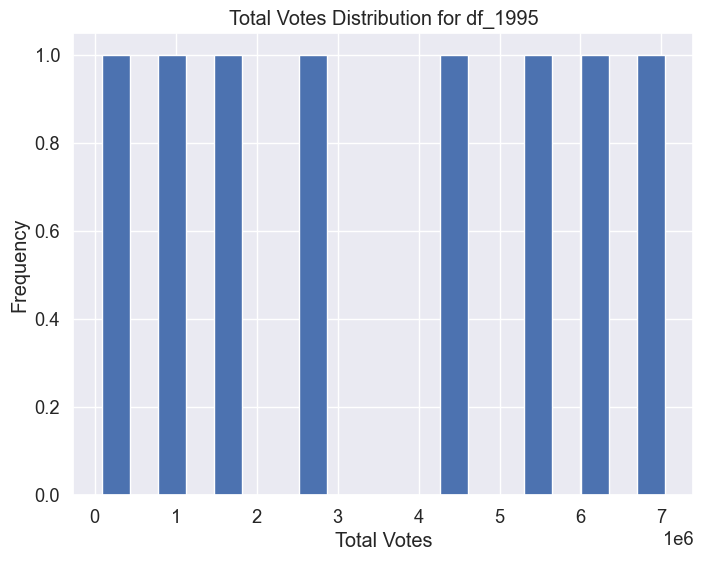

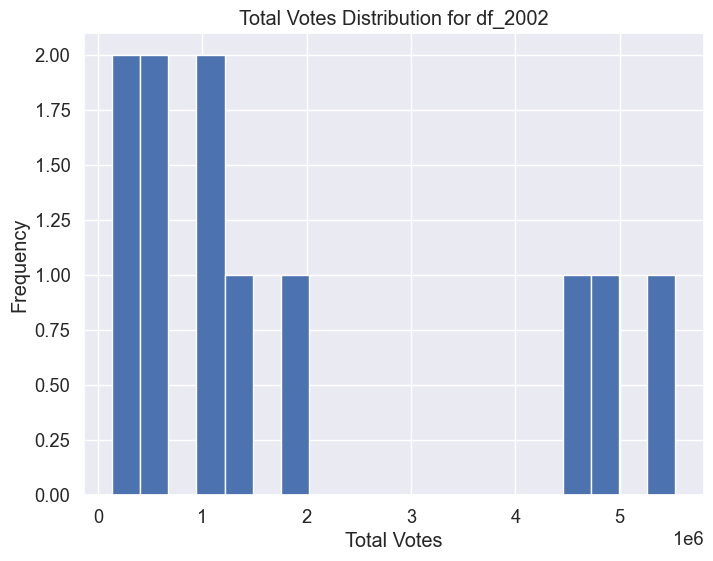

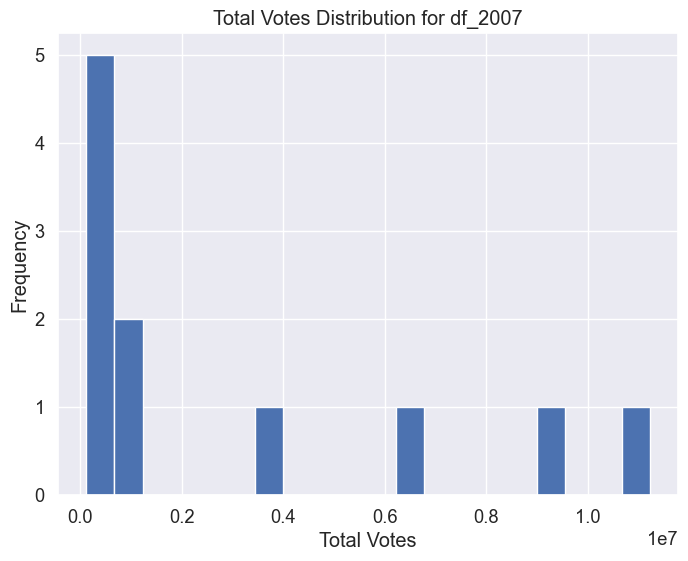

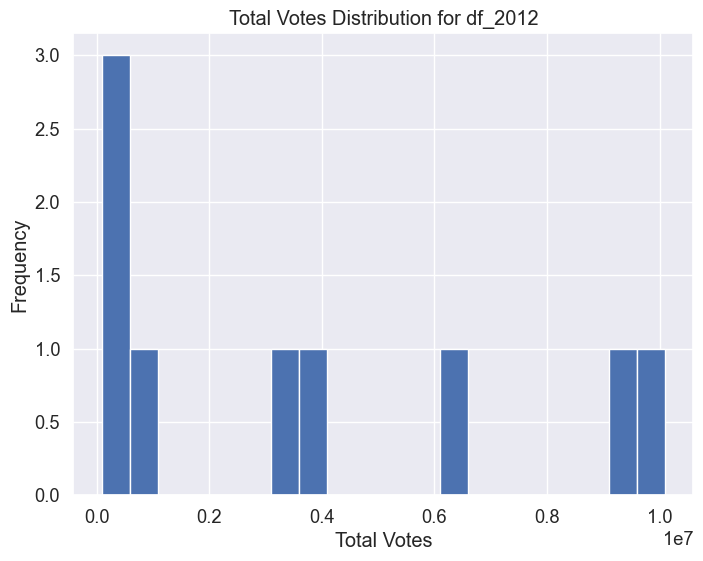

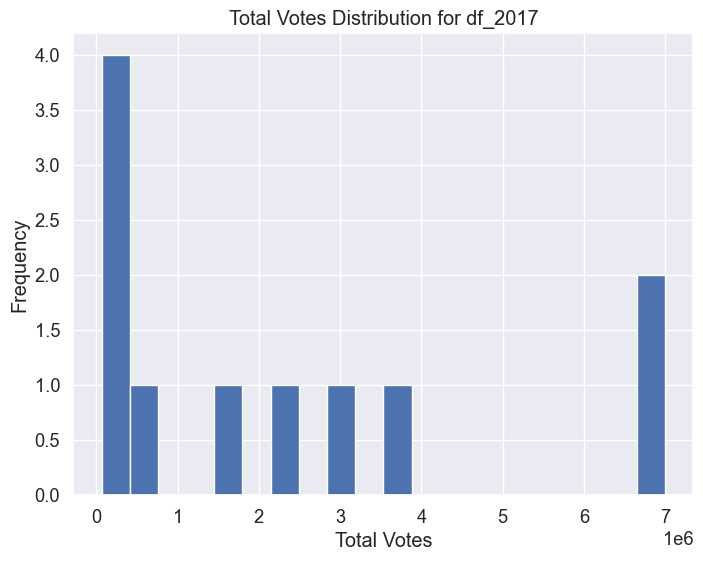

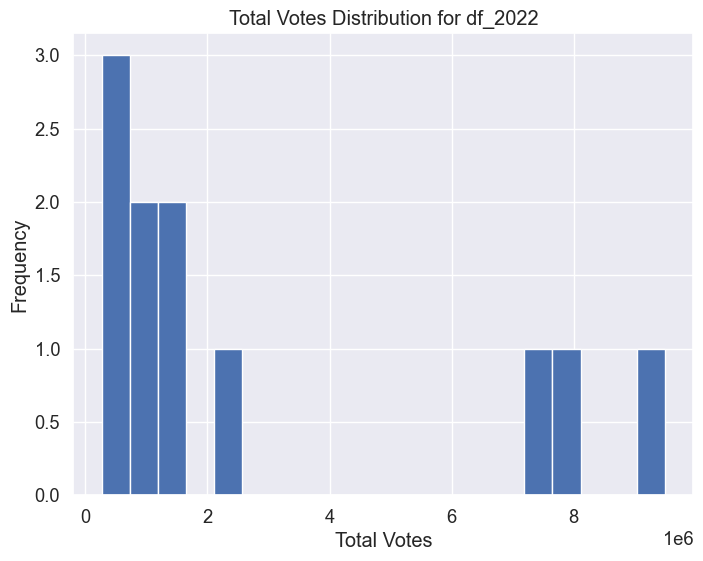

In [944]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Plotting the distribution of vote counts for each year
for df_name, df in dfs.items():
    plt.figure(figsize=(8, 6))
    plt.hist(df['Total Votes'], bins=20)
    plt.title(f"Total Votes Distribution for {df_name}")
    plt.xlabel("Total Votes")
    plt.ylabel("Frequency")
    plt.show()

# Data Visualization

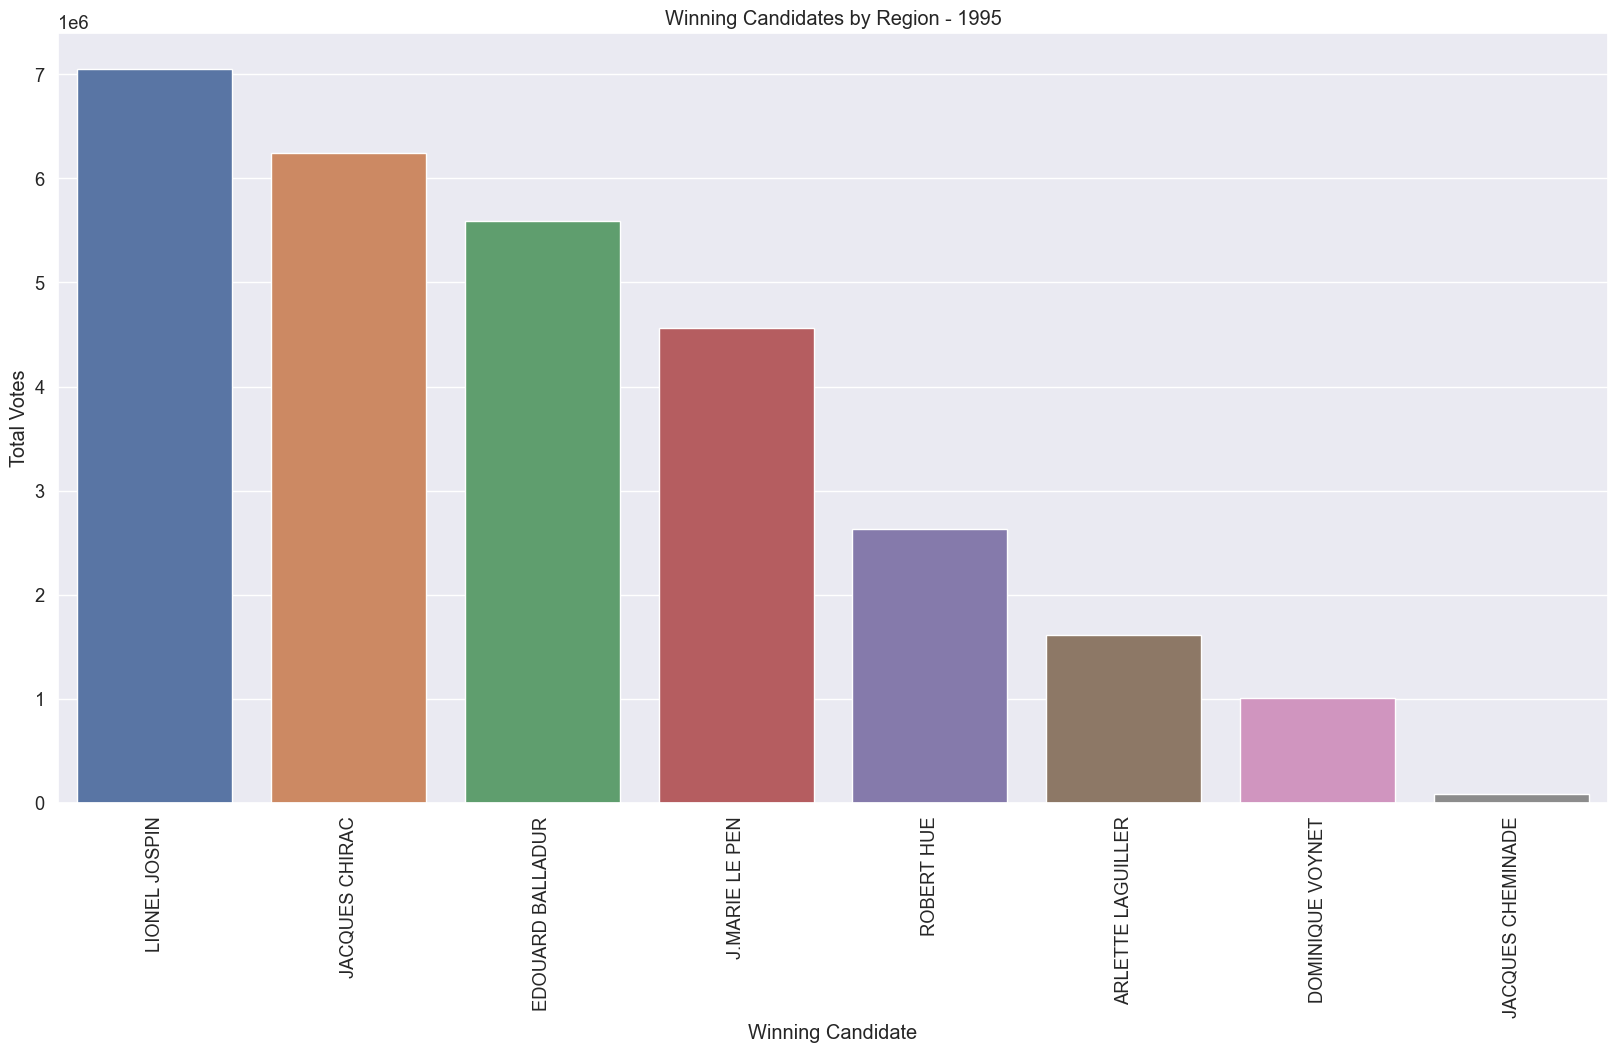

In [622]:
year = 1995
df = dfs[f'df_{year}']
plt.figure(figsize=(20, 10))
sns.barplot(x='Candidate', y='Total Votes', data=df)
plt.title(f"Winning Candidates by Region - {year}")
plt.xlabel("Winning Candidate")
plt.ylabel("Total Votes")
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()


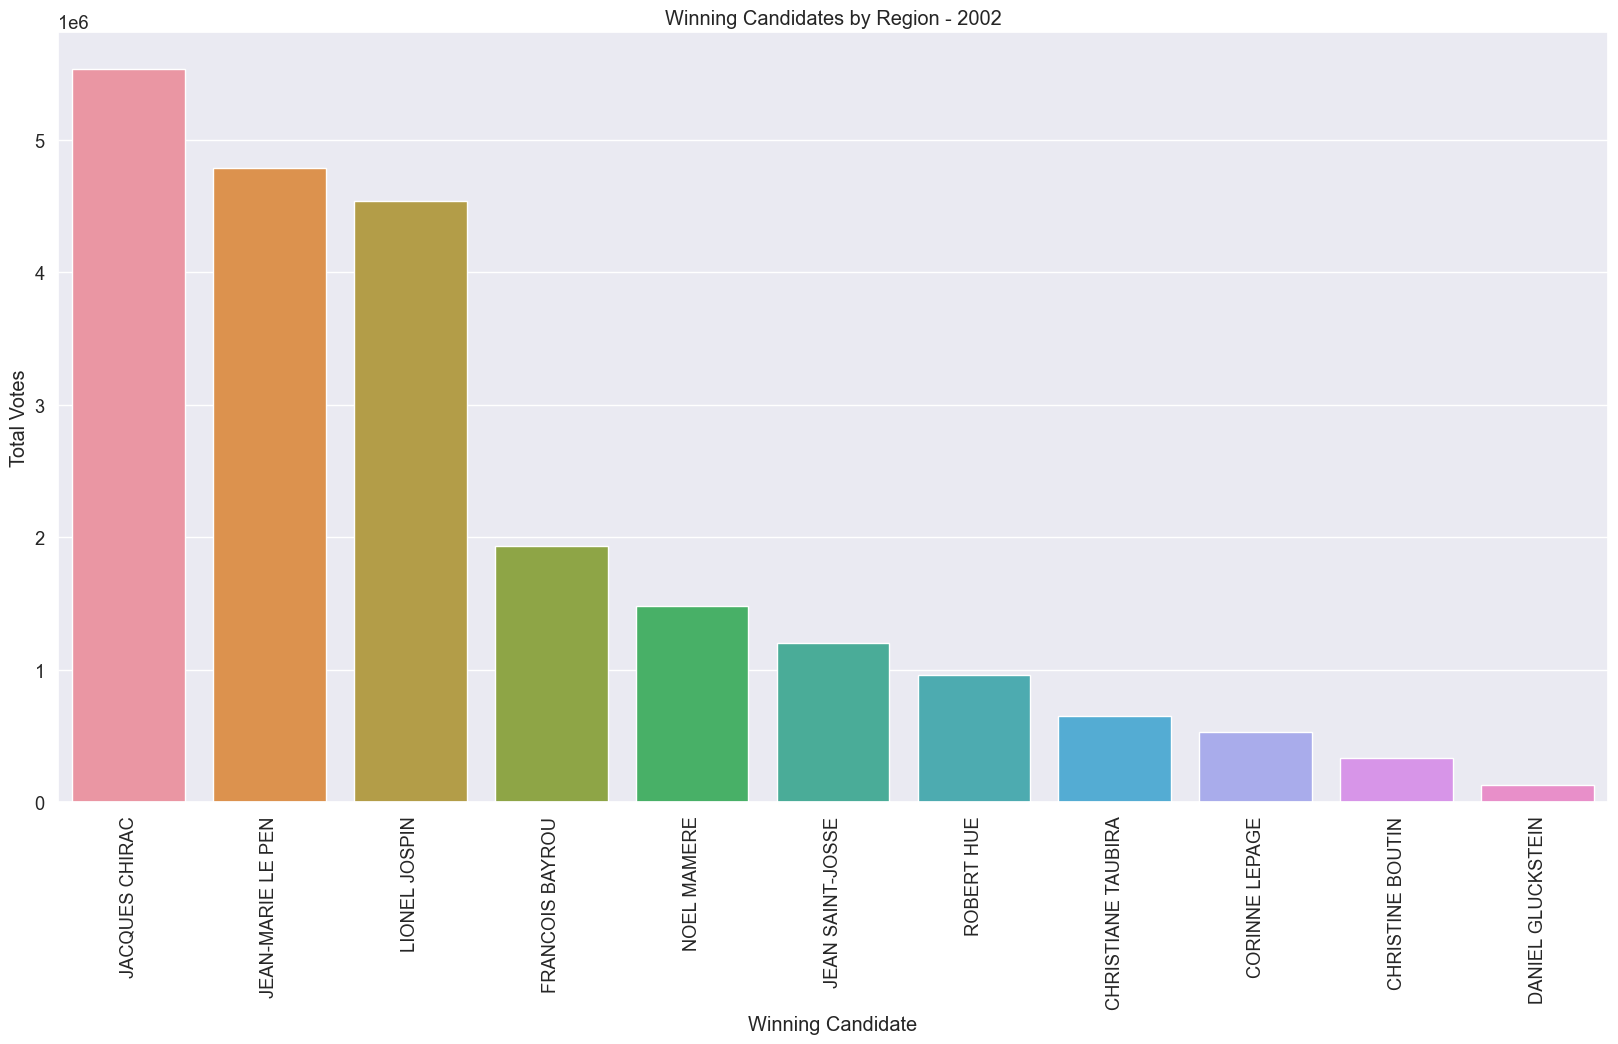

In [623]:
year = 2002
df = dfs[f'df_{year}']
plt.figure(figsize=(20, 10))
sns.barplot(x='Candidate', y='Total Votes', data=df)
plt.title(f"Winning Candidates by Region - {year}")
plt.xlabel("Winning Candidate")
plt.ylabel("Total Votes")
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()


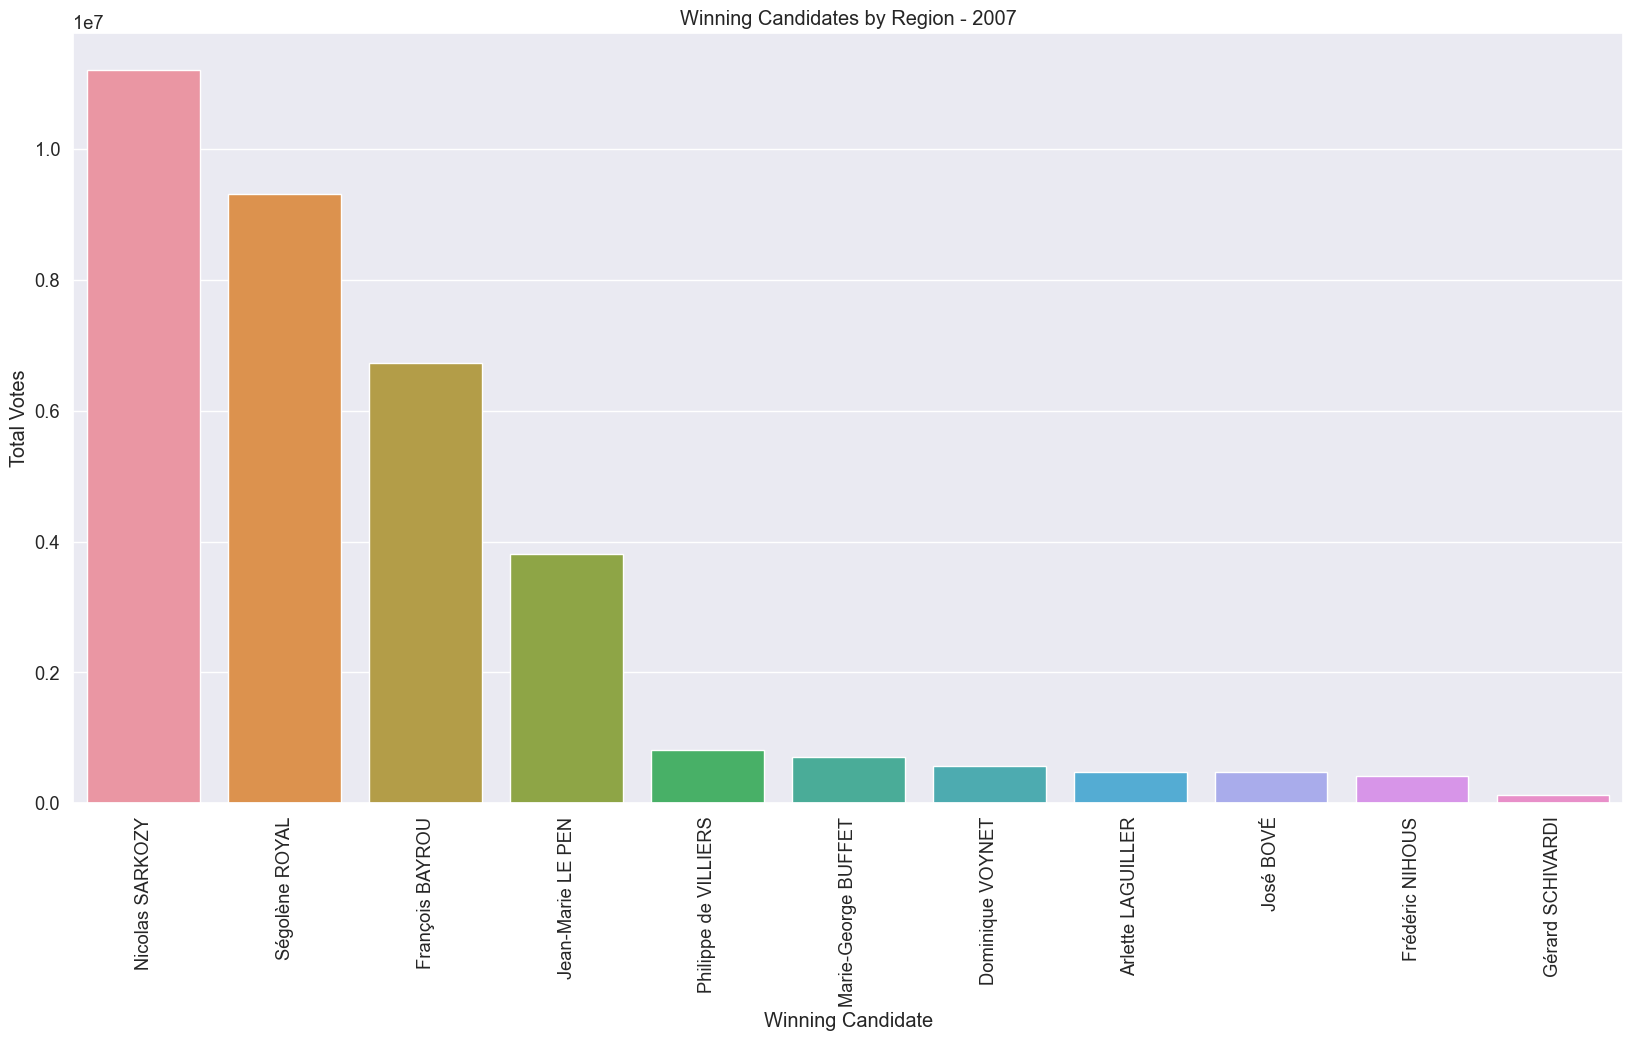

In [624]:
year = 2007
df = dfs[f'df_{year}']
plt.figure(figsize=(20, 10))
sns.barplot(x='Candidate', y='Total Votes', data=df)
plt.title(f"Winning Candidates by Region - {year}")
plt.xlabel("Winning Candidate")
plt.ylabel("Total Votes")
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

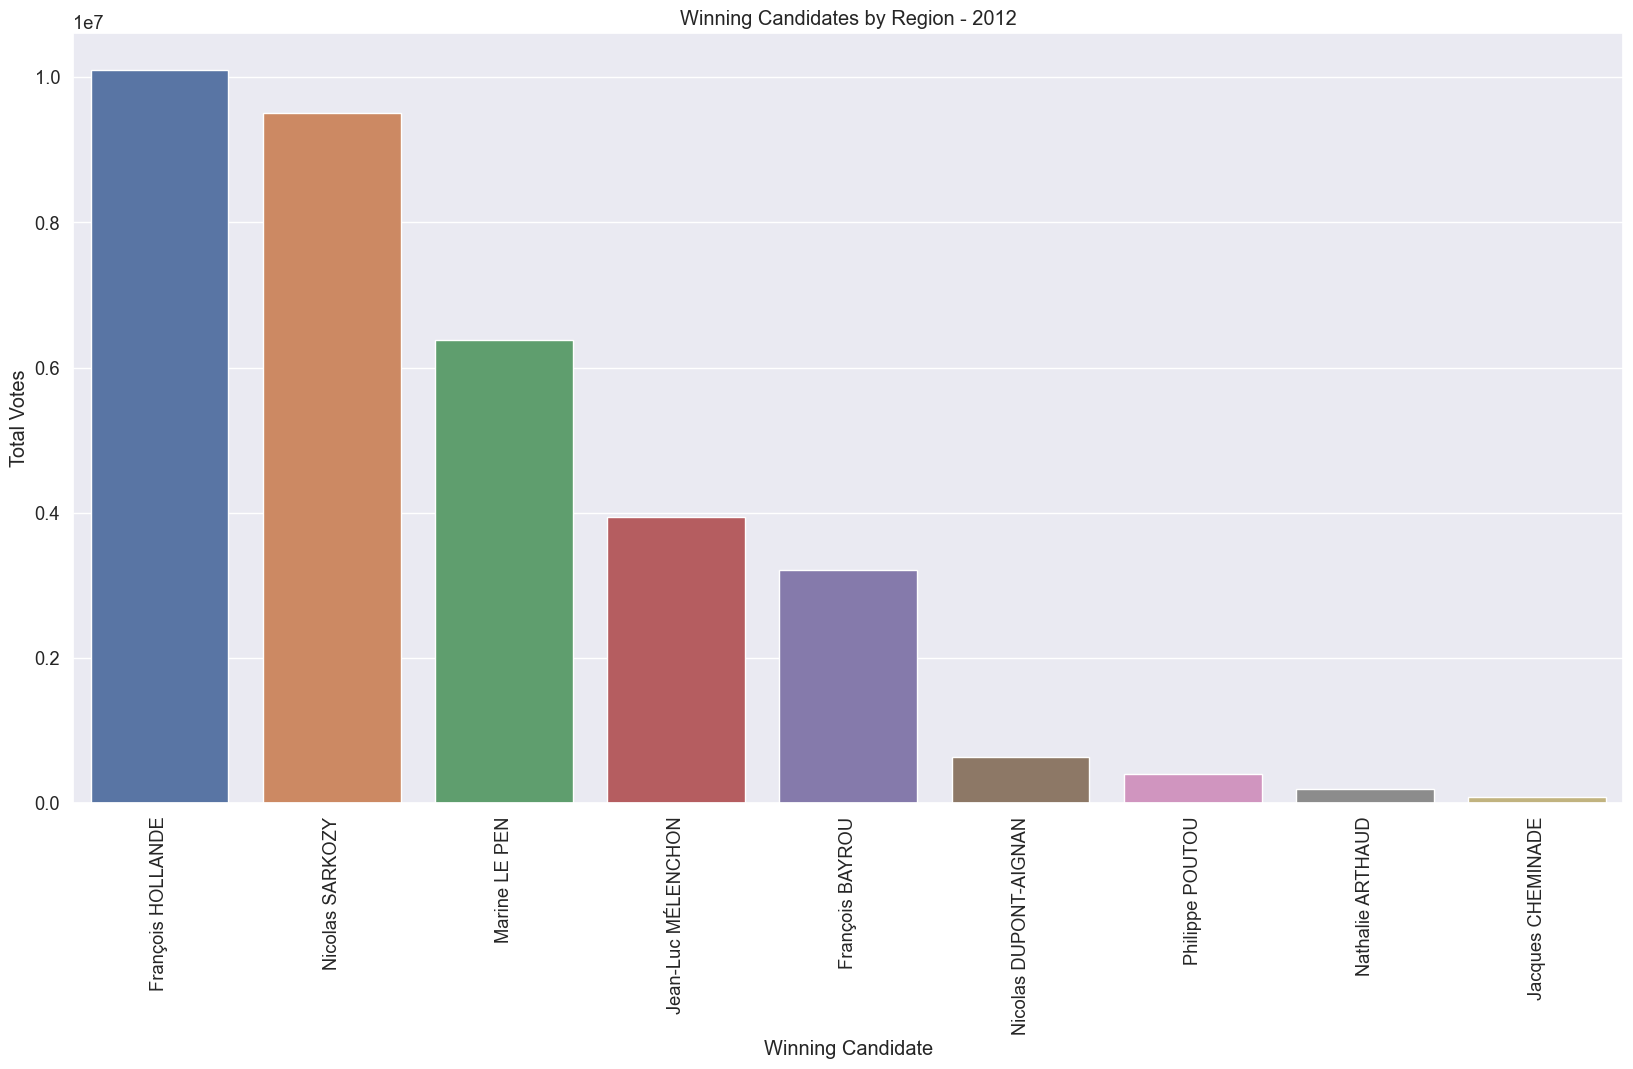

In [625]:
year = 2012
df = dfs[f'df_{year}']
plt.figure(figsize=(20, 10))
sns.barplot(x='Candidate', y='Total Votes', data=df)
plt.title(f"Winning Candidates by Region - {year}")
plt.xlabel("Winning Candidate")
plt.ylabel("Total Votes")
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

C:\Users\Hamna\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


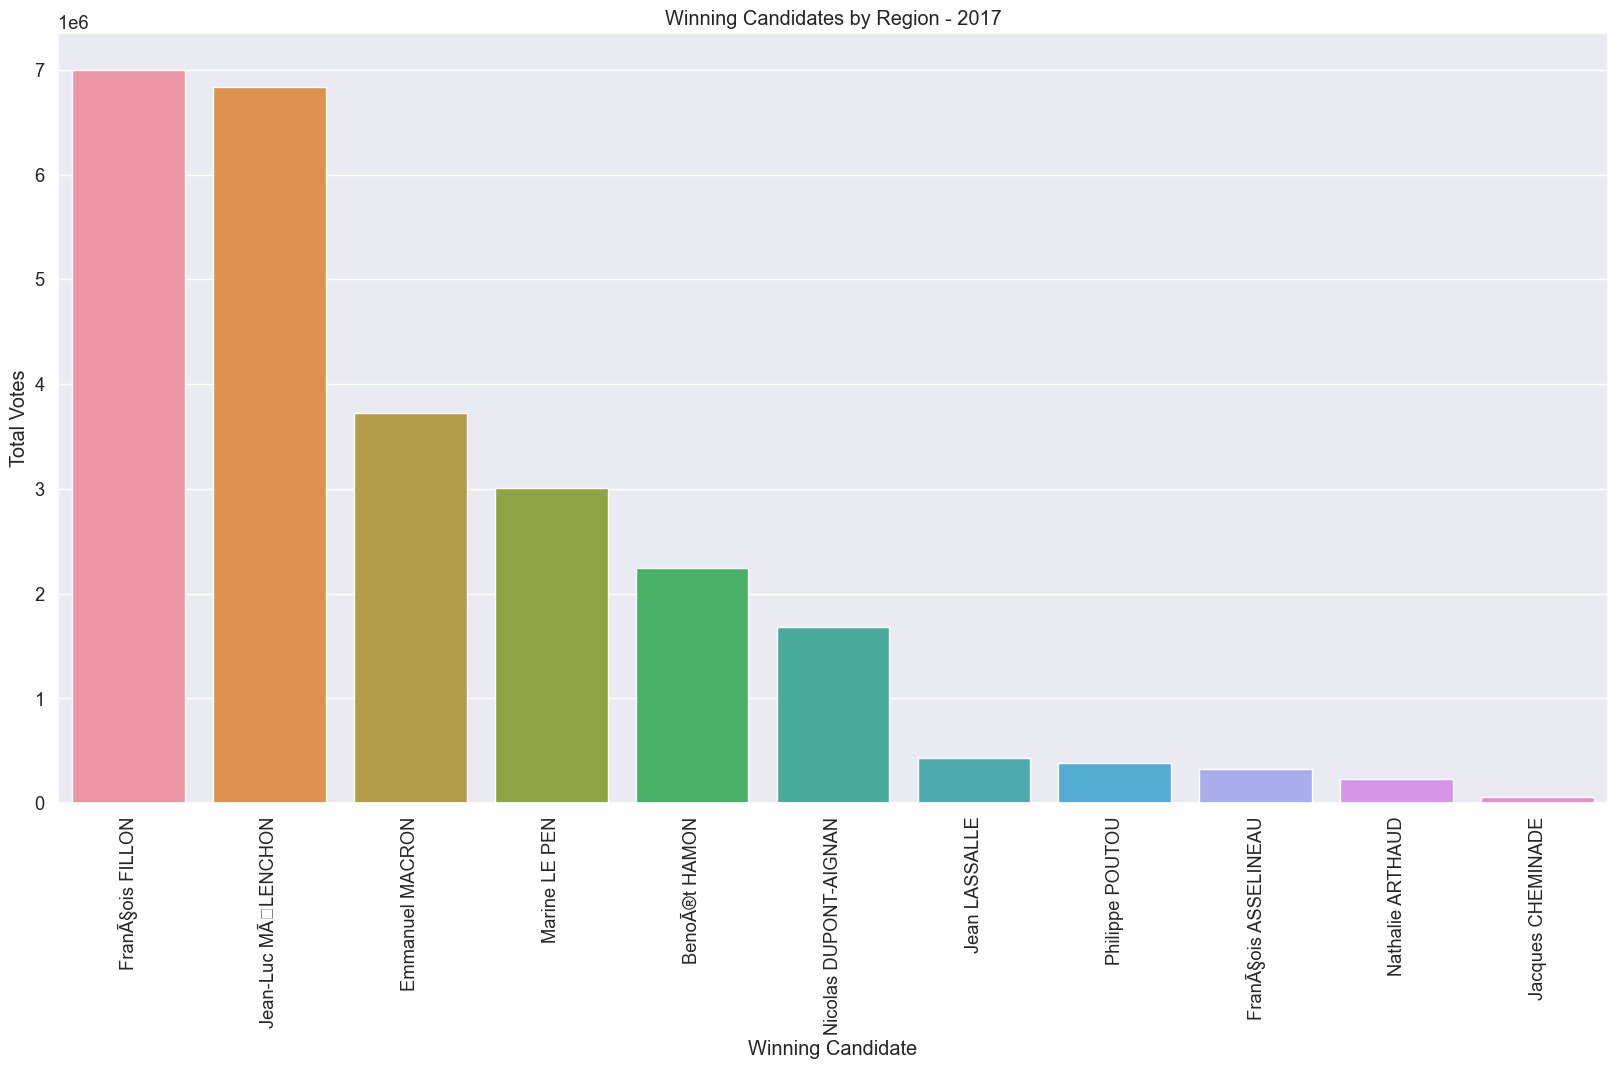

In [626]:
year = 2017
df = dfs[f'df_{year}']
plt.figure(figsize=(20, 10))
sns.barplot(x='Candidate', y='Total Votes', data=df)
plt.title(f"Winning Candidates by Region - {year}")
plt.xlabel("Winning Candidate")
plt.ylabel("Total Votes")
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()


C:\Users\Hamna\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


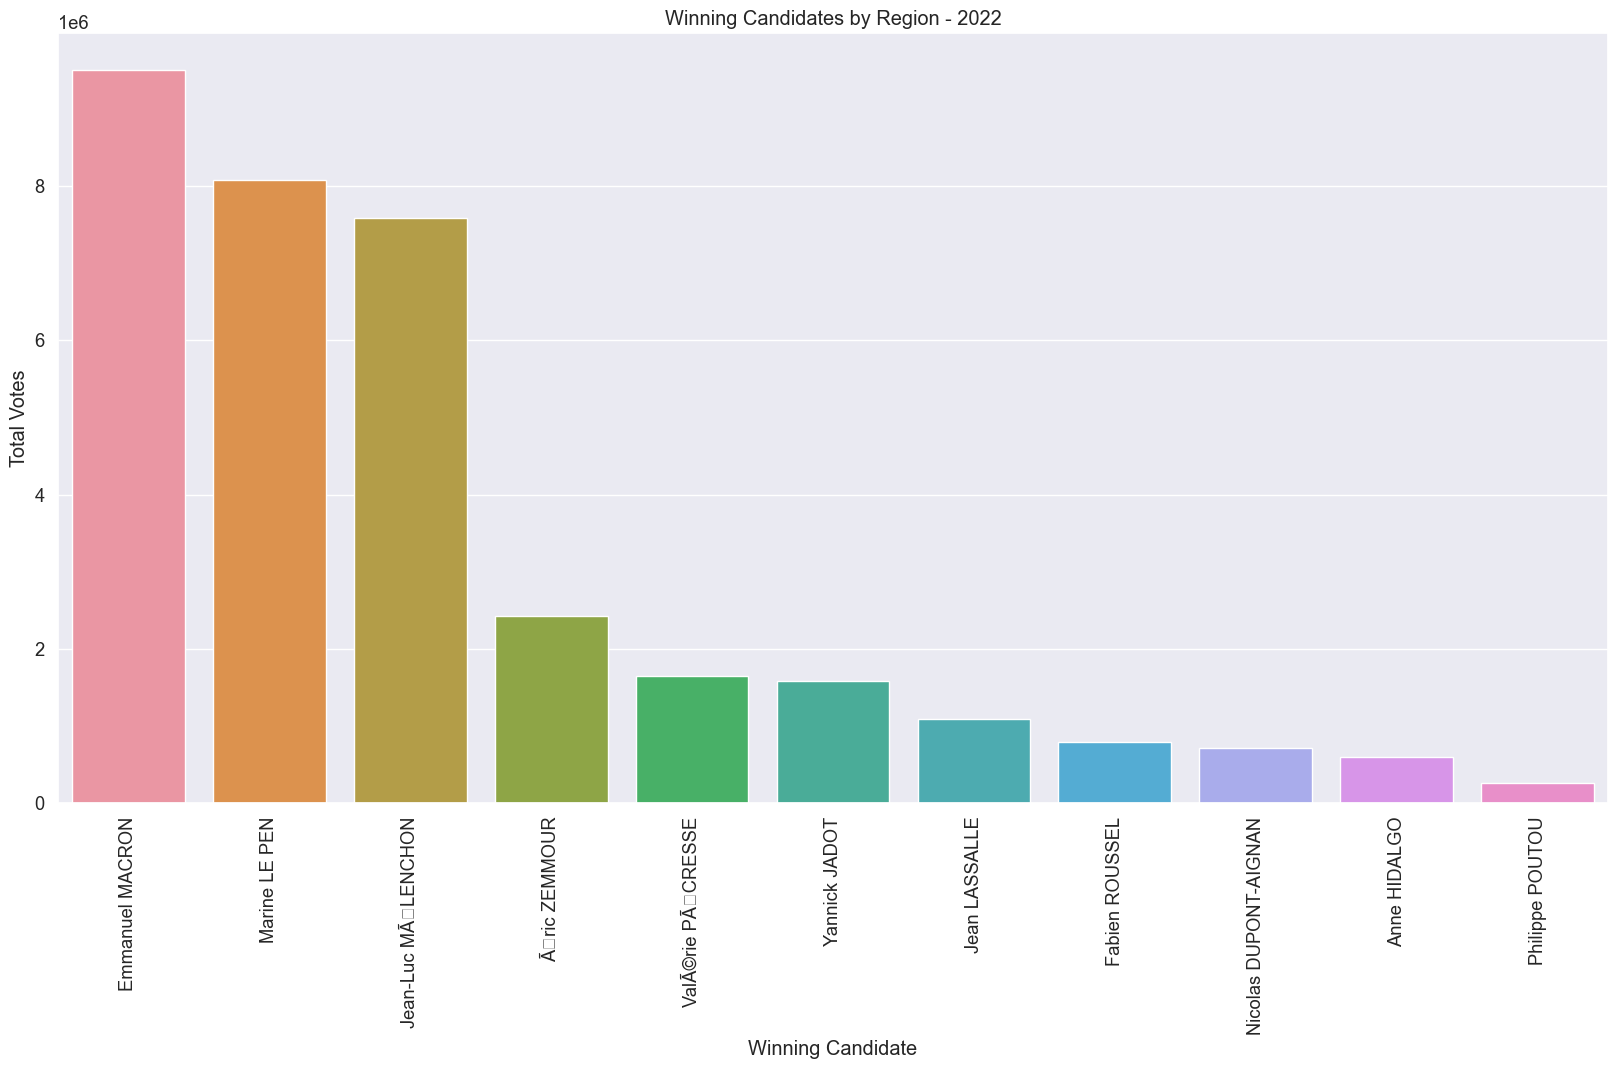

In [627]:
year = 2022
df = dfs[f'df_{year}']
plt.figure(figsize=(20, 10))
sns.barplot(x='Candidate', y='Total Votes', data=df)
plt.title(f"Winning Candidates by Region - {year}")
plt.xlabel("Winning Candidate")
plt.ylabel("Total Votes")
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

# Identifying Pattern and trend

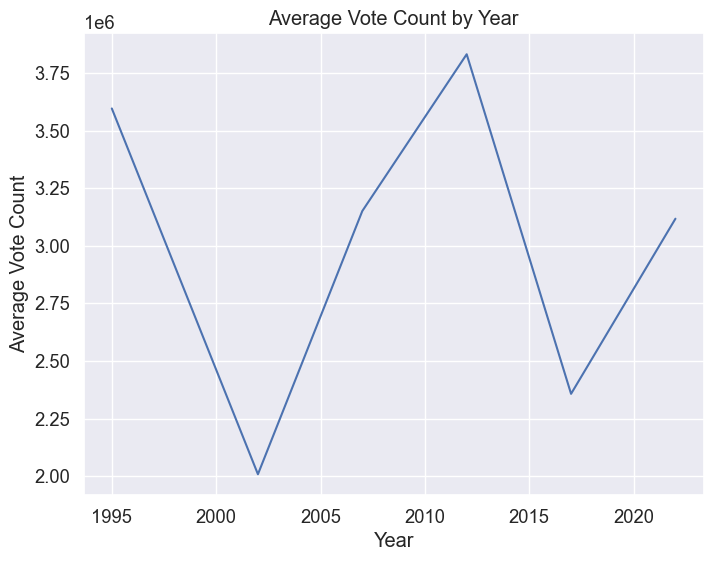

In [628]:
# Example: Calculating the average vote count by year
vote_count_by_year = {}
for df_name, df in dfs.items():
    year = int(df_name.split('_')[1])
    avg_vote_count = df['Total Votes'].mean()
    vote_count_by_year[year] = avg_vote_count

# Plotting the average vote count by year
years = list(vote_count_by_year.keys())
avg_vote_counts = list(vote_count_by_year.values())
plt.figure(figsize=(8, 6))
plt.plot(years, avg_vote_counts)
plt.title("Average Vote Count by Year")
plt.xlabel("Year")
plt.ylabel("Average Vote Count")
plt.show()

# Feature Engineering

In [147]:
# Example: Creating a new feature for winning candidate based on total votes or percentage
df['Winning_Candidate'] = df['Candidate']  # Create a new column to store winning candidate

# Calculate total votes for each candidate
candidate_total_votes = df.groupby('Candidate')['Total Votes'].sum()

# Find the candidate with the highest total votes
winning_candidate = candidate_total_votes.idxmax()

# Update the Winning_Candidate column with the winning candidate for each row
df['Winning_Candidate'] = df['Winning_Candidate'].apply(lambda x: winning_candidate if x == winning_candidate else None)

# Alternatively, you can calculate the percentage of votes for each candidate and use it to determine the winning candidate
df['Percentage_Votes'] = df['Total Votes'] / df['Total Votes'].sum() * 100  # Calculate percentage of votes
winning_candidate = df.loc[df['Percentage_Votes'].idxmax(), 'Candidate']  # Find the candidate with the highest percentage votes

# Update the Winning_Candidate column with the winning candidate for each row
df['Winning_Candidate'] = df['Winning_Candidate'].apply(lambda x: winning_candidate if x == winning_candidate else None)

In [630]:
# Check the output of the 'Winning_Candidate' column
winning_candidate = df['Winning_Candidate'].dropna().unique()[0]  # Assuming there is only one winning candidate
print(f"The winning candidate is: {winning_candidate}")

The winning candidate is: Emmanuel MACRON


# ---------------------------------------------------------------------------------------------------------------

# Machine Learning

# Model Selection

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

In [117]:
# Load all the DataFrames from the dictionary dfs into a list
dfs_list = [dfs[f'df_{year}'] for year in [1995, 2002, 2007, 2012, 2017, 2022]]

# Concatenate the DataFrames vertically into a single DataFrame
df = pd.concat(dfs_list, ignore_index=True)

In [118]:
df

Year              Candidate  Total Votes   
0   1995          LIONEL JOSPIN      7047109  \
1   1995         JACQUES CHIRAC      6242514   
2   1995       EDOUARD BALLADUR      5590607   
3   1995         J.MARIE LE PEN      4559921   
4   1995             ROBERT HUE      2630372   
..   ...                    ...          ...   
56  2022          Jean LASSALLE      1093388   
57  2022         Fabien ROUSSEL       798288   
58  2022  Nicolas DUPONT-AIGNAN       712771   
59  2022           Anne HIDALGO       601876   
60  2022        Philippe POUTOU       264587   

                                              Regions  Crime_Rate   
0   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...    231100.0  \
1   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...    231100.0   
2   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...    231100.0   
3   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...    231100.0   
4   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...    231100.0   
..                                                ...         ...   
56  Auvergne-RhÃ´ne-Alpes, Bourgogne-Franche-ComtÃ...         NaN   
57  Auvergne-RhÃ´ne-Alpes, Bourgogne-Franche-ComtÃ...         NaN   
58  Auvergne-RhÃ´ne-Alpes, Bourgogne-Franche-ComtÃ...         NaN   
59  Auvergne-RhÃ´ne-Alpes, Bourgogne-Franche-ComtÃ...         NaN   
60  Auvergne-RhÃ´ne-Alpes, Bourgogne-Franche-ComtÃ...         NaN   

   Percentage_crime  GDP Growth Rate Winning Candidate  Higher Votes   
0             4.29%           135625     LIONEL JOSPIN       7047109  \
1             4.29%           135625     LIONEL JOSPIN       7047109   
2             4.29%           135625     LIONEL JOSPIN       7047109   
3             4.29%           135625     LIONEL JOSPIN       7047109   
4             4.29%           135625     LIONEL JOSPIN       7047109   
..              ...              ...               ...           ...   
56              NaN           213459   Emmanuel MACRON       9500715   
57              NaN           213459   Emmanuel MACRON       9500715   
58              NaN           213459   Emmanuel MACRON       9500715   
59              NaN           213459   Emmanuel MACRON       9500715   
60              NaN           213459   Emmanuel MACRON       9500715   

          Winning_Region  
0                 ALSACE  
1                 ALSACE  
2                 ALSACE  
3                 ALSACE  
4                 ALSACE  
..                   ...  
56  Auvergne-Rhône-Alpes  
57  Auvergne-Rhône-Alpes  
58  Auvergne-Rhône-Alpes  
59  Auvergne-Rhône-Alpes  
60  Auvergne-Rhône-Alpes  

[61 rows x 10 columns]

In [123]:
# Perform feature engineering, if needed, to create relevant features
# For example, you can create a binary feature 'is_winner' based on the 'Winning_Candidate' column
df['is_winner'] = df['Candidate'] == df['Winning Candidate']

# Perform one-hot encoding for the 'Region' column
encoder = OneHotEncoder()
df_encoded = pd.DataFrame(encoder.fit_transform(df[['Regions']]).toarray(), columns=encoder.get_feature_names_out(input_features=['Regions']))
df = pd.concat([df, df_encoded], axis=1)
#df.drop(['Regions'], axis=1, inplace=True)

# Select features for your prediction task
# For example, you can select 'Year', one-hot encoded 'Region', 'is_winner' as your features
X = df[['Year', 'is_winner'] + list(df_encoded.columns)]
y = df['Winning Candidate']

In [124]:
df

Year              Candidate  Total Votes   
0   1995          LIONEL JOSPIN      7047109  \
1   1995         JACQUES CHIRAC      6242514   
2   1995       EDOUARD BALLADUR      5590607   
3   1995         J.MARIE LE PEN      4559921   
4   1995             ROBERT HUE      2630372   
..   ...                    ...          ...   
56  2022          Jean LASSALLE      1093388   
57  2022         Fabien ROUSSEL       798288   
58  2022  Nicolas DUPONT-AIGNAN       712771   
59  2022           Anne HIDALGO       601876   
60  2022        Philippe POUTOU       264587   

                                              Regions  Crime_Rate   
0   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...    231100.0  \
1   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...    231100.0   
2   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...    231100.0   
3   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...    231100.0   
4   ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, ...    231100.0   
..                                                ...         ...   
56  Auvergne-RhÃ´ne-Alpes, Bourgogne-Franche-ComtÃ...         NaN   
57  Auvergne-RhÃ´ne-Alpes, Bourgogne-Franche-ComtÃ...         NaN   
58  Auvergne-RhÃ´ne-Alpes, Bourgogne-Franche-ComtÃ...         NaN   
59  Auvergne-RhÃ´ne-Alpes, Bourgogne-Franche-ComtÃ...         NaN   
60  Auvergne-RhÃ´ne-Alpes, Bourgogne-Franche-ComtÃ...         NaN   

   Percentage_crime  GDP Growth Rate Winning Candidate  Higher Votes   
0             4.29%           135625     LIONEL JOSPIN       7047109  \
1             4.29%           135625     LIONEL JOSPIN       7047109   
2             4.29%           135625     LIONEL JOSPIN       7047109   
3             4.29%           135625     LIONEL JOSPIN       7047109   
4             4.29%           135625     LIONEL JOSPIN       7047109   
..              ...              ...               ...           ...   
56              NaN           213459   Emmanuel MACRON       9500715   
57              NaN           213459   Emmanuel MACRON       9500715   
58              NaN           213459   Emmanuel MACRON       9500715   
59              NaN           213459   Emmanuel MACRON       9500715   
60              NaN           213459   Emmanuel MACRON       9500715   

          Winning_Region  ...   
0                 ALSACE  ...  \
1                 ALSACE  ...   
2                 ALSACE  ...   
3                 ALSACE  ...   
4                 ALSACE  ...   
..                   ...  ...   
56  Auvergne-Rhône-Alpes  ...   
57  Auvergne-Rhône-Alpes  ...   
58  Auvergne-Rhône-Alpes  ...   
59  Auvergne-Rhône-Alpes  ...   
60  Auvergne-Rhône-Alpes  ...   

    Regions_Auvergne-RhÃ´ne-Alpes, Bourgogne-Franche-ComtÃ©, Bretagne, Centre-Val de Loire, Corse, Grand Est, Guadeloupe, Guyane, Hauts-de-France, La RÃ©union, Martinique, Mayotte, Normandie, Nouvelle-Aquitaine, Occitanie, Pays de la Loire, Provence-Alpes-CÃ´te d'Azur, Ãle-de-France   
0                                                 0.0                                                                                                                                                                                                                                         \
1                                                 0.0                                                                                                                                                                                                                                          
2                                                 0.0                                                                                                                                                                                                                                          
3                                                 0.0                                                                                                                                   

In [125]:
# Define a mapping of old feature names to new feature names
feature_mapping = {
    'Year': 'Year',
    'is_winner': 'is_winner',
    "ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, BOURGOGNE, BRETAGNE, CENTRE, CHAMPAGNE-ARDENNE, CORSE, FRANCHE-COMTE, GUADELOUPE, GUYANE, HAUTE NORMANDIE, ILE DE FRANCE, LA REUNION, LANGUEDOC-ROUSSILLON, LIMOUSIN, LORRAINE, MARTINIQUE, MIDI-PYRENEES, NORD-PAS DE CALAIS, PAYS DE LOIRE, PICARDIE, POITOU-CHARENTES, PROVENCE-ALPES-COTE D'AZUR, RHONE-ALPES": 'Regions',
    "ALSACE, AQUITAINE, AUVERGNE, BASSE-NORMANDIE, BOURGOGNE, BRETAGNE, CENTRE, CHAMPAGNE-ARDENNE, CORSE, FRANCHE-COMTE, GUADELOUPE, GUYANE, HAUTE-NORMANDIE, ILE-DE-FRANCE, LA REUNION, LANGUEDOC-ROUSSILLON, LIMOUSIN, LORRAINE, MARTINIQUE, MAYOTTE, MIDI-PYRENEES, NORD-PAS-DE-CALAIS, PAYS DE LA LOIRE, PICARDIE, POITOU-CHARENTES, PROVENCE-ALPES-COTE D'AZUR, RHONE-ALPES": 'Regions',
    "Regions_Auvergne et RhÃ´ne-Alpes, Bourgogne-Franche-ComtÃ©, Bretagne, Centre-Val de Loire, Corse, Grand Est, Guadeloupe, Guyane, Hauts-de-France, La RÃ©union, Martinique, Mayotte, Normandie, Nouvelle-Aquitaine, Occitanie, Pays de la Loire, Provence-Alpes-CÃ´te d'Azur, Ãle-de-France": 'Regions',
    "Regions_Auvergne et RhÃ´ne-Alpes, Bourgogne-Franche-ComtÃ©, Bretagne, Centre-Val de Loire, Corse, Grand Est, Guadeloupe, Guyane, Hauts-de-France, La RÃ©union, Martinique, Normandie, Nouvelle-Aquitaine, Occitanie, Pays de la Loire, Provence-Alpes-CÃ´te d'Azur, Ãle-de-France": 'Regions',
    "Regions_Auvergne et RhÃ´ne-Alpes, Bourgogne-Franche-ComtÃ©, Bretagne, Centre-Val de Loire, Corse, Grand Est, Guadeloupe, Hauts-de-France, Mayotte, Normandie, Nouvelle-Aquitaine, Occitanie, Pays de la Loire, Provence-Alpes-CÃ´te d'Azur, Ãle-de-France": 'Regions',
    "Regions_Auvergne et RhÃ´ne-Alpes, Bretagne, Guadeloupe, Guyane, La RÃ©union, Martinique, Mayotte, Nouvelle-Aquitaine, Pays de la Loire, Ãle-de-France": 'Regions',
    "Regions_Auvergne-RhÃ´ne-Alpes, Bourgogne-Franche-ComtÃ©, Bretagne, Centre-Val de Loire, Corse, Grand Est, Guadeloupe, Guyane, Hauts-de-France, La RÃ©union, Martinique, Mayotte, Normandie, Nouvelle-Aquitaine, Occitanie, Pays de la Loire, Provence-Alpes-CÃ´te d'Azur, Ãle-de-France": 'Regions',
    "Regions_Bourgogne-Franche-ComtÃ©, Centre-Val de Loire, Corse, Grand Est, Guyane, Hauts-de-France, La RÃ©union, Martinique, Mayotte, Normandie, Occitanie, Provence-Alpes-CÃ´te d'Azur": 'Regions'}

In [126]:
# Split the dataset into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
# Rename the features in X_train using the feature_mapping dictionary
X_train.rename(columns=feature_mapping, inplace=True)

# Check the updated feature names in X_train
print(X_train.columns)

Index(['Year', 'is_winner',
       'Regions_ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, BOURGOGNE, BRETAGNE, CENTRE, CHAMPAGNE-ARDENNE, CORSE, FRANCHE-COMTE, GUADELOUPE, GUYANE, HAUTE NORMANDIE, ILE DE FRANCE, LA REUNION, LANGUEDOC-ROUSSILLON, LIMOUSIN, LORRAINE, MARTINIQUE, MIDI-PYRENEES, NORD-PAS DE CALAIS, PAYS DE LOIRE, PICARDIE, POITOU-CHARENTES, PROVENCE-ALPES-COTE D'AZUR, RHONE-ALPES',
       'Regions_ALSACE, AQUITAINE, AUVERGNE, BASSE NORMANDIE, BOURGOGNE, BRETAGNE, CENTRE, CHAMPAGNE-ARDENNE, CORSE, FRANCHE-COMTE, GUADELOUPE, GUYANE, HAUTE NORMANDIE, ILE DE FRANCE, LA REUNION, LANGUEDOC-ROUSSILLON, LIMOUSIN, LORRAINE, MARTINIQUE, MIDI-PYRENEES, NORD-PAS DE CALAIS, PAYS DE LOIRE, PICARDIE, POITOU-CHARENTES, PROVENCE-ALPES-COTE D'AZUR, RHONE-ALPES',
       'Regions_ALSACE, AQUITAINE, AUVERGNE, BASSE-NORMANDIE, BOURGOGNE, BRETAGNE, CENTRE, CHAMPAGNE-ARDENNE, CORSE, FRANCHE-COMTE, GUADELOUPE, GUYANE, HAUTE-NORMANDIE, ILE-DE-FRANCE, LA REUNION, LANGUEDOC-ROUSSILLON, LIMOUSIN, LORR

In [128]:
# Choose a machine learning algorithm
# here use logistic regression as your model
model = LogisticRegression()

In [129]:
# Train the model using the training data
model.fit(X_train, y_train)

LogisticRegression()

In [130]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

C:\Users\Hamna\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Regions_Auvergne et RhÃ´ne-Alpes, Bourgogne-Franche-ComtÃ©, Bretagne, Centre-Val de Loire, Corse, Grand Est, Guadeloupe, Guyane, Hauts-de-France, La RÃ©union, Martinique, Mayotte, Normandie, Nouvelle-Aquitaine, Occitanie, Pays de la Loire, Provence-Alpes-CÃ´te d'Azur, Ãle-de-France
- Regions_Auvergne et RhÃ´ne-Alpes, Bourgogne-Franche-ComtÃ©, Bretagne, Centre-Val de Loire, Corse, Grand Est, Guadeloupe, Guyane, Hauts-de-France, La RÃ©union, Martinique, Normandie, Nouvelle-Aquitaine, Occitanie, Pays de la Loire, Provence-Alpes-CÃ´te d'Azur, Ãle-de-France
- Regions_Auvergne et RhÃ´ne-Alpes, Bourgogne-Franche-ComtÃ©, Bretagne, Centre-Val de Loire, Corse, Grand Est, Guadeloupe, Hauts-de-France, Mayotte, Normandie, Nouvelle-Aquitaine, Occitanie, Pays de la Loire, Pr

In [783]:
# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.62


# Model Prediction

In [131]:
# Add the column back to the DataFrame
df['Regions'] = 'Auvergne-Rhône-Alpes', 'Bourgogne-Franche-Comté', 'Bretagne', 'Centre-Val de Loire', 'Corse', 'Grand Est', 'Guadeloupe', 'Guyane', 'Hauts-de-France', 'La Réunion', 'Martinique', 'Mayotte', 'Normandie', 'Nouvelle-Aquitaine', 'Occitanie', 'Pays de la Loire', 'Provence-Alpes-Côte d\'Azur', 'Île-de-France', 'Auvergne et Rhône-Alpes', 'Bourgogne-Franche-Comté', 'Bretagne', 'Centre-Val de Loire', 'Corse', 'Grand Est', 'Guadeloupe', 'Guyane', 'Hauts-de-France', 'La Réunion', 'Martinique', 'Normandie', 'Nouvelle-Aquitaine', 'Occitanie', 'Pays de la Loire', 'Provence-Alpes-Côte d\'Azur', 'Île-de-France','Auvergne-Rhône-Alpes', 'Bourgogne-Franche-Comté', 'Bretagne', 'Centre-Val de Loire', 'Corse', 'Grand Est', 'Guadeloupe', 'Guyane', 'Hauts-de-France', 'La Réunion', 'Martinique', 'Mayotte', 'Normandie', 'Nouvelle-Aquitaine', 'Occitanie', 'Pays de la Loire','Provence-Alpes-Côte d\'Azur', 'Île-de-France', 'Auvergne et RhÃ´ne-Alpes', 'Bretagne', 'Guadeloupe', 'Guyane', 'Martinique', 'Mayotte', 'Nouvelle-Aquitaine', 'Pays de la Loire' 

In [132]:
df

Year              Candidate  Total Votes                  Regions   
0   1995          LIONEL JOSPIN      7047109     Auvergne-Rhône-Alpes  \
1   1995         JACQUES CHIRAC      6242514  Bourgogne-Franche-Comté   
2   1995       EDOUARD BALLADUR      5590607                 Bretagne   
3   1995         J.MARIE LE PEN      4559921      Centre-Val de Loire   
4   1995             ROBERT HUE      2630372                    Corse   
..   ...                    ...          ...                      ...   
56  2022          Jean LASSALLE      1093388                   Guyane   
57  2022         Fabien ROUSSEL       798288               Martinique   
58  2022  Nicolas DUPONT-AIGNAN       712771                  Mayotte   
59  2022           Anne HIDALGO       601876       Nouvelle-Aquitaine   
60  2022        Philippe POUTOU       264587         Pays de la Loire   

    Crime_Rate Percentage_crime  GDP Growth Rate Winning Candidate   
0     231100.0            4.29%           135625     LIONEL JOSPIN  \
1     231100.0            4.29%           135625     LIONEL JOSPIN   
2     231100.0            4.29%           135625     LIONEL JOSPIN   
3     231100.0            4.29%           135625     LIONEL JOSPIN   
4     231100.0            4.29%           135625     LIONEL JOSPIN   
..         ...              ...              ...               ...   
56         NaN              NaN           213459   Emmanuel MACRON   
57         NaN              NaN           213459   Emmanuel MACRON   
58         NaN              NaN           213459   Emmanuel MACRON   
59         NaN              NaN           213459   Emmanuel MACRON   
60         NaN              NaN           213459   Emmanuel MACRON   

    Higher Votes        Winning_Region  ...   
0        7047109                ALSACE  ...  \
1        7047109                ALSACE  ...   
2        7047109                ALSACE  ...   
3        7047109                ALSACE  ...   
4        7047109                ALSACE  ...   
..           ...                   ...  ...   
56       9500715  Auvergne-Rhône-Alpes  ...   
57       9500715  Auvergne-Rhône-Alpes  ...   
58       9500715  Auvergne-Rhône-Alpes  ...   
59       9500715  Auvergne-Rhône-Alpes  ...   
60       9500715  Auvergne-Rhône-Alpes  ...   

    Regions_Auvergne-RhÃ´ne-Alpes, Bourgogne-Franche-ComtÃ©, Bretagne, Centre-Val de Loire, Corse, Grand Est, Guadeloupe, Guyane, Hauts-de-France, La RÃ©union, Martinique, Mayotte, Normandie, Nouvelle-Aquitaine, Occitanie, Pays de la Loire, Provence-Alpes-CÃ´te d'Azur, Ãle-de-France   
0                                                 0.0                                                                                                                                                                                                                                         \
1                                                 0.0                                                                                                                                                                                                                                          
2                                                 0.0                                                                                                                                                                                                                                          
3                                                 0.0                                                                                                                                                                                                                                          
4                                                 0.0                                                                                                                                                                                                                                    

# Now Predicting statistics outcome of France presidential election for next 3 Years

In [133]:
# Create a new column 'winner'
# For example, you can create a binary feature 'is_winner' based on the 'Winning_Candidate' column
df['is_winner'] = df['Candidate'] == df['Winning Candidate']

# Print the first few rows of the updated dataset
df

Year              Candidate  Total Votes                  Regions   
0   1995          LIONEL JOSPIN      7047109     Auvergne-Rhône-Alpes  \
1   1995         JACQUES CHIRAC      6242514  Bourgogne-Franche-Comté   
2   1995       EDOUARD BALLADUR      5590607                 Bretagne   
3   1995         J.MARIE LE PEN      4559921      Centre-Val de Loire   
4   1995             ROBERT HUE      2630372                    Corse   
..   ...                    ...          ...                      ...   
56  2022          Jean LASSALLE      1093388                   Guyane   
57  2022         Fabien ROUSSEL       798288               Martinique   
58  2022  Nicolas DUPONT-AIGNAN       712771                  Mayotte   
59  2022           Anne HIDALGO       601876       Nouvelle-Aquitaine   
60  2022        Philippe POUTOU       264587         Pays de la Loire   

    Crime_Rate Percentage_crime  GDP Growth Rate Winning Candidate   
0     231100.0            4.29%           135625     LIONEL JOSPIN  \
1     231100.0            4.29%           135625     LIONEL JOSPIN   
2     231100.0            4.29%           135625     LIONEL JOSPIN   
3     231100.0            4.29%           135625     LIONEL JOSPIN   
4     231100.0            4.29%           135625     LIONEL JOSPIN   
..         ...              ...              ...               ...   
56         NaN              NaN           213459   Emmanuel MACRON   
57         NaN              NaN           213459   Emmanuel MACRON   
58         NaN              NaN           213459   Emmanuel MACRON   
59         NaN              NaN           213459   Emmanuel MACRON   
60         NaN              NaN           213459   Emmanuel MACRON   

    Higher Votes        Winning_Region  ...   
0        7047109                ALSACE  ...  \
1        7047109                ALSACE  ...   
2        7047109                ALSACE  ...   
3        7047109                ALSACE  ...   
4        7047109                ALSACE  ...   
..           ...                   ...  ...   
56       9500715  Auvergne-Rhône-Alpes  ...   
57       9500715  Auvergne-Rhône-Alpes  ...   
58       9500715  Auvergne-Rhône-Alpes  ...   
59       9500715  Auvergne-Rhône-Alpes  ...   
60       9500715  Auvergne-Rhône-Alpes  ...   

    Regions_Auvergne-RhÃ´ne-Alpes, Bourgogne-Franche-ComtÃ©, Bretagne, Centre-Val de Loire, Corse, Grand Est, Guadeloupe, Guyane, Hauts-de-France, La RÃ©union, Martinique, Mayotte, Normandie, Nouvelle-Aquitaine, Occitanie, Pays de la Loire, Provence-Alpes-CÃ´te d'Azur, Ãle-de-France   
0                                                 0.0                                                                                                                                                                                                                                         \
1                                                 0.0                                                                                                                                                                                                                                          
2                                                 0.0                                                                                                                                                                                                                                          
3                                                 0.0                                                                                                                                                                                                                                          
4                                                 0.0                                                                                                                                                                                                                                    

In [134]:
# For example, you can create a binary feature 'is_winner' based on the 'Winning_Candidate' column
df['is_winner'] = df['Candidate'] == df['Winning Candidate']

# Convert True/False values to 1/0
df['is_winner'] = df['is_winner'].astype(int)

# Select the features and target variable
X = df[['Year', 'GDP Growth Rate', 'Higher Votes']]
y = df['is_winner']

In [135]:
# Machine learning model: Linear Regression

In [136]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Select the features and target variable
X = df[['Year', 'GDP Growth Rate', 'Higher Votes']]
y = df['is_winner']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the linear regression model
lr = LinearRegression()

# Train the model using the training data
lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test)

# Evaluate the performance of the model using MSE and RMSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('MSE:', mse)
print('RMSE:', rmse)

MSE: 0.0834928373254327
RMSE: 0.28895127154147066


# Logistic Regression

In [137]:
# Import the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

 Convert the target variable into binary values indicating whether a particular candidate won or lost. For example, I create a new binary column in the dataframe called is_winner, where 1 indicates that cand1 won and 0 indicates that cand2 won

In [138]:
# Select the features and target variable
X = df[['Year', 'GDP Growth Rate', 'Higher Votes']]
y = df['is_winner']

In [214]:
y_pred

array([0.04140599, 0.04140599, 0.157849  , 0.12062979, 0.08433756,
       0.11191052, 0.12062979, 0.157849  , 0.08433756, 0.157849  ,
       0.12062979, 0.11191052, 0.08433756])

In [139]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = model.predict(X_test)

# Ensure that y_test and y_pred have the same number of samples
y_test = y_test[:len(y_pred)] # Slice y_test to match the length of y_pred

In [140]:
from sklearn.metrics import mean_squared_error

# Predict the target variable on the test data
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 0.0834928373254327


In [141]:
# Create a logistic regression object and fit the model on the train set
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

# Prediction test data

In [142]:
# Make predictions using the trained model
new_predictions = lr.predict(df[['Year', 'GDP Growth Rate', 'Higher Votes']])

# Print the predicted winners
print(new_predictions)

[0.04140599 0.04140599 0.04140599 0.04140599 0.04140599 0.04140599
 0.04140599 0.04140599 0.08433756 0.08433756 0.08433756 0.08433756
 0.08433756 0.08433756 0.08433756 0.08433756 0.08433756 0.08433756
 0.08433756 0.09846346 0.09846346 0.09846346 0.09846346 0.09846346
 0.09846346 0.09846346 0.09846346 0.09846346 0.09846346 0.09846346
 0.12062979 0.12062979 0.12062979 0.12062979 0.12062979 0.12062979
 0.12062979 0.12062979 0.12062979 0.157849   0.157849   0.157849
 0.157849   0.157849   0.157849   0.157849   0.157849   0.157849
 0.157849   0.157849   0.11191052 0.11191052 0.11191052 0.11191052
 0.11191052 0.11191052 0.11191052 0.11191052 0.11191052 0.11191052
 0.11191052]


In [143]:
# Create a new column in the original dataset for the predicted winners
df['predicted_winner'] = lr.predict(df[['Year', 'GDP Growth Rate', 'Higher Votes']])

# Print the original dataset with the predicted winners column
df

Year              Candidate  Total Votes                  Regions   
0   1995          LIONEL JOSPIN      7047109     Auvergne-Rhône-Alpes  \
1   1995         JACQUES CHIRAC      6242514  Bourgogne-Franche-Comté   
2   1995       EDOUARD BALLADUR      5590607                 Bretagne   
3   1995         J.MARIE LE PEN      4559921      Centre-Val de Loire   
4   1995             ROBERT HUE      2630372                    Corse   
..   ...                    ...          ...                      ...   
56  2022          Jean LASSALLE      1093388                   Guyane   
57  2022         Fabien ROUSSEL       798288               Martinique   
58  2022  Nicolas DUPONT-AIGNAN       712771                  Mayotte   
59  2022           Anne HIDALGO       601876       Nouvelle-Aquitaine   
60  2022        Philippe POUTOU       264587         Pays de la Loire   

    Crime_Rate Percentage_crime  GDP Growth Rate Winning Candidate   
0     231100.0            4.29%           135625     LIONEL JOSPIN  \
1     231100.0            4.29%           135625     LIONEL JOSPIN   
2     231100.0            4.29%           135625     LIONEL JOSPIN   
3     231100.0            4.29%           135625     LIONEL JOSPIN   
4     231100.0            4.29%           135625     LIONEL JOSPIN   
..         ...              ...              ...               ...   
56         NaN              NaN           213459   Emmanuel MACRON   
57         NaN              NaN           213459   Emmanuel MACRON   
58         NaN              NaN           213459   Emmanuel MACRON   
59         NaN              NaN           213459   Emmanuel MACRON   
60         NaN              NaN           213459   Emmanuel MACRON   

    Higher Votes        Winning_Region  ...   
0        7047109                ALSACE  ...  \
1        7047109                ALSACE  ...   
2        7047109                ALSACE  ...   
3        7047109                ALSACE  ...   
4        7047109                ALSACE  ...   
..           ...                   ...  ...   
56       9500715  Auvergne-Rhône-Alpes  ...   
57       9500715  Auvergne-Rhône-Alpes  ...   
58       9500715  Auvergne-Rhône-Alpes  ...   
59       9500715  Auvergne-Rhône-Alpes  ...   
60       9500715  Auvergne-Rhône-Alpes  ...   

    Regions_Bourgogne-Franche-ComtÃ©, Centre-Val de Loire, Corse, Grand Est, Guyane, Hauts-de-France, La RÃ©union, Martinique, Mayotte, Normandie, Occitanie, Provence-Alpes-CÃ´te d'Azur   
0                                                 0.0                                                                                                                                      \
1                                                 0.0                                                                                                                                       
2                                                 0.0                                                                                                                                       
3                                                 0.0                                                                                                                                       
4                                                 0.0                                                                                                                                       
..                                                ...                                                                                                                                       
56                                                0.0                                                                                                                                       
57                                                0.0                                                                                                                                       
58                  

# Now select Top three candidates on basis of predicted_winner for future

In [144]:
# Sort the dataset in descending order based on the predicted_winner column
df_sorted = df.sort_values(by=['predicted_winner'], ascending=False)

# Select the top three candidates
top_three = df_sorted['Candidate'].head(3).tolist()

# Print the top three predicted winners
print("Top Three Predicted Winners:", top_three)

Top Three Predicted Winners: ['Philippe POUTOU', 'Jean-Luc MÃ\x89LENCHON', 'BenoÃ®t HAMON']


In [148]:
years = [2027, 2032, 2037]
winning_candidates = ['Philippe POUTOU', 'Jean-Luc MÃ\x89LENCHON', 'BenoÃ®t HAMON']
regions = [['Auvergne-Rhône-Alpes', 'Bourgogne-Franche-Comté', 'Bretagne', 'Centre-Val de Loire', 'Corse', 'Grand Est', 'Guadeloupe', 'Guyane', 'Hauts-de-France', 'La Réunion', 'Martinique', 'Mayotte', 'Normandie', 'Nouvelle-Aquitaine', 'Occitanie', 'Pays de la Loire', 'Provence-Alpes-Côte d\'Azur', 'Île-de-France'], 
           ['Auvergne et Rhône-Alpes', 'Bourgogne-Franche-Comté', 'Bretagne', 'Centre-Val de Loire', 'Corse', 'Grand Est', 'Guadeloupe', 'Guyane', 'Hauts-de-France', 'La Réunion', 'Martinique', 'Mayotte', 'Normandie', 'Nouvelle-Aquitaine', 'Occitanie', 'Pays de la Loire', 'Provence-Alpes-Côte d\'Azur', 'Île-de-France'], 
           ['Auvergne-Rhône-Alpes', 'Bourgogne-Franche-Comté', 'Bretagne', 'Centre-Val de Loire', 'Corse', 'Grand Est', 'Guadeloupe', 'Guyane', 'Hauts-de-France', 'La Réunion', 'Martinique', 'Mayotte', 'Normandie', 'Nouvelle-Aquitaine', 'Occitanie', 'Pays de la Loire', 'Provence-Alpes-Côte d\'Azur', 'Île-de-France']]


In [149]:
import random

winners = []
for year in years:
    year_winners = []
    for region in regions[years.index(year)]:
        winning_candidate = random.choice(winning_candidates)
        year_winners.append((region, winning_candidate))
    winners.append((year, year_winners))

In [150]:
for year, year_winners in winners:
    print(f"Winning Candidates for Year {year}:")
    for region, winning_candidate in year_winners:
        print(f"Region: {region} | Winning Candidate: {winning_candidate}")
    print()

Winning Candidates for Year 2027:
Region: Auvergne-Rhône-Alpes | Winning Candidate: Philippe POUTOU
Region: Bourgogne-Franche-Comté | Winning Candidate: Jean-Luc MÃLENCHON
Region: Bretagne | Winning Candidate: Philippe POUTOU
Region: Centre-Val de Loire | Winning Candidate: BenoÃ®t HAMON
Region: Corse | Winning Candidate: BenoÃ®t HAMON
Region: Grand Est | Winning Candidate: Jean-Luc MÃLENCHON
Region: Guadeloupe | Winning Candidate: Jean-Luc MÃLENCHON
Region: Guyane | Winning Candidate: Jean-Luc MÃLENCHON
Region: Hauts-de-France | Winning Candidate: Philippe POUTOU
Region: La Réunion | Winning Candidate: Jean-Luc MÃLENCHON
Region: Martinique | Winning Candidate: BenoÃ®t HAMON
Region: Mayotte | Winning Candidate: BenoÃ®t HAMON
Region: Normandie | Winning Candidate: BenoÃ®t HAMON
Region: Nouvelle-Aquitaine | Winning Candidate: Jean-Luc MÃLENCHON
Region: Occitanie | Winning Candidate: BenoÃ®t HAMON
Region: Pays de la Loire | Winning Candidate: Jean-Luc MÃLENCHON
Region: Provence-Alp

# Checking Accuracy score

# Random Forest classifier

In [225]:
# define the features and target variable
X = df[['Year', 'Higher Votes']]
y = df['is_winner']

In [230]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [228]:
# create a Random Forest classifier model
rf = RandomForestClassifier()

In [231]:
# evaluate the model using cross-validation
scores = cross_val_score(rf, X, y, cv=5)

# print the mean accuracy and standard deviation
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.90 (+/- 0.06)


In [233]:
from sklearn.metrics import accuracy_score, classification_report

In [236]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

# Create a Random Forest classifier model
rf = RandomForestClassifier()

# Fit the model to the training data
rf.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = rf.predict(X_test)

# Ensure that y_pred has the same number of samples as y_test
y_pred = y_pred[:len(y_test)]

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

# Evaluate the model using cross-validation
scores = cross_val_score(rf, X, y, cv=5)

# Print the mean accuracy and standard deviation
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# Print the classification report with zero_division parameter set to 1
print(classification_report(y_test, y_pred, zero_division=1))

Accuracy: 0.9230769230769231
Accuracy: 0.90 (+/- 0.06)
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.00      0.00         1

    accuracy                           0.92        13
   macro avg       0.96      0.50      0.48        13
weighted avg       0.93      0.92      0.89        13

